<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/GAN%20and%20DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Generative Adversarial Nets </center></h1>

## Table of Contents
* [1. Adversarial ML](#1.-Adversarial-ML)
* [2. Introduction to GAN](#2.-Introduction-to-GAN)
    * [2.1 Discriminative algorithms](#2.1-Discriminative-algorithms)
    * [2.2 Generative algorithms](#2.2-Generative-algorithms)  
        * [2.2.1 Generative Adversarial Networks](#2.2.1-Generative-Adversarial-Networks)
* [3. Hands on with Generative Adversarial networks](#3.-Hands-on-with-Generative-Adversarial-networks)
* [4. Deep Convolutional Generative Adversarial Networks](#4.-Deep-Convolutional-Generative-Adversarial-Networks)


## 1. Adversarial ML

**Adversarial ML** is a research field that causes a state-of-the-art neural network to mis-classify any input image to whatever class we choose. This is done simply by adding a small amount of 'specialized' noise to the input image. The changes are imperceptible to humans, but it fools the neural network.

For instance, in the below image of Willy Wonka, the Inception model originally classified the image as 'sunglasses' (score 31.48%). But once we added adversarial noise, the Inception model classifies the image as a 'bookcase' (score 99.03%).


An adversarial example is a sample of input data which has been modified very slightly in a way that is intended to cause a machine learning classifier to misclassify it. In many cases, these modifications can be so subtle that a human
observer does not even notice the modification at all, yet the classifier still makes a mistake.

This is a very serious problem! Adversarial examples pose security concerns because they could be used to perform an attack on machine learning systems, even if the adversary has no access to the underlying model. Imagine what would happen if a self-driving car ignores a stop-sign or a person crossing the road because its neural networks have mis-classified the input images.



## 2. Introduction to GAN

##### Analogy to GAN

Let's take a theoretical example of the process of **money counterfeiting**. In this process, we can imagine two types agents: **a criminal and cop**. Let us look into their competing objectives:

* **Criminal's Objective**: The main objective of the criminal is to come up with complex ways of counterfeiting money such that the Cop cannot distinguish between counterfeited money and real money.
* **Cop's Objective**: The main objective of the cop is to come up with complex ways so as to distinguish between counterfeited money and real money.

As this process progresses the cop develops more and more sophisticated technology to detect money counterfeiting and criminal develops more and more sophisticated technology to counterfeit money. This is the basis of what is called an **Adversarial Process**.

Generative Adversarial Networks take advantage of Adversarial Processes to train two Neural Networks who compete with each other until a desirable equilibrium is reached.



### 2.1 Discriminative algorithms


Classification algorithms that constructs decision boundaries that separates classes are called **Discriminative models**. Discriminative algorithms try to classify input data; that is, given the features of a data instance, they predict a label or category to which that data belongs.


Discriminative algorithms **map features to labels**.



### 2.2 Generative algorithms

Generative algorithms performs the functionality of attempting to **predict features given a certain label**. They aim at learning the true data distribution of the training set so as to generate new data points with some variations.


### 2.2.1 Generative Adversarial Networks

GAN’S are generative models that will learn the distribution of data to generate new points. GANs were first invented by Ian Goodfellow in 2014.

Imagine a random image(sampled from gaussian distribution) sent through a neural network.The output of the network is also of same size(image).Now if we could tell the network to tweak it’s parameters until the output image is close to our reference image but different,we get a generative model.


This is based on game theory and has two players or networks: a generator network and b) a discriminator network, both competing against each other. This dual network game theory-based approach vastly improved the process of learning from unlabeled data.

The **generator network produces fake data** and passes it to a discriminator. The discriminator network also sees real data and predicts whether the data it receives is fake or real. So, the generator is trained so that it can easily produce data that is very close to real data in order to fool the discriminator network.
The discriminator network is trained to classify which data is real and which data is fake. **So, eventually, a generator network learns to produce data that is very, very close to real data.**

## 3. Hands-on with Generative Adversarial networks

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras import initializers

In [3]:
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

### 3.1 Load Input data

In [4]:
# Create a function to load MNIST data
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

### 3.2 Training a GAN Model

Most machine learning models are based on optimization, that is, we **minimize the cost function** over its parameter space.
GANs are different because of two networks: the **generator G and the discriminator D**. Each has its own cost. An easy way to visualize GAN is the cost of the discriminator is the negative of the cost of the generator.

In GAN, we can define a value function that the generator has to minimize and the discriminator has to maximize. The training process for a generative model is quite different from the supervised training method.

**The blue line for backpropagation should go to generator as well as discriminator
<p align="center">
    <img src="https://github.com/anshupandey/Computer-Vision/blob/master/gan.png?raw=1" alt="neofetch" align="middle" width="300px">
</p>

GAN is sensitive to the initial weights. So we need to use batch normalization. Batch normalization makes the model stable, besides improving performance. Here, we train two models, the generative model and the discriminative model, simultaneously.

Generative model G captures data distribution and discriminative model D estimates the probability of a sample that came from training data rather than G.

#### 3.3.1 Define the generator network

For both the generator and discriminator, create a neural network with three hidden layers with the activation function being the Leaky Relu. We also add dropout layers for the discriminator to improve its robustness on unseen images.

In [5]:
# Initialize with input data of generator with Random normal distribution of standard deviation 0.02

def get_generator():
    generator = models.Sequential()
    generator.add(layers.Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(layers.LeakyReLU(0.2))

    generator.add(layers.Dense(512))
    generator.add(layers.LeakyReLU(0.2))

    generator.add(layers.Dense(1024))
    generator.add(layers.LeakyReLU(0.2))

    generator.add(layers.Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer='adam')
    return generator

#### 3.3.2 Define the discriminator network

In [6]:
def get_discriminator():
    discriminator = models.Sequential()
    discriminator.add(layers.Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(layers.LeakyReLU(0.2))
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Dense(512))
    discriminator.add(layers.LeakyReLU(0.2))
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Dense(256))
    discriminator.add(layers.LeakyReLU(0.2))
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')
    return discriminator

#### 3.3.2 Combine discriminator and generator networks to create a GAN

In [7]:
def get_gan_network(discriminator, random_dim, generator):

    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = layers.Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = models.Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy')
    return gan

#### 3.3.3 Train a GAN

In [8]:
def simple_train(epochs=1, batch_size=128):

    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] // batch_size

    # Build our GAN netowrk
    generator = get_generator()
    discriminator = get_discriminator()
    gan = get_gan_network(discriminator, random_dim, generator)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)


#### 3.3.4 Create a plot of generated images

In [9]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

--------------- Epoch 1 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:05<21:05,  5.43s/it]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:05<08:58,  2.32s/it]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:05<05:02,  1.31s/it]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:05<03:16,  1.17it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:05<02:14,  1.70it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 6/234 [00:06<01:36,  2.36it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:06<01:14,  3.03it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:06<00:59,  3.81it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:06<00:50,  4.46it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:06<00:44,  5.08it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:06<00:39,  5.58it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:06<00:36,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:07<00:35,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:07<00:31,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:07<00:28,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:07<00:28,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:07<00:27,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:08<00:27,  7.62it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:08<00:26,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:08<00:27,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:08<00:27,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:08<00:26,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:08<00:26,  7.69it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:08<00:25,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:09<00:22,  8.96it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:09<00:22,  9.14it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:09<00:22,  8.95it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:09<00:20,  9.62it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:09<00:22,  8.92it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:09<00:20,  9.43it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:09<00:20,  9.48it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:10<00:21,  8.88it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:10<00:21,  9.10it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:10<00:23,  8.31it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:10<00:22,  8.69it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:10<00:21,  8.67it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:10<00:23,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:11<00:22,  8.20it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:11<00:23,  7.95it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:11<00:22,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:11<00:21,  8.46it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:11<00:22,  8.00it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:11<00:21,  8.44it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:11<00:20,  8.76it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:11<00:20,  8.67it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:12<00:20,  8.53it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:12<00:22,  7.81it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:12<00:24,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:12<00:25,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:12<00:26,  6.57it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:12<00:25,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:13<00:25,  6.65it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:13<00:26,  6.51it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:13<00:27,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:13<00:27,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:13<00:27,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:13<00:26,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:14<00:28,  5.74it/s]

8/8 [==============================] - 0s 5ms/step


 29%|██▉       | 69/234 [00:14<00:30,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:14<00:31,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:14<00:32,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:14<00:32,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:15<00:28,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:15<00:28,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:15<00:27,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:15<00:26,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:15<00:25,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:15<00:26,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:16<00:25,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:16<00:25,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:16<00:26,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:16<00:26,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:16<00:25,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:16<00:23,  6.32it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:17<00:19,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:17<00:19,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:17<00:20,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:17<00:18,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:17<00:18,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:17<00:19,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:17<00:19,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:17<00:19,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:18<00:19,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:18<00:19,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:18<00:18,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:18<00:16,  8.12it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:18<00:17,  7.82it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:18<00:17,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:18<00:17,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:19<00:17,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:19<00:18,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:19<00:19,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:19<00:18,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:19<00:18,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:19<00:15,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:19<00:14,  8.54it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:20<00:15,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:20<00:14,  8.52it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:20<00:14,  8.32it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:20<00:14,  8.67it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:20<00:15,  7.93it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:20<00:16,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:20<00:14,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:20<00:14,  7.88it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:21<00:13,  8.38it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:21<00:13,  8.72it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:21<00:13,  8.68it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:21<00:12,  8.78it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:21<00:12,  9.11it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:21<00:13,  8.29it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:21<00:12,  8.66it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:21<00:13,  8.18it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:21<00:13,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:22<00:12,  8.43it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:22<00:13,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:22<00:13,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:22<00:12,  8.44it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:22<00:11,  8.67it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:22<00:12,  8.29it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:23<00:12,  8.31it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:23<00:12,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:23<00:12,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:23<00:13,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:23<00:12,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:23<00:11,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:23<00:11,  8.52it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:23<00:11,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:24<00:11,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:24<00:11,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:24<00:10,  8.16it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:24<00:11,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:24<00:11,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:24<00:11,  7.60it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:25<00:11,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:25<00:11,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:25<00:12,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:25<00:13,  6.24it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:25<00:12,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:25<00:12,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:26<00:12,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:26<00:12,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:26<00:12,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:26<00:12,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:26<00:12,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:26<00:12,  5.96it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:27<00:11,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:27<00:11,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:27<00:11,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:27<00:11,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:27<00:10,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:27<00:09,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:27<00:09,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:28<00:09,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:28<00:08,  7.84it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:28<00:08,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:28<00:07,  8.20it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:28<00:06,  8.87it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:28<00:06,  9.06it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:28<00:06,  9.25it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:28<00:06,  9.31it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:29<00:06,  9.09it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:29<00:06,  9.19it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:29<00:06,  8.25it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:29<00:06,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:29<00:07,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:29<00:06,  8.09it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:29<00:05,  8.51it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:29<00:05,  8.84it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:29<00:05,  9.09it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:30<00:05,  8.46it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:30<00:05,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:30<00:06,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:30<00:05,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:30<00:05,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:30<00:05,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:30<00:05,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:31<00:05,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:31<00:04,  8.27it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:31<00:04,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:31<00:04,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:31<00:04,  8.78it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 199/234 [00:31<00:04,  8.35it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:31<00:04,  7.92it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:32<00:04,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:32<00:04,  7.96it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:32<00:03,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:32<00:03,  8.94it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:32<00:03,  8.46it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:32<00:03,  8.81it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:32<00:03,  8.33it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:32<00:03,  7.95it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:33<00:02,  8.31it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:33<00:02,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:33<00:02,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:33<00:02,  8.55it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:33<00:02,  8.09it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:33<00:02,  7.78it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:33<00:02,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:34<00:02,  7.96it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:34<00:01,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 220/234 [00:34<00:01,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:34<00:01,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:34<00:01,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:34<00:01,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:34<00:01,  8.41it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:34<00:01,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:35<00:00,  8.21it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:35<00:00,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:35<00:00,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:35<00:00,  7.36it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:35<00:00,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:35<00:00,  8.72it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:35<00:00,  8.89it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:36<00:00,  6.48it/s]


4/4 [==============================] - 0s 5ms/step
--------------- Epoch 2 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:37,  6.23it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:29,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:30,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:28,  8.19it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:26,  8.54it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:00<00:24,  9.25it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:00<00:24,  9.40it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:23,  9.50it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:25,  8.64it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:25,  8.92it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:24,  8.91it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:01<00:26,  8.23it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:01<00:26,  8.27it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:01<00:25,  8.49it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:01<00:28,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:26,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:25,  8.55it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:26,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:02<00:26,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:02<00:28,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:02<00:28,  7.33it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:02<00:27,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:02<00:27,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:03<00:27,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:28,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:26,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:03<00:26,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:27,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:03<00:25,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:03<00:23,  8.76it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:04<00:24,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:25,  7.94it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:04<00:25,  7.90it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:04<00:24,  8.07it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:04<00:25,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:04<00:24,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:04<00:25,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:04<00:24,  7.95it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:05<00:23,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:05<00:22,  8.33it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:05<00:23,  8.02it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:05<00:24,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:05<00:23,  8.12it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:05<00:23,  7.83it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:05<00:24,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:06<00:24,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:06<00:25,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:06<00:23,  7.76it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:06<00:21,  8.34it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:06<00:20,  8.61it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:06<00:20,  8.79it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:06<00:21,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:07<00:20,  8.73it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:07<00:21,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:07<00:22,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:07<00:20,  8.34it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:07<00:21,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:07<00:22,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:07<00:22,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:07<00:22,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:08<00:22,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:08<00:22,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:08<00:23,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:08<00:22,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:08<00:21,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:08<00:20,  8.10it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:08<00:20,  7.83it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:09<00:20,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 73/234 [00:09<00:18,  8.51it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:09<00:18,  8.59it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:09<00:18,  8.75it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:09<00:19,  8.15it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:09<00:20,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:09<00:18,  8.30it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:09<00:17,  8.63it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:10<00:17,  8.94it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:10<00:18,  8.11it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:10<00:20,  7.26it/s]

8/8 [==============================] - 0s 4ms/step


 36%|███▌      | 84/234 [00:10<00:21,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:10<00:23,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:10<00:23,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:11<00:23,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:11<00:24,  5.99it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 89/234 [00:11<00:25,  5.59it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:11<00:26,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:11<00:25,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:11<00:24,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:12<00:22,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:12<00:21,  6.59it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:12<00:22,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:12<00:22,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:12<00:20,  6.53it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:12<00:18,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:12<00:17,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:13<00:16,  8.18it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:13<00:16,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:13<00:16,  8.25it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:13<00:15,  8.56it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:13<00:16,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:13<00:17,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:13<00:16,  7.96it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:13<00:15,  8.28it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:14<00:15,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:14<00:14,  8.34it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:14<00:15,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:14<00:14,  8.37it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:14<00:15,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:14<00:16,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:14<00:16,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:14<00:14,  8.04it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:15<00:15,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:15<00:14,  8.28it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:15<00:13,  8.47it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:15<00:14,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:15<00:13,  8.26it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:15<00:13,  8.47it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:15<00:12,  8.75it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:16<00:12,  8.60it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:16<00:13,  8.18it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:16<00:13,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:16<00:14,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:16<00:14,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:16<00:13,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:16<00:12,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:17<00:12,  8.04it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:17<00:12,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:17<00:13,  7.48it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:17<00:13,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:17<00:13,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:17<00:12,  7.78it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:17<00:12,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:18<00:11,  8.08it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:18<00:10,  8.52it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:18<00:10,  8.90it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:18<00:10,  8.37it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:18<00:11,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:18<00:11,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:18<00:10,  8.67it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:18<00:10,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:19<00:10,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:19<00:10,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:19<00:10,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:19<00:10,  7.82it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:19<00:10,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:19<00:10,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:19<00:10,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:20<00:10,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:20<00:10,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:20<00:09,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:20<00:09,  8.20it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:20<00:09,  7.69it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:20<00:09,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:20<00:08,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:21<00:08,  8.72it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:21<00:07,  8.96it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:21<00:07,  8.71it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:21<00:08,  8.15it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:21<00:08,  8.22it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:21<00:07,  8.19it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:21<00:07,  8.59it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:21<00:07,  8.79it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:21<00:06,  9.04it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:22<00:07,  8.50it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:22<00:07,  7.83it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:22<00:07,  8.20it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:22<00:07,  7.84it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:22<00:07,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:22<00:08,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:22<00:08,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:23<00:08,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:23<00:08,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:23<00:08,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:23<00:08,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:23<00:08,  5.68it/s]

8/8 [==============================] - 0s 5ms/step


 79%|███████▉  | 185/234 [00:24<00:08,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:24<00:08,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:24<00:07,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:24<00:07,  5.96it/s]

8/8 [==============================] - 0s 4ms/step


 81%|████████  | 189/234 [00:24<00:07,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:24<00:07,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:25<00:07,  5.77it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 192/234 [00:25<00:06,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:25<00:06,  6.24it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:25<00:05,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:25<00:05,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:25<00:05,  7.08it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:25<00:05,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:26<00:04,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 199/234 [00:26<00:04,  7.89it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:26<00:04,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:26<00:04,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:26<00:04,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:26<00:04,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:26<00:03,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:26<00:03,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:27<00:03,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:27<00:03,  8.00it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:27<00:03,  8.45it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:27<00:02,  9.02it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:27<00:02,  8.42it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:27<00:02,  8.07it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:27<00:02,  7.69it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:27<00:02,  8.16it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:28<00:02,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:28<00:02,  8.16it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:28<00:02,  8.47it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:28<00:01,  8.64it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:28<00:01,  7.93it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 220/234 [00:28<00:01,  8.32it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:28<00:01,  8.73it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:28<00:01,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:29<00:01,  8.48it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:29<00:01,  8.11it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:29<00:01,  7.84it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:29<00:00,  8.34it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:29<00:00,  7.80it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:29<00:00,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:29<00:00,  8.15it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:30<00:00,  4.91it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:30<00:00,  5.44it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:30<00:00,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:30<00:00,  5.98it/s]

8/8 [==============================] - 0s 8ms/step


100%|██████████| 234/234 [00:30<00:00,  7.56it/s]


--------------- Epoch 3 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 2ms/step


  0%|          | 1/234 [00:00<00:50,  4.61it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:39,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:36,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:33,  6.86it/s]

8/8 [==============================] - 0s 5ms/step


  2%|▏         | 5/234 [00:00<00:43,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:44,  5.16it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:01<00:39,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:34,  6.61it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:31,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:30,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:30,  7.33it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:30,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:01<00:30,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:28,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:02<00:28,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:29,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:27,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:27,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:28,  7.51it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:02<00:28,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:25,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:26,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:03<00:26,  7.84it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:03<00:26,  8.02it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:25,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:24,  8.38it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:03<00:25,  8.07it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:24,  8.28it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:04<00:26,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:25,  8.00it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:28,  7.04it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▍        | 33/234 [00:04<00:31,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:04<00:31,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:04<00:32,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:32,  6.14it/s]

8/8 [==============================] - 0s 4ms/step


 16%|█▌        | 37/234 [00:05<00:32,  6.09it/s]

8/8 [==============================] - 0s 4ms/step


 16%|█▌        | 38/234 [00:05<00:32,  6.02it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 39/234 [00:05<00:33,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:05<00:34,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 41/234 [00:05<00:32,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:06<00:31,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:06<00:30,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:06<00:31,  6.12it/s]

8/8 [==============================] - 0s 5ms/step


 19%|█▉        | 45/234 [00:06<00:32,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:31,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:06<00:27,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:07<00:25,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:07<00:23,  7.82it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:07<00:22,  8.29it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:07<00:23,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:07<00:24,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:07<00:23,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:07<00:24,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:07<00:22,  7.81it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:07<00:21,  8.27it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:08<00:22,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:08<00:23,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:08<00:23,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:08<00:24,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:08<00:24,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:08<00:24,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:08<00:22,  7.71it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:09<00:22,  7.56it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:09<00:22,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:09<00:23,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:09<00:21,  7.85it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:09<00:23,  7.08it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:09<00:23,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:09<00:23,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:10<00:22,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:10<00:20,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 73/234 [00:10<00:19,  8.16it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:10<00:19,  8.13it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:10<00:19,  8.29it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 76/234 [00:10<00:21,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:10<00:21,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:10<00:21,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:11<00:19,  7.81it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:11<00:18,  8.11it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:11<00:20,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:11<00:20,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:11<00:19,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:11<00:20,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:11<00:20,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:12<00:20,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:12<00:20,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:12<00:20,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:12<00:20,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:12<00:19,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:12<00:19,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:12<00:19,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:13<00:16,  8.35it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:13<00:17,  8.00it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:13<00:16,  8.41it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:13<00:17,  7.98it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:13<00:17,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:13<00:17,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:13<00:16,  8.03it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:13<00:17,  7.81it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:14<00:15,  8.25it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:14<00:16,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:14<00:16,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:14<00:16,  8.03it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:14<00:17,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:14<00:16,  7.62it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:14<00:15,  8.07it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:14<00:14,  8.44it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:15<00:15,  8.11it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:15<00:14,  8.51it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:15<00:15,  8.01it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:15<00:14,  8.33it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:15<00:15,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:15<00:15,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:15<00:14,  7.97it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:15<00:14,  8.35it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:16<00:14,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:16<00:15,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:16<00:14,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:16<00:13,  8.32it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:16<00:13,  8.01it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:16<00:14,  7.80it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:16<00:13,  7.86it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:17<00:15,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:17<00:16,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:17<00:16,  6.57it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:17<00:17,  6.11it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▌    | 129/234 [00:17<00:18,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:17<00:18,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:18<00:17,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:18<00:17,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 133/234 [00:18<00:17,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:18<00:18,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:18<00:17,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:19<00:17,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:19<00:17,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:19<00:17,  5.48it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:19<00:15,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:19<00:14,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:19<00:14,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:19<00:13,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:20<00:12,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:20<00:11,  8.00it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:20<00:11,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:20<00:11,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:20<00:11,  7.44it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 148/234 [00:20<00:12,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:20<00:11,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:20<00:10,  8.08it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:21<00:09,  8.44it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:21<00:10,  8.04it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:21<00:09,  8.46it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:21<00:10,  7.93it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:21<00:09,  8.30it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:21<00:10,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:21<00:09,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:21<00:09,  8.21it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:22<00:09,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:22<00:09,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:22<00:09,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:22<00:09,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:22<00:10,  7.08it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:22<00:09,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:22<00:09,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:22<00:08,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:23<00:08,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:23<00:08,  7.94it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:23<00:07,  8.31it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:23<00:08,  7.93it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:23<00:08,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:23<00:08,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:23<00:07,  8.03it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:24<00:07,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:24<00:07,  8.08it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:24<00:07,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:24<00:07,  7.55it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:24<00:07,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:24<00:07,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:24<00:07,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:24<00:06,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:25<00:06,  8.34it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:25<00:06,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:25<00:06,  7.40it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:25<00:06,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:25<00:07,  6.85it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:25<00:06,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:25<00:06,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:26<00:06,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:26<00:06,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:26<00:06,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:26<00:05,  7.05it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 193/234 [00:26<00:05,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:26<00:05,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:26<00:04,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:26<00:04,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:27<00:04,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:27<00:05,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:27<00:04,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:27<00:04,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:27<00:04,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:27<00:04,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:27<00:04,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:28<00:04,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:28<00:03,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:28<00:03,  7.48it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:28<00:03,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:28<00:03,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:28<00:03,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:28<00:03,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:29<00:03,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:29<00:03,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:29<00:02,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:29<00:02,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:29<00:03,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:29<00:02,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:30<00:02,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:30<00:02,  5.93it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▎| 219/234 [00:30<00:02,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:30<00:02,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:30<00:02,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:30<00:02,  5.43it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:31<00:02,  5.45it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:31<00:01,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:31<00:01,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:31<00:01,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:31<00:01,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 228/234 [00:31<00:01,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:32<00:00,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:32<00:00,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:32<00:00,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:32<00:00,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:32<00:00,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:32<00:00,  7.13it/s]


--------------- Epoch 4 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:36,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:34,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:33,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:30,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:28,  7.98it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:30,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:00<00:28,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:27,  8.34it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:28,  7.81it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:29,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:30,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:31,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:01<00:31,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:01<00:32,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:02<00:29,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:29,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:30,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:28,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:26,  8.12it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:02<00:27,  7.83it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:02<00:26,  7.94it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:02<00:27,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:25,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:03<00:27,  7.68it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:03<00:29,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:27,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:25,  8.09it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:03<00:24,  8.26it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:27,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:03<00:26,  7.78it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:04<00:26,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:04<00:27,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:04<00:27,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:25,  7.77it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:04<00:26,  7.53it/s]

8/8 [==============================] - 0s 4ms/step


 15%|█▌        | 36/234 [00:04<00:27,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:04<00:27,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:05<00:25,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:05<00:25,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:05<00:26,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:05<00:25,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:05<00:23,  8.07it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:05<00:23,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:05<00:25,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:05<00:24,  7.83it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:06<00:24,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:06<00:25,  7.44it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 48/234 [00:06<00:25,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:06<00:23,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:06<00:22,  8.19it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:06<00:24,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:06<00:24,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:07<00:24,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:07<00:24,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:07<00:23,  7.63it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:07<00:24,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:07<00:22,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:07<00:22,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:07<00:24,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:07<00:23,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:08<00:23,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:08<00:22,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:08<00:21,  8.04it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:08<00:21,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:08<00:22,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:08<00:22,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:08<00:21,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:08<00:21,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:09<00:20,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:09<00:21,  7.63it/s]

8/8 [==============================] - 0s 4ms/step


 30%|███       | 71/234 [00:09<00:23,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:09<00:25,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:09<00:25,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:09<00:26,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:10<00:26,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:10<00:24,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:10<00:24,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:10<00:25,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:10<00:26,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:10<00:26,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:11<00:26,  5.81it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 82/234 [00:11<00:25,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:11<00:25,  6.00it/s]

8/8 [==============================] - 0s 4ms/step


 36%|███▌      | 84/234 [00:11<00:26,  5.70it/s]

8/8 [==============================] - 0s 4ms/step


 36%|███▋      | 85/234 [00:11<00:27,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:12<00:26,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:12<00:23,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:12<00:20,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:12<00:20,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:12<00:19,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:12<00:19,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:12<00:19,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:12<00:19,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:13<00:19,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:13<00:18,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:13<00:18,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:13<00:17,  7.82it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:13<00:16,  8.18it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:13<00:17,  7.54it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:13<00:18,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:13<00:17,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:14<00:16,  8.15it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:14<00:16,  7.78it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:14<00:17,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:14<00:16,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:14<00:15,  8.12it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:14<00:15,  8.06it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:14<00:16,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:14<00:15,  7.88it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:15<00:15,  8.26it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:15<00:15,  7.97it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:15<00:15,  7.68it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:15<00:16,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:15<00:16,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:15<00:16,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:15<00:16,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:16<00:16,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:16<00:15,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:16<00:14,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:16<00:14,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:16<00:15,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:16<00:14,  7.72it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:16<00:15,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:16<00:15,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:17<00:14,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:17<00:13,  7.85it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:17<00:13,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:17<00:13,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:17<00:14,  7.49it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:17<00:14,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:17<00:14,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:18<00:13,  7.68it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:18<00:13,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:18<00:12,  7.88it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:18<00:12,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:18<00:12,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:18<00:11,  8.21it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:18<00:12,  7.47it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:18<00:12,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:19<00:12,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:19<00:12,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:19<00:11,  8.02it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:19<00:10,  8.37it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:19<00:10,  8.41it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:19<00:11,  7.86it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:19<00:12,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:19<00:11,  7.68it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:20<00:10,  7.96it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:20<00:10,  8.26it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:20<00:10,  7.85it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:20<00:10,  8.13it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:20<00:09,  8.42it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:20<00:10,  7.81it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:20<00:11,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:20<00:10,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:21<00:10,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:21<00:09,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:21<00:09,  8.21it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:21<00:08,  8.49it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:21<00:09,  7.95it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:21<00:09,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:21<00:09,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:21<00:09,  7.82it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:22<00:09,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:22<00:10,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:22<00:10,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:22<00:11,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:22<00:11,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:23<00:11,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:23<00:11,  5.72it/s]

8/8 [==============================] - 0s 4ms/step


 73%|███████▎  | 171/234 [00:23<00:10,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:23<00:10,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:23<00:10,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:23<00:10,  5.51it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:24<00:10,  5.39it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:24<00:10,  5.53it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:24<00:09,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:24<00:09,  5.97it/s]

8/8 [==============================] - 0s 6ms/step


 76%|███████▋  | 179/234 [00:24<00:09,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:24<00:08,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:25<00:08,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:25<00:07,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:25<00:06,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:25<00:06,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:25<00:06,  8.12it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:25<00:05,  8.51it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:25<00:05,  8.33it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:25<00:05,  7.94it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:26<00:05,  8.13it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:26<00:05,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:26<00:05,  8.17it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:26<00:05,  8.34it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:26<00:04,  8.63it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:26<00:04,  8.41it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:26<00:04,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:26<00:04,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:26<00:04,  8.55it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:27<00:04,  7.79it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:27<00:04,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:27<00:04,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:27<00:03,  8.49it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:27<00:03,  8.04it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:27<00:04,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:27<00:04,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:28<00:03,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:28<00:03,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:28<00:03,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:28<00:03,  8.06it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:28<00:02,  8.37it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:28<00:03,  7.93it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:28<00:02,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:28<00:02,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:29<00:02,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:29<00:02,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:29<00:02,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:29<00:02,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:29<00:02,  7.82it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:29<00:01,  8.06it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:29<00:01,  7.96it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:29<00:01,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:30<00:01,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:30<00:01,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:30<00:01,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:30<00:01,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:30<00:01,  7.66it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:30<00:01,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:30<00:00,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:31<00:00,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:31<00:00,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:31<00:00,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:31<00:00,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:31<00:00,  7.27it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:31<00:00,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:31<00:00,  7.34it/s]


--------------- Epoch 5 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 2ms/step


  0%|          | 1/234 [00:00<00:39,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:36,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:35,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:31,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:31,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:31,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:01<00:32,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:32,  6.90it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 9/234 [00:01<00:32,  6.86it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:32,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:32,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:30,  7.39it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▌         | 13/234 [00:01<00:30,  7.26it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:01<00:30,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:02<00:30,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:28,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:30,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:30,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:30,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:02<00:29,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:02<00:31,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:32,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:33,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:33,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:34,  6.01it/s]

8/8 [==============================] - 0s 5ms/step


 11%|█         | 26/234 [00:03<00:35,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.79it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 28/234 [00:04<00:36,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 29/234 [00:04<00:36,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:36,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:04<00:35,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:35,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:35,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:36,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:34,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:05<00:32,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:05<00:31,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:30,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:29,  6.66it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:28,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:06<00:26,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:06<00:26,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:06<00:27,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:06<00:25,  7.51it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:06<00:25,  7.40it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:06<00:24,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:07<00:22,  8.19it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:07<00:24,  7.53it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:07<00:25,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:07<00:24,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:07<00:22,  8.01it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:07<00:21,  8.28it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:07<00:21,  8.24it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:07<00:23,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:08<00:23,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:08<00:22,  7.87it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:08<00:23,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:08<00:23,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:08<00:22,  7.77it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:08<00:21,  8.04it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:08<00:23,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:09<00:22,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:09<00:22,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:09<00:22,  7.56it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:09<00:23,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:09<00:22,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:09<00:22,  7.56it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▉       | 68/234 [00:09<00:22,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:09<00:21,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:10<00:20,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:10<00:20,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:10<00:21,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:10<00:20,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:10<00:19,  8.02it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:10<00:19,  8.30it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:10<00:19,  8.23it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:10<00:19,  8.19it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:11<00:19,  7.92it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:11<00:20,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:11<00:21,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:11<00:21,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:11<00:21,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:11<00:21,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:11<00:20,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:12<00:20,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:12<00:20,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:12<00:20,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:12<00:19,  7.47it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:12<00:19,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:12<00:19,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:12<00:20,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:13<00:20,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:13<00:18,  7.53it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:13<00:17,  7.84it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:13<00:18,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:13<00:17,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:13<00:18,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:13<00:17,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:13<00:18,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:14<00:17,  7.72it/s]

8/8 [==============================] - 0s 4ms/step


 43%|████▎     | 101/234 [00:14<00:17,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:14<00:17,  7.62it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:14<00:17,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:14<00:18,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:14<00:17,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:14<00:18,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:15<00:17,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:15<00:16,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:15<00:17,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:15<00:17,  7.04it/s]

8/8 [==============================] - 0s 5ms/step


 47%|████▋     | 111/234 [00:15<00:18,  6.51it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:15<00:20,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:16<00:20,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:20,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:16<00:20,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:16<00:20,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:16<00:19,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:16<00:20,  5.61it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████     | 119/234 [00:17<00:20,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:17<00:19,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:17<00:19,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:17<00:19,  5.77it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:17<00:19,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:17<00:20,  5.39it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:18<00:19,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:18<00:18,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:18<00:16,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:18<00:15,  6.70it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:18<00:14,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:18<00:14,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:18<00:15,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:19<00:14,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:19<00:13,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:19<00:13,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:19<00:13,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:19<00:13,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:19<00:13,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:19<00:13,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:20<00:12,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:20<00:12,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:20<00:11,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:20<00:12,  7.58it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:20<00:12,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:20<00:11,  7.83it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:20<00:11,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:20<00:12,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:21<00:12,  7.15it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:21<00:12,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:21<00:11,  7.34it/s]

8/8 [==============================] - 0s 4ms/step


 64%|██████▍   | 150/234 [00:21<00:10,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:21<00:10,  8.01it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:21<00:09,  8.30it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:21<00:10,  7.71it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:22<00:10,  7.54it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:22<00:10,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:22<00:10,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:22<00:10,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:22<00:09,  7.94it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:22<00:09,  7.74it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:22<00:10,  7.38it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:23<00:10,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:23<00:11,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:23<00:11,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:23<00:11,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:23<00:11,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:23<00:11,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:24<00:11,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:24<00:11,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:24<00:11,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:24<00:11,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:24<00:11,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:24<00:11,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:25<00:11,  5.53it/s]

8/8 [==============================] - 0s 4ms/step


 74%|███████▍  | 174/234 [00:25<00:11,  5.35it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▍  | 175/234 [00:25<00:11,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:25<00:10,  5.33it/s]

8/8 [==============================] - 0s 4ms/step


 76%|███████▌  | 177/234 [00:25<00:10,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:26<00:09,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:26<00:08,  6.32it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:26<00:13,  4.01it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:26<00:11,  4.55it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:26<00:10,  5.03it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:27<00:09,  5.65it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:27<00:08,  6.08it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:27<00:07,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:27<00:06,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:27<00:06,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:27<00:06,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:27<00:06,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:28<00:06,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:28<00:06,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:28<00:06,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:28<00:06,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:28<00:06,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:28<00:06,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:29<00:06,  5.94it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 197/234 [00:29<00:06,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:29<00:06,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:29<00:06,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 200/234 [00:29<00:06,  5.64it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▌ | 201/234 [00:29<00:05,  5.58it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:30<00:05,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:30<00:05,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:30<00:05,  5.55it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 205/234 [00:30<00:05,  5.48it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 206/234 [00:30<00:05,  5.31it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:31<00:04,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:31<00:04,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:31<00:03,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:31<00:03,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:31<00:03,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:31<00:02,  7.63it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:31<00:02,  7.96it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:31<00:02,  7.42it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:32<00:02,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:32<00:02,  7.42it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:32<00:02,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:32<00:02,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:32<00:01,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:32<00:01,  8.04it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:32<00:01,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:32<00:01,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:33<00:01,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:33<00:01,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:33<00:01,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:33<00:01,  7.33it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:33<00:00,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:33<00:00,  8.03it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:33<00:00,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:34<00:00,  7.35it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:34<00:00,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:34<00:00,  7.71it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:34<00:00,  7.72it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:34<00:00,  6.77it/s]


--------------- Epoch 6 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:39,  5.95it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:37,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:35,  6.57it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:32,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:30,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:31,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:00<00:31,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:31,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:31,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:30,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:29,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:30,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:01<00:29,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:01<00:28,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:02<00:29,  7.53it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:27,  7.88it/s]

8/8 [==============================] - 0s 4ms/step


  7%|▋         | 17/234 [00:02<00:29,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:29,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:27,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:02<00:28,  7.51it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:02<00:28,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:02<00:27,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:25,  8.12it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:25,  8.21it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:26,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:27,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:03<00:27,  7.48it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:03<00:28,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:28,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:28,  7.08it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:29,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:29,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:04<00:27,  7.40it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:27,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:04<00:27,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:04<00:25,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:05<00:27,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:25,  7.63it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:05<00:27,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:05<00:27,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:05<00:27,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:05<00:27,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:05<00:26,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:05<00:26,  7.08it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:06<00:25,  7.49it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:25,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:06<00:28,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:06<00:29,  6.40it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:06<00:30,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:06<00:31,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:07<00:30,  5.99it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 52/234 [00:07<00:30,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:07<00:30,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:07<00:29,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:07<00:30,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:07<00:30,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:08<00:29,  5.94it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:08<00:31,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:08<00:31,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:08<00:31,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:08<00:31,  5.49it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:09<00:27,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:09<00:28,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:09<00:27,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:09<00:24,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:09<00:22,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:09<00:23,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:09<00:23,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:09<00:22,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:10<00:22,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:10<00:21,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:10<00:21,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 73/234 [00:10<00:21,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:10<00:21,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:10<00:22,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:10<00:20,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:11<00:19,  7.92it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:11<00:20,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:11<00:21,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:11<00:20,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:11<00:19,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:11<00:18,  8.16it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:11<00:18,  8.23it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:11<00:19,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:12<00:19,  7.54it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:12<00:20,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:12<00:20,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:12<00:19,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:12<00:19,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:12<00:19,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:12<00:20,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:13<00:20,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:13<00:19,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:13<00:19,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:13<00:19,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:13<00:19,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:13<00:18,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:13<00:18,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:14<00:18,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:14<00:18,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:14<00:19,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:14<00:17,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:14<00:17,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:14<00:17,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:14<00:17,  7.23it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▌     | 106/234 [00:14<00:16,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:15<00:16,  7.69it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:15<00:17,  7.26it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:15<00:16,  7.41it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:15<00:16,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:15<00:16,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:15<00:15,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:15<00:15,  7.82it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:15,  7.64it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:16<00:15,  7.49it/s]

8/8 [==============================] - 0s 4ms/step


 50%|████▉     | 116/234 [00:16<00:16,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:16<00:15,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:16<00:15,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:16<00:14,  7.77it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:16<00:15,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:16<00:14,  7.82it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:17<00:13,  8.06it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:17<00:14,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:17<00:14,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:17<00:13,  7.85it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:17<00:14,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:17<00:14,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:17<00:13,  7.68it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:18<00:13,  7.90it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:18<00:12,  8.10it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:18<00:12,  8.16it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:18<00:13,  7.77it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:18<00:13,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:18<00:12,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:18<00:12,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:18<00:12,  7.76it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▊    | 137/234 [00:19<00:13,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:19<00:14,  6.83it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:19<00:15,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:19<00:15,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:19<00:15,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:19<00:15,  6.11it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:20<00:14,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:20<00:15,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:20<00:16,  5.52it/s]

8/8 [==============================] - 0s 5ms/step


 62%|██████▏   | 146/234 [00:20<00:15,  5.54it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 147/234 [00:20<00:16,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:21<00:15,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:21<00:15,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:21<00:15,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:21<00:15,  5.39it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:21<00:14,  5.65it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:21<00:13,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:22<00:12,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:22<00:12,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:22<00:12,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:22<00:10,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:22<00:10,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:22<00:10,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:22<00:09,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:23<00:10,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:23<00:10,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:23<00:10,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:23<00:09,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:23<00:08,  7.76it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:23<00:08,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:23<00:09,  7.36it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:23<00:08,  7.77it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:24<00:08,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:24<00:09,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:24<00:08,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:24<00:08,  7.70it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:24<00:07,  7.74it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:24<00:08,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:24<00:07,  7.65it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:24<00:07,  7.76it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:25<00:07,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:25<00:07,  7.42it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:25<00:07,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:25<00:07,  7.43it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 181/234 [00:25<00:07,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:25<00:06,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:25<00:06,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:26<00:06,  8.00it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:26<00:05,  8.22it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:26<00:06,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:26<00:06,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:26<00:06,  7.36it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:26<00:05,  7.51it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:26<00:05,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:26<00:05,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:27<00:05,  8.06it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:27<00:04,  8.21it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:27<00:05,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:27<00:05,  7.54it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:27<00:05,  7.38it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:27<00:04,  7.60it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:27<00:04,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 199/234 [00:28<00:04,  7.08it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:28<00:04,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:28<00:04,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:28<00:04,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:28<00:04,  7.54it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:28<00:03,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:28<00:03,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:28<00:03,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:29<00:03,  7.71it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:29<00:03,  7.91it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:29<00:03,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:29<00:03,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:29<00:03,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:29<00:03,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:29<00:02,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:30<00:02,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:30<00:02,  8.04it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 216/234 [00:30<00:02,  7.54it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:30<00:02,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:30<00:02,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:30<00:02,  7.26it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:30<00:01,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:30<00:01,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:31<00:01,  7.60it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:31<00:01,  7.73it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:31<00:01,  7.76it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:31<00:01,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:31<00:01,  7.32it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 227/234 [00:31<00:01,  6.75it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:31<00:00,  6.53it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:32<00:00,  6.43it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:32<00:00,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:32<00:00,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:32<00:00,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:32<00:00,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:33<00:00,  7.08it/s]


--------------- Epoch 7 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:47,  4.93it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:43,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:42,  5.43it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 4/234 [00:00<00:41,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:39,  5.76it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 6/234 [00:01<00:40,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:41,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:40,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:37,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:35,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:32,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:30,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:31,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:32,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:29,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:28,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:27,  8.00it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:26,  8.10it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:26,  8.23it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:28,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:28,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:30,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:28,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:03<00:28,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:27,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:03<00:27,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:26,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:04<00:25,  7.96it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:26,  7.78it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:27,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:27,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:04<00:28,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:04<00:28,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:28,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:28,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:26,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:05<00:26,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:25,  7.73it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:05<00:24,  8.11it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:05<00:23,  8.36it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:05<00:23,  8.38it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:05<00:24,  7.73it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:06<00:26,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:06<00:24,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:06<00:24,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:23,  8.02it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:06<00:22,  8.30it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:06<00:23,  7.95it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:06<00:24,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:06<00:22,  8.00it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:07<00:24,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:07<00:23,  7.63it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:07<00:22,  7.89it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:07<00:23,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:07<00:23,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:07<00:24,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:07<00:24,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:08<00:24,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:08<00:24,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:08<00:24,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:08<00:24,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:08<00:23,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:08<00:23,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:08<00:23,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:08<00:21,  7.81it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:09<00:20,  8.19it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:09<00:21,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:09<00:22,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:09<00:21,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:09<00:21,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:09<00:21,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:09<00:22,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:10<00:21,  7.55it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:10<00:20,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:10<00:20,  7.64it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 76/234 [00:10<00:21,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:10<00:19,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:10<00:20,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:10<00:21,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:10<00:20,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:11<00:21,  7.27it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 82/234 [00:11<00:22,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:11<00:20,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:11<00:21,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:11<00:22,  6.63it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 86/234 [00:11<00:23,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:12<00:23,  6.18it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 88/234 [00:12<00:24,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:12<00:24,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:12<00:23,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:12<00:23,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:12<00:24,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:13<00:24,  5.69it/s]

8/8 [==============================] - 0s 4ms/step


 40%|████      | 94/234 [00:13<00:23,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:13<00:23,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████      | 96/234 [00:13<00:23,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:13<00:23,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:13<00:23,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:14<00:24,  5.44it/s]

8/8 [==============================] - 0s 4ms/step


 43%|████▎     | 100/234 [00:14<00:24,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:14<00:23,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:14<00:21,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:14<00:19,  6.66it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:14<00:18,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:14<00:17,  7.53it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:15<00:17,  7.30it/s]

8/8 [==============================] - 0s 4ms/step


 46%|████▌     | 107/234 [00:15<00:17,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:15<00:16,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:15<00:16,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:15<00:15,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:15<00:16,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:15<00:16,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:16<00:16,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:17,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:16<00:16,  7.38it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:16<00:16,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:16<00:16,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:16<00:16,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:16<00:15,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:17<00:15,  7.55it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:17<00:15,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:17<00:15,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:17<00:16,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:17<00:16,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:17<00:16,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:17<00:15,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:18<00:14,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:18<00:14,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:18<00:15,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:18<00:14,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:18<00:14,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:18<00:14,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:18<00:13,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:19<00:12,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:19<00:12,  8.07it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:19<00:12,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:19<00:12,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:19<00:12,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:19<00:12,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:19<00:12,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:19<00:12,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:20<00:11,  7.69it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:20<00:11,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:20<00:11,  7.91it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:20<00:11,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:20<00:11,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:20<00:11,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:20<00:10,  8.15it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:20<00:10,  8.39it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:21<00:09,  8.50it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:21<00:10,  7.89it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:21<00:11,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:21<00:10,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:21<00:10,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:21<00:10,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:21<00:10,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:21<00:10,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:22<00:09,  7.95it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:22<00:09,  7.55it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:22<00:09,  7.92it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:22<00:08,  8.13it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:22<00:08,  8.31it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:22<00:08,  8.39it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:22<00:08,  8.49it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:22<00:08,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:23<00:08,  8.31it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:23<00:08,  7.81it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:23<00:08,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:23<00:08,  7.75it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:23<00:08,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:23<00:08,  7.74it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:23<00:07,  7.93it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:24<00:08,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:24<00:08,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:24<00:08,  7.35it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:24<00:08,  6.85it/s]

8/8 [==============================] - 0s 4ms/step


 76%|███████▌  | 177/234 [00:24<00:08,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:24<00:08,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:24<00:08,  6.34it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 180/234 [00:25<00:08,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:25<00:09,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:25<00:09,  5.78it/s]

8/8 [==============================] - 0s 5ms/step


 78%|███████▊  | 183/234 [00:25<00:08,  5.70it/s]

8/8 [==============================] - 0s 5ms/step


 79%|███████▊  | 184/234 [00:25<00:09,  5.39it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:26<00:08,  5.51it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▉  | 186/234 [00:26<00:08,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:26<00:08,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:26<00:08,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:26<00:07,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:26<00:07,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:27<00:07,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:27<00:06,  6.34it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:27<00:05,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:27<00:05,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:27<00:05,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:27<00:05,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:27<00:04,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:28<00:04,  7.90it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:28<00:04,  8.13it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:28<00:04,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:28<00:04,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:28<00:04,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:28<00:04,  7.71it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:28<00:03,  8.09it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:28<00:03,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:29<00:03,  7.90it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:29<00:03,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:29<00:03,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:29<00:03,  7.87it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:29<00:02,  8.04it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:29<00:02,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 212/234 [00:29<00:02,  7.56it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:29<00:02,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:30<00:02,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:30<00:02,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:30<00:02,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:30<00:02,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:30<00:02,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:30<00:02,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 220/234 [00:30<00:01,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:31<00:01,  7.54it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:31<00:01,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:31<00:01,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:31<00:01,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:31<00:01,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:31<00:01,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:31<00:00,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:32<00:00,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:32<00:00,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:32<00:00,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:32<00:00,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:32<00:00,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:32<00:00,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:32<00:00,  7.11it/s]


--------------- Epoch 8 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:37,  6.21it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:35,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:32,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:32,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:30,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 6/234 [00:00<00:30,  7.56it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:00<00:28,  7.85it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:29,  7.66it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:29,  7.69it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:29,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:30,  7.35it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:01<00:29,  7.56it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:01<00:28,  7.68it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:01<00:28,  7.69it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:29,  7.49it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:29,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:28,  7.69it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:29,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:28,  7.64it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:02<00:27,  7.83it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:02<00:28,  7.52it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:02<00:28,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:27,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:29,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:29,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:28,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:28,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:03<00:27,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:25,  7.94it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:27,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:28,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:32,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:04<00:34,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:33,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:04<00:33,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:35,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:05<00:36,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:34,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:05<00:33,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 40/234 [00:05<00:34,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 41/234 [00:05<00:34,  5.61it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 42/234 [00:06<00:32,  5.82it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 43/234 [00:06<00:34,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:06<00:33,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:06<00:33,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:33,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:33,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:07<00:30,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:07<00:29,  6.36it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:07<00:28,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:07<00:27,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:07<00:27,  6.73it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:07<00:26,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:08<00:24,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:08<00:23,  7.74it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:08<00:24,  7.41it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 57/234 [00:08<00:25,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:08<00:24,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:08<00:24,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:08<00:24,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:08<00:23,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:09<00:23,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:09<00:24,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:09<00:25,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:09<00:24,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:09<00:23,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:09<00:22,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:09<00:23,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:10<00:21,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:10<00:22,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:10<00:22,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:10<00:21,  7.49it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:10<00:20,  7.78it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:10<00:20,  7.93it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:10<00:21,  7.57it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:11<00:20,  7.65it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:11<00:21,  7.35it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:11<00:21,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:11<00:23,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:11<00:22,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:11<00:22,  6.72it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 82/234 [00:11<00:22,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:12<00:20,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:12<00:19,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:12<00:19,  7.77it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:12<00:19,  7.57it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:12<00:19,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:12<00:19,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:12<00:20,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:12<00:20,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:13<00:20,  6.89it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:13<00:20,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:13<00:19,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:13<00:18,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:13<00:19,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:13<00:19,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:13<00:18,  7.46it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:14<00:17,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:14<00:18,  7.30it/s]

8/8 [==============================] - 0s 4ms/step


 43%|████▎     | 100/234 [00:14<00:19,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:14<00:19,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:14<00:18,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:14<00:18,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:14<00:17,  7.53it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:15<00:17,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:15<00:16,  7.58it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:15<00:18,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:15<00:18,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:15<00:18,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:15<00:18,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:15<00:17,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:16<00:16,  7.54it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:16<00:16,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:17,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:16<00:17,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:16<00:17,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:16<00:17,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:16<00:16,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:17<00:15,  7.60it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:17<00:15,  7.58it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 121/234 [00:17<00:17,  6.64it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:17<00:17,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:17<00:18,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:17<00:18,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:18<00:18,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:18<00:19,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:18<00:19,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:18<00:18,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:18<00:19,  5.47it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:19<00:19,  5.37it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:19<00:18,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:19<00:19,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:19<00:19,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:19<00:18,  5.53it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 135/234 [00:19<00:18,  5.37it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:20<00:18,  5.43it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:20<00:15,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:20<00:15,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:20<00:14,  6.74it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:20<00:13,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:20<00:12,  7.61it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:20<00:12,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:21<00:12,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:21<00:11,  7.74it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:21<00:11,  7.88it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:21<00:11,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:21<00:11,  7.49it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:21<00:10,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:21<00:10,  7.94it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:21<00:11,  7.39it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:22<00:11,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:22<00:11,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:22<00:11,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:22<00:10,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:22<00:10,  7.84it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:22<00:09,  7.98it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:22<00:09,  7.98it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:22<00:09,  8.00it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:23<00:09,  7.68it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:23<00:09,  7.48it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:23<00:09,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:23<00:09,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:23<00:08,  7.99it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:23<00:08,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:23<00:08,  7.86it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:24<00:08,  7.80it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:24<00:08,  8.13it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:24<00:08,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:24<00:08,  7.82it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:24<00:08,  7.62it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:24<00:08,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:24<00:08,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:24<00:08,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:25<00:08,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:25<00:07,  7.60it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▌  | 176/234 [00:25<00:07,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:25<00:07,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:25<00:07,  7.70it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:25<00:06,  8.05it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:25<00:06,  8.21it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:25<00:06,  8.06it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:26<00:06,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:26<00:06,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:26<00:06,  7.55it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:26<00:06,  7.76it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:26<00:06,  7.69it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:26<00:05,  7.91it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:26<00:05,  8.13it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:27<00:05,  7.97it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:27<00:05,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:27<00:05,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:27<00:05,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:27<00:05,  7.55it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:27<00:05,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:27<00:05,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:28<00:05,  6.74it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:28<00:05,  7.15it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▍ | 198/234 [00:28<00:05,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:28<00:04,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:28<00:04,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:28<00:04,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:28<00:04,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:29<00:04,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:29<00:04,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:29<00:04,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:29<00:04,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:29<00:03,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:29<00:03,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:29<00:03,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:29<00:03,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:30<00:03,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:30<00:03,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:30<00:03,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:30<00:03,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:30<00:03,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:31<00:03,  5.71it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 217/234 [00:31<00:03,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:31<00:02,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:31<00:02,  5.58it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▍| 220/234 [00:31<00:02,  5.63it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:31<00:02,  5.53it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▍| 222/234 [00:32<00:02,  5.72it/s]

8/8 [==============================] - 0s 5ms/step


 95%|█████████▌| 223/234 [00:32<00:01,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:32<00:01,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:32<00:01,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:32<00:01,  5.34it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 227/234 [00:33<00:01,  5.33it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 228/234 [00:33<00:01,  5.33it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:33<00:00,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:33<00:00,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:33<00:00,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:33<00:00,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:33<00:00,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:34<00:00,  6.87it/s]


--------------- Epoch 9 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:36,  6.31it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:36,  6.34it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:32,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:32,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:32,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:33,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:31,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:32,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:33,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:30,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:31,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:29,  7.59it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:01<00:29,  7.41it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:01<00:28,  7.68it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:27,  8.01it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:28,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:29,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:29,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:02<00:28,  7.65it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:02<00:27,  7.86it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:02<00:28,  7.49it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▉         | 22/234 [00:03<00:28,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:27,  7.66it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:28,  7.44it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:03<00:26,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:03<00:27,  7.62it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:03<00:28,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:03<00:28,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:03<00:28,  7.15it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:04<00:28,  7.06it/s]

8/8 [==============================] - 0s 4ms/step


 13%|█▎        | 31/234 [00:04<00:29,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:04<00:30,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:04<00:29,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:04<00:29,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:04<00:29,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:29,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:05<00:28,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:27,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:05<00:28,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:05<00:26,  7.27it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:05<00:26,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:05<00:27,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:05<00:27,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:06<00:27,  6.96it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 45/234 [00:06<00:27,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:26,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:06<00:26,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:06<00:25,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:06<00:24,  7.67it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:06<00:25,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:07<00:25,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:07<00:24,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:07<00:24,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:07<00:24,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:07<00:23,  7.67it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:07<00:22,  7.90it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:07<00:23,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:08<00:22,  7.66it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:08<00:23,  7.58it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:08<00:24,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:08<00:23,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:08<00:22,  7.74it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:08<00:21,  8.07it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 64/234 [00:08<00:21,  7.75it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:08<00:22,  7.64it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:09<00:21,  7.75it/s]

8/8 [==============================] - 0s 6ms/step


 29%|██▊       | 67/234 [00:09<00:28,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:09<00:30,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:09<00:30,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:09<00:32,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:10<00:31,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:10<00:32,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:10<00:31,  5.15it/s]

8/8 [==============================] - 0s 5ms/step


 32%|███▏      | 74/234 [00:10<00:35,  4.56it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:11<00:33,  4.71it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:11<00:31,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:11<00:31,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 78/234 [00:11<00:30,  5.05it/s]

8/8 [==============================] - 0s 5ms/step


 34%|███▍      | 79/234 [00:11<00:31,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:11<00:31,  4.88it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▍      | 81/234 [00:12<00:30,  4.98it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 82/234 [00:12<00:30,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 83/234 [00:12<00:30,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:12<00:28,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:12<00:25,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:13<00:23,  6.27it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:13<00:22,  6.46it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 88/234 [00:13<00:22,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:13<00:20,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:13<00:19,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:13<00:19,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:13<00:19,  7.40it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:13<00:18,  7.59it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:14<00:17,  7.78it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:14<00:18,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:14<00:18,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:14<00:19,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:14<00:19,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:14<00:19,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:14<00:18,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:15<00:18,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:15<00:18,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:15<00:18,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:15<00:18,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:15<00:17,  7.25it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:15<00:17,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:15<00:17,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:16<00:17,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:16<00:17,  7.31it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:16<00:18,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:16<00:18,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:16<00:17,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:16<00:17,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:17,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:17<00:17,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:17<00:17,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:17<00:17,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:17<00:17,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:17<00:16,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:17<00:16,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:17<00:16,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:18<00:16,  6.72it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:18<00:16,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:18<00:15,  7.08it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:18<00:14,  7.38it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:18<00:14,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:18<00:15,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:18<00:14,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:19<00:15,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:19<00:15,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:19<00:15,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:19<00:15,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:19<00:14,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:19<00:15,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:19<00:14,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:20<00:14,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:20<00:14,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:20<00:13,  7.04it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:20<00:13,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:20<00:13,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:20<00:12,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:20<00:12,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:21<00:12,  7.42it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:21<00:12,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:21<00:12,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:21<00:11,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:21<00:11,  7.87it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:21<00:11,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:21<00:10,  7.79it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:22<00:11,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:22<00:11,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:22<00:11,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:22<00:10,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:22<00:10,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:22<00:11,  6.63it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:22<00:12,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:23<00:13,  5.91it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 158/234 [00:23<00:13,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:23<00:13,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:23<00:13,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:23<00:13,  5.42it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 162/234 [00:24<00:13,  5.43it/s]

8/8 [==============================] - 0s 4ms/step


 70%|██████▉   | 163/234 [00:24<00:13,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:24<00:13,  5.13it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 165/234 [00:24<00:12,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:24<00:12,  5.46it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:25<00:12,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:25<00:11,  5.53it/s]

8/8 [==============================] - 0s 4ms/step


 72%|███████▏  | 169/234 [00:25<00:12,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:25<00:12,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:25<00:11,  5.61it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:25<00:10,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:26<00:09,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:26<00:09,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:26<00:09,  6.44it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:26<00:08,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:26<00:08,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:26<00:07,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:26<00:07,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:27<00:07,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:27<00:07,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:27<00:07,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:27<00:06,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:27<00:06,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:27<00:06,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:27<00:06,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:27<00:06,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:28<00:06,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:28<00:06,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:28<00:06,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:28<00:06,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:28<00:05,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:28<00:05,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:28<00:05,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:29<00:05,  6.95it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 196/234 [00:29<00:05,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:29<00:05,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:29<00:05,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 199/234 [00:29<00:05,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:29<00:04,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:29<00:04,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:30<00:04,  7.61it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:30<00:04,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:30<00:04,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:30<00:03,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:30<00:03,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:30<00:03,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:30<00:03,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:31<00:03,  7.72it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:31<00:03,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:31<00:03,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:31<00:03,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:31<00:02,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:31<00:02,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:31<00:02,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:32<00:02,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:32<00:02,  7.48it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:32<00:02,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:32<00:02,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:32<00:02,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:32<00:01,  7.34it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▍| 222/234 [00:32<00:01,  7.49it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▌| 223/234 [00:33<00:01,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:33<00:01,  6.36it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 225/234 [00:33<00:01,  6.05it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 226/234 [00:33<00:01,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:33<00:01,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:33<00:01,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:34<00:00,  5.88it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:34<00:00,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▊| 231/234 [00:34<00:00,  5.44it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:34<00:00,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


100%|█████████▉| 233/234 [00:34<00:00,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:35<00:00,  6.68it/s]


--------------- Epoch 10 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:49,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:47,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


  1%|▏         | 3/234 [00:00<00:44,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:43,  5.26it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 5/234 [00:00<00:42,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:46,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:47,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:48,  4.68it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:46,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:43,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


  5%|▍         | 11/234 [00:02<00:42,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:41,  5.34it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:39,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:03<00:39,  5.51it/s]

8/8 [==============================] - 0s 4ms/step


  7%|▋         | 17/234 [00:03<00:40,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:40,  5.31it/s]

8/8 [==============================] - 0s 4ms/step


  8%|▊         | 19/234 [00:03<00:41,  5.24it/s]

8/8 [==============================] - 0s 6ms/step


  9%|▊         | 20/234 [00:03<00:40,  5.24it/s]

8/8 [==============================] - 0s 5ms/step


  9%|▉         | 21/234 [00:04<00:39,  5.36it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▉         | 22/234 [00:04<00:40,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:38,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:40,  5.17it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:04<00:39,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:36,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:05<00:33,  6.09it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 28/234 [00:05<00:32,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:05<00:31,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:05<00:29,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:28,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:27,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:05<00:28,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:06<00:27,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:29,  6.74it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:06<00:28,  6.83it/s]

8/8 [==============================] - 0s 4ms/step


 16%|█▌        | 37/234 [00:06<00:28,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:28,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:28,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:26,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:26,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:27,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:26,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:27,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:26,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:26,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:28,  6.64it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:26,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:26,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:26,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:25,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:08<00:24,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:08<00:24,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:08<00:24,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:09<00:25,  6.95it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:09<00:25,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:09<00:25,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:09<00:24,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:09<00:23,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:09<00:24,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:09<00:24,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:09<00:24,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:10<00:23,  7.25it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 64/234 [00:10<00:23,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:10<00:23,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:10<00:23,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:10<00:23,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:10<00:22,  7.51it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:10<00:22,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:11<00:23,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:11<00:23,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:11<00:22,  7.29it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:11<00:22,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:11<00:21,  7.49it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:11<00:21,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:11<00:21,  7.26it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:12<00:21,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:12<00:22,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:12<00:22,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:12<00:21,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:12<00:21,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:12<00:21,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:12<00:22,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:13<00:22,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:13<00:22,  6.51it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:13<00:22,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:13<00:21,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:13<00:20,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:13<00:21,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:13<00:20,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:14<00:20,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:14<00:21,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:14<00:21,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:14<00:20,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:14<00:21,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:14<00:22,  6.22it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████▏     | 97/234 [00:15<00:23,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:15<00:24,  5.55it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:15<00:24,  5.44it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:15<00:24,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:15<00:24,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:16<00:24,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:16<00:25,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:16<00:25,  5.16it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:16<00:24,  5.16it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▌     | 106/234 [00:16<00:24,  5.13it/s]

8/8 [==============================] - 0s 6ms/step


 46%|████▌     | 107/234 [00:17<00:24,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:17<00:25,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:17<00:25,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:17<00:24,  5.00it/s]

8/8 [==============================] - 0s 5ms/step


 47%|████▋     | 111/234 [00:17<00:24,  5.02it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:18<00:22,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:18<00:20,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:18<00:20,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:18<00:18,  6.31it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:18<00:17,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:18<00:16,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:18<00:16,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:18<00:15,  7.25it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:19<00:16,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:19<00:16,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:19<00:16,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:19<00:16,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:19<00:15,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:19<00:15,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:19<00:14,  7.34it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:20<00:14,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:20<00:15,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:20<00:15,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:20<00:15,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:20<00:14,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:20<00:13,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:20<00:14,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:21<00:14,  6.73it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:21<00:15,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:21<00:14,  6.70it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:21<00:14,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:21<00:14,  6.73it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:21<00:14,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:22<00:13,  7.11it/s]

8/8 [==============================] - 0s 4ms/step


 60%|██████    | 141/234 [00:22<00:13,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:22<00:12,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:22<00:12,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:22<00:12,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:22<00:12,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:22<00:12,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:23<00:13,  6.68it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 148/234 [00:23<00:12,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:23<00:12,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:23<00:11,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:23<00:11,  7.08it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:23<00:11,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:23<00:11,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:24<00:11,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:24<00:11,  6.75it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:24<00:11,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:24<00:11,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:24<00:10,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:24<00:10,  7.25it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:24<00:10,  7.10it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 161/234 [00:25<00:10,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:25<00:10,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:25<00:10,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:25<00:09,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:25<00:10,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:25<00:09,  6.85it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:25<00:09,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:26<00:09,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:26<00:09,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:26<00:09,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:26<00:09,  6.81it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:26<00:09,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:26<00:09,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:26<00:08,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:27<00:08,  6.98it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▌  | 176/234 [00:27<00:08,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:27<00:08,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:27<00:08,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:27<00:08,  6.69it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:27<00:07,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:27<00:07,  6.79it/s]

8/8 [==============================] - 0s 6ms/step


 78%|███████▊  | 182/234 [00:28<00:08,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:28<00:08,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:28<00:08,  5.83it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▉  | 185/234 [00:28<00:08,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:28<00:09,  5.24it/s]

8/8 [==============================] - 0s 4ms/step


 80%|███████▉  | 187/234 [00:29<00:08,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:29<00:08,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:29<00:08,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:29<00:08,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:29<00:08,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:30<00:08,  5.03it/s]

8/8 [==============================] - 0s 6ms/step


 82%|████████▏ | 193/234 [00:30<00:08,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:30<00:07,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:30<00:07,  5.06it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 196/234 [00:30<00:07,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 197/234 [00:31<00:07,  5.22it/s]

8/8 [==============================] - 0s 5ms/step


 85%|████████▍ | 198/234 [00:31<00:06,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:31<00:06,  5.50it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:31<00:05,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:31<00:05,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:31<00:04,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:31<00:04,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:32<00:04,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:32<00:04,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:32<00:04,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:32<00:03,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:32<00:03,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:32<00:03,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:32<00:03,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:33<00:03,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:33<00:03,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:33<00:03,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:33<00:02,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:33<00:02,  6.71it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:33<00:02,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:34<00:02,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:34<00:02,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:34<00:02,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:34<00:01,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:34<00:01,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:34<00:01,  6.94it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:34<00:01,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:35<00:01,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:35<00:01,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:35<00:01,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:35<00:00,  7.15it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:35<00:00,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:35<00:00,  7.05it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:35<00:00,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:35<00:00,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:36<00:00,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:36<00:00,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:36<00:00,  6.43it/s]


--------------- Epoch 11 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:40,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:37,  6.24it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:35,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:32,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:31,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:32,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:00<00:30,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:30,  7.46it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:32,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:31,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:32,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:01<00:30,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:01<00:31,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:31,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▋         | 15/234 [00:02<00:31,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:31,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:29,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:31,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:02<00:30,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:02<00:30,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:02<00:30,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:30,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:30,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:30,  6.96it/s]

8/8 [==============================] - 0s 4ms/step


 11%|█         | 25/234 [00:03<00:30,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:28,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:03<00:29,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:03<00:28,  7.35it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:26,  7.65it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:28,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:26,  7.53it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:26,  7.72it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:04<00:27,  7.36it/s]

8/8 [==============================] - 0s 4ms/step


 15%|█▍        | 34/234 [00:04<00:27,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:04<00:27,  7.24it/s]

8/8 [==============================] - 0s 4ms/step


 15%|█▌        | 36/234 [00:05<00:29,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:05<00:31,  6.27it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:05<00:33,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:05<00:33,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 40/234 [00:05<00:35,  5.45it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 41/234 [00:06<00:35,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:06<00:35,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:06<00:36,  5.18it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 44/234 [00:06<00:36,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:06<00:37,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:35,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:34,  5.39it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:07<00:34,  5.41it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:07<00:33,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:07<00:35,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:07<00:35,  5.22it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 52/234 [00:08<00:35,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:08<00:34,  5.20it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 54/234 [00:08<00:34,  5.25it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:08<00:31,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:08<00:30,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:08<00:28,  6.16it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:09<00:27,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:09<00:26,  6.55it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:09<00:26,  6.59it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:09<00:25,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:09<00:24,  6.88it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:09<00:26,  6.36it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:10<00:26,  6.50it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:10<00:24,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:10<00:24,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:10<00:22,  7.43it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:10<00:23,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:10<00:22,  7.32it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:10<00:22,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:10<00:21,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:11<00:22,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:11<00:21,  7.50it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:11<00:20,  7.79it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:11<00:19,  7.97it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 76/234 [00:11<00:20,  7.60it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:11<00:21,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:11<00:20,  7.48it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:12<00:21,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:12<00:22,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:12<00:20,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:12<00:21,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:12<00:21,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:12<00:20,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:12<00:21,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:13<00:21,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:13<00:21,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:13<00:20,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:13<00:20,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:13<00:21,  6.76it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:13<00:21,  6.75it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:13<00:20,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:14<00:20,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:14<00:20,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:14<00:19,  6.95it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████      | 96/234 [00:14<00:19,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:14<00:18,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:14<00:17,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:14<00:18,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:14<00:17,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:15<00:18,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:15<00:18,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:15<00:18,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:15<00:18,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:15<00:18,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:15<00:19,  6.71it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:16<00:19,  6.54it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:16<00:18,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:16<00:18,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:16<00:17,  7.03it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 111/234 [00:16<00:17,  7.22it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:16<00:16,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:16<00:16,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:16<00:15,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:17<00:16,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:17<00:15,  7.57it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:17<00:15,  7.47it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:17<00:16,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:17<00:15,  7.51it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:17<00:16,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:17<00:16,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:18<00:16,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:18<00:15,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:18<00:15,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:18<00:16,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:18<00:17,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:18<00:18,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:19<00:17,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▌    | 129/234 [00:19<00:18,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:19<00:19,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:19<00:19,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▋    | 132/234 [00:19<00:19,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:20<00:19,  5.24it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 134/234 [00:20<00:18,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:20<00:18,  5.35it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:20<00:18,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:20<00:18,  5.26it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:20<00:17,  5.44it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:21<00:16,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:21<00:16,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:21<00:15,  5.82it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:21<00:16,  5.65it/s]

8/8 [==============================] - 0s 5ms/step


 61%|██████    | 143/234 [00:21<00:17,  5.28it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 144/234 [00:22<00:17,  5.29it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:22<00:15,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:22<00:14,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:22<00:13,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:22<00:13,  6.54it/s]

8/8 [==============================] - 0s 4ms/step


 64%|██████▎   | 149/234 [00:22<00:12,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:22<00:12,  6.81it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 151/234 [00:23<00:12,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:23<00:11,  7.14it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:23<00:11,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:23<00:10,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:23<00:10,  7.42it/s]

8/8 [==============================] - 0s 4ms/step


 67%|██████▋   | 156/234 [00:23<00:10,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:23<00:10,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:24<00:10,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:24<00:10,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:24<00:10,  6.73it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:24<00:10,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:24<00:10,  6.88it/s]

8/8 [==============================] - 0s 4ms/step


 70%|██████▉   | 163/234 [00:24<00:10,  6.76it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:24<00:10,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:25<00:10,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:25<00:09,  7.33it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:25<00:09,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:25<00:09,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:25<00:08,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:25<00:08,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:25<00:09,  6.88it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:26<00:08,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:26<00:08,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:26<00:08,  7.37it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:26<00:08,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:26<00:08,  6.83it/s]

8/8 [==============================] - 0s 4ms/step


 76%|███████▌  | 177/234 [00:26<00:08,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:26<00:07,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:27<00:07,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:27<00:07,  7.39it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:27<00:07,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:27<00:07,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:27<00:07,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:27<00:07,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:27<00:06,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:28<00:06,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:28<00:06,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:28<00:06,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:28<00:06,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:28<00:06,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:28<00:05,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:28<00:05,  7.36it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:28<00:05,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:29<00:05,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:29<00:05,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:29<00:04,  7.68it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:29<00:04,  7.58it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:29<00:05,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:29<00:05,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:29<00:04,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:30<00:04,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:30<00:04,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:30<00:04,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:30<00:04,  7.27it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:30<00:03,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:30<00:03,  7.52it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:30<00:03,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:31<00:03,  7.20it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:31<00:03,  7.38it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:31<00:03,  7.16it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:31<00:03,  6.83it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 212/234 [00:31<00:03,  6.87it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:31<00:03,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:31<00:02,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:32<00:02,  7.45it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:32<00:02,  7.40it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:32<00:02,  6.62it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:32<00:02,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:32<00:02,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:32<00:02,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:33<00:04,  2.88it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▍| 222/234 [00:33<00:03,  3.40it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:34<00:02,  3.80it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:34<00:02,  4.10it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 225/234 [00:34<00:02,  4.34it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:34<00:01,  4.41it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:34<00:01,  4.51it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 228/234 [00:35<00:01,  4.60it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:35<00:01,  4.99it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:35<00:00,  5.40it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:35<00:00,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:35<00:00,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:35<00:00,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:35<00:00,  6.51it/s]


--------------- Epoch 12 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:32,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:36,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:32,  7.13it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:34,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:36,  6.33it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 6/234 [00:00<00:36,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:01<00:34,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:32,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:31,  7.18it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:30,  7.27it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:31,  7.15it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:31,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:01<00:31,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:32,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:32,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:32,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:32,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:31,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:02<00:29,  7.25it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:02<00:31,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:30,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:29,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:28,  7.32it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:03<00:29,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:29,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:03<00:29,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:03<00:31,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:31,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:31,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:31,  6.57it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:29,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:27,  7.23it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:04<00:29,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:04<00:28,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:28,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:05<00:27,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:05<00:27,  7.26it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:05<00:26,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:05<00:27,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:05<00:26,  7.36it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:05<00:27,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:06<00:28,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:06<00:28,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:06<00:26,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:06<00:27,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:06<00:25,  7.28it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:06<00:25,  7.35it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:06<00:26,  6.90it/s]

8/8 [==============================] - 0s 5ms/step


 21%|██        | 49/234 [00:07<00:26,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:07<00:26,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:07<00:25,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:07<00:26,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:07<00:24,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:07<00:25,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:07<00:24,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:08<00:25,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:08<00:25,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:08<00:25,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:08<00:24,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:08<00:24,  7.03it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:08<00:25,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:08<00:25,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:09<00:24,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:09<00:27,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:09<00:28,  5.98it/s]

8/8 [==============================] - 0s 5ms/step


 28%|██▊       | 66/234 [00:09<00:29,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:09<00:30,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:10<00:30,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:10<00:31,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:10<00:32,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:10<00:32,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:10<00:32,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 31%|███       | 73/234 [00:11<00:32,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 74/234 [00:11<00:32,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 75/234 [00:11<00:31,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:11<00:31,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:11<00:30,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 78/234 [00:12<00:29,  5.37it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 79/234 [00:12<00:30,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:12<00:30,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:12<00:26,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:12<00:25,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:12<00:23,  6.36it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:12<00:23,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:13<00:22,  6.57it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:13<00:21,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:13<00:21,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:13<00:20,  7.17it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:13<00:20,  7.07it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 90/234 [00:13<00:21,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:13<00:20,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:14<00:19,  7.30it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:14<00:18,  7.44it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:14<00:19,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:14<00:19,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:14<00:19,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:14<00:18,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:14<00:18,  7.30it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:15<00:18,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:15<00:18,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:15<00:18,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:15<00:19,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:15<00:19,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:15<00:19,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:15<00:19,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:16<00:19,  6.57it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:16<00:18,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:16<00:17,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:16<00:17,  7.18it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:16<00:17,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:16<00:18,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:16<00:18,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:17<00:18,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:17<00:18,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:17<00:17,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:17<00:17,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:17<00:16,  7.06it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:17<00:16,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:17<00:16,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:18<00:16,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:18<00:15,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:18<00:15,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:18<00:16,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:18<00:15,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:18<00:16,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:18<00:15,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:19<00:14,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:19<00:14,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:19<00:15,  6.97it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:19<00:15,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:19<00:15,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:19<00:15,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:20<00:15,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:20<00:15,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:20<00:14,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:20<00:13,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:20<00:14,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:20<00:13,  6.88it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:20<00:13,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:21<00:13,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:21<00:13,  6.87it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:21<00:13,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:21<00:12,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:21<00:12,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:21<00:13,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:21<00:13,  6.55it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:22<00:13,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:22<00:12,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:22<00:12,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:22<00:12,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:22<00:13,  6.32it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 152/234 [00:22<00:14,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:23<00:14,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:23<00:14,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:23<00:14,  5.50it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:23<00:13,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:23<00:14,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:24<00:15,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:24<00:14,  5.20it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:24<00:14,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:24<00:13,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:24<00:14,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:25<00:14,  5.05it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:25<00:13,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:25<00:14,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:25<00:14,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:25<00:12,  5.17it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:25<00:11,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:26<00:10,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:26<00:09,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:26<00:09,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:26<00:09,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:26<00:09,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:26<00:09,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▍  | 175/234 [00:26<00:09,  6.53it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:27<00:08,  6.65it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:27<00:08,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:27<00:08,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:27<00:07,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:27<00:07,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:27<00:07,  6.93it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 182/234 [00:27<00:07,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:28<00:07,  6.86it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:28<00:07,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:28<00:07,  6.85it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:28<00:06,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:28<00:06,  6.95it/s]

8/8 [==============================] - 0s 4ms/step


 80%|████████  | 188/234 [00:28<00:06,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:29<00:06,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:29<00:06,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:29<00:06,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:29<00:05,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:29<00:05,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:29<00:05,  7.14it/s]

8/8 [==============================] - 0s 4ms/step


 83%|████████▎ | 195/234 [00:29<00:05,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:29<00:05,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:30<00:05,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:30<00:05,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:30<00:05,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:30<00:04,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:30<00:04,  7.32it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:30<00:04,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:31<00:04,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:31<00:04,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:31<00:04,  6.64it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:31<00:04,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:31<00:03,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:31<00:03,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:31<00:03,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:32<00:03,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:32<00:03,  6.59it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:32<00:03,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:32<00:03,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:32<00:02,  6.81it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:32<00:02,  6.81it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:32<00:02,  7.12it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:33<00:02,  7.26it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:33<00:02,  7.09it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:33<00:02,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 220/234 [00:33<00:01,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:33<00:01,  6.98it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:33<00:01,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:33<00:01,  6.73it/s]

8/8 [==============================] - 0s 5ms/step


 96%|█████████▌| 224/234 [00:34<00:01,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:34<00:01,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:34<00:01,  7.13it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:34<00:00,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:34<00:00,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:34<00:00,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:34<00:00,  7.15it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:35<00:00,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:35<00:00,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:35<00:00,  7.24it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:35<00:00,  6.60it/s]


--------------- Epoch 13 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:39,  5.94it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:41,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:44,  5.22it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 4/234 [00:00<00:45,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:43,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:43,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:43,  5.20it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:42,  5.31it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 9/234 [00:01<00:40,  5.53it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 10/234 [00:01<00:41,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:02<00:42,  5.28it/s]

8/8 [==============================] - 0s 4ms/step


  5%|▌         | 12/234 [00:02<00:41,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:43,  5.13it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▌         | 14/234 [00:02<00:43,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:43,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


  7%|▋         | 16/234 [00:03<00:42,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:41,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:42,  5.14it/s]

8/8 [==============================] - 0s 4ms/step


  8%|▊         | 19/234 [00:03<00:42,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▊         | 20/234 [00:03<00:42,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▉         | 21/234 [00:04<00:39,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:04<00:37,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:35,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:34,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:04<00:31,  6.55it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:04<00:31,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:31,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:05<00:29,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:28,  7.11it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:05<00:28,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:29,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:05<00:28,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:05<00:29,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:05<00:27,  7.24it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:27,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:28,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:06<00:27,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:29,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:29,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:27,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:26,  7.24it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 42/234 [00:07<00:27,  6.88it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:07<00:28,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:28,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:26,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:07<00:27,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:26,  7.04it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:07<00:25,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:25,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:25,  7.10it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:25,  7.23it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:08<00:25,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:08<00:24,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:08<00:25,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:08<00:24,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:08<00:24,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:09<00:25,  6.86it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:09<00:24,  7.11it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:09<00:25,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 60/234 [00:09<00:25,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:09<00:24,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:09<00:23,  7.32it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:09<00:24,  6.94it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:10<00:23,  7.09it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:10<00:24,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:10<00:24,  6.86it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:10<00:24,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:10<00:23,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:10<00:23,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:10<00:22,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:11<00:23,  6.99it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:11<00:22,  7.07it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:11<00:24,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:11<00:23,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:11<00:23,  6.89it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:11<00:23,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:12<00:23,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:12<00:23,  6.75it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 79/234 [00:12<00:23,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:12<00:22,  6.94it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:12<00:20,  7.37it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:12<00:20,  7.36it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:12<00:21,  7.17it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:13<00:21,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:13<00:20,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:13<00:20,  7.22it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:13<00:21,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:13<00:20,  7.21it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:13<00:20,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:13<00:20,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:14<00:21,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:14<00:23,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:14<00:25,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:14<00:25,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:14<00:25,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:15<00:26,  5.23it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████▏     | 97/234 [00:15<00:27,  5.03it/s]

8/8 [==============================] - 0s 5ms/step


 42%|████▏     | 98/234 [00:15<00:28,  4.83it/s]

8/8 [==============================] - 0s 4ms/step


 42%|████▏     | 99/234 [00:15<00:27,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:15<00:27,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:16<00:25,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:16<00:26,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:16<00:26,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▍     | 104/234 [00:16<00:25,  5.12it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:16<00:24,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:17<00:25,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:17<00:23,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:17<00:23,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:17<00:24,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:17<00:24,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:17<00:23,  5.23it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:18<00:21,  5.55it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:18<00:20,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:18<00:18,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:18<00:18,  6.36it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:18<00:18,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:18<00:18,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:18<00:16,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:19<00:16,  6.80it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:19<00:16,  7.00it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:19<00:15,  7.12it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 122/234 [00:19<00:16,  6.74it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:19<00:15,  7.03it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:19<00:15,  6.94it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:19<00:14,  7.29it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:20<00:15,  7.04it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:20<00:16,  6.66it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:20<00:15,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:20<00:14,  7.06it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:20<00:15,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:20<00:15,  6.84it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:21<00:15,  6.71it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:21<00:14,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:21<00:14,  6.89it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:21<00:15,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:21<00:14,  6.81it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:21<00:14,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:21<00:13,  7.12it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:22<00:13,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:22<00:13,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:22<00:13,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:22<00:13,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:22<00:13,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:22<00:13,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:22<00:12,  7.07it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:23<00:11,  7.42it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:23<00:11,  7.56it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:23<00:12,  7.10it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:23<00:11,  7.28it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:23<00:11,  7.41it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:23<00:11,  7.34it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:23<00:11,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:23<00:11,  7.33it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:24<00:10,  7.31it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:24<00:11,  7.05it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:24<00:10,  7.20it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:24<00:10,  7.03it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 158/234 [00:24<00:10,  7.19it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:24<00:10,  7.45it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:24<00:09,  7.50it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:25<00:09,  7.31it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:25<00:10,  7.02it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:25<00:10,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:25<00:10,  6.70it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:25<00:09,  7.01it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:25<00:09,  7.19it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:25<00:09,  7.25it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:26<00:08,  7.43it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:26<00:09,  7.16it/s]

8/8 [==============================] - 0s 4ms/step


 73%|███████▎  | 170/234 [00:26<00:09,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:26<00:09,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:26<00:08,  6.99it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:26<00:08,  7.08it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:26<00:08,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:27<00:08,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:27<00:08,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:27<00:08,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:27<00:08,  6.69it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:27<00:08,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:27<00:09,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:28<00:09,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:28<00:09,  5.22it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:28<00:09,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:28<00:09,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:28<00:09,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:29<00:09,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:29<00:08,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:29<00:09,  4.99it/s]

8/8 [==============================] - 0s 4ms/step


 81%|████████  | 189/234 [00:29<00:08,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:29<00:08,  5.18it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 191/234 [00:30<00:08,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:30<00:08,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 193/234 [00:30<00:08,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:30<00:08,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:30<00:07,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 196/234 [00:31<00:07,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:31<00:07,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:31<00:07,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:31<00:06,  5.27it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:31<00:06,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:31<00:05,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:32<00:05,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:32<00:04,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:32<00:04,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:32<00:04,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:32<00:04,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 207/234 [00:32<00:04,  6.53it/s]

8/8 [==============================] - 0s 6ms/step


 89%|████████▉ | 208/234 [00:33<00:04,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:33<00:04,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:33<00:04,  5.50it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:33<00:04,  5.61it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 212/234 [00:33<00:04,  5.41it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:34<00:03,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:34<00:03,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 215/234 [00:34<00:03,  5.14it/s]

8/8 [==============================] - 0s 6ms/step


 92%|█████████▏| 216/234 [00:34<00:03,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:34<00:03,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:35<00:03,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:35<00:02,  5.27it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▍| 220/234 [00:35<00:02,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:35<00:02,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:35<00:02,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:36<00:02,  5.14it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:36<00:01,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:36<00:01,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 226/234 [00:36<00:01,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:36<00:01,  4.79it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:37<00:01,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:37<00:00,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:37<00:00,  5.55it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:37<00:00,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:37<00:00,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:37<00:00,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:37<00:00,  6.17it/s]


--------------- Epoch 14 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:32,  7.15it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:39,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:40,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:37,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:35,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:35,  6.49it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:34,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:33,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:33,  6.68it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 10/234 [00:01<00:35,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:33,  6.69it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:01<00:32,  6.94it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:01<00:32,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:33,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:33,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:35,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:34,  6.24it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:02<00:34,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:02<00:32,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:03<00:32,  6.57it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:31,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:30,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:31,  6.75it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:32,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:34,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:37,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:38,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:40,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:41,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:42,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:41,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▎        | 32/234 [00:05<00:41,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:40,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:40,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:41,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:41,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:40,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 16%|█▌        | 38/234 [00:06<00:40,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:41,  4.70it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 40/234 [00:07<00:41,  4.66it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 41/234 [00:07<00:40,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 42/234 [00:07<00:39,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:34,  5.52it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 44/234 [00:07<00:33,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:31,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:07<00:29,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:08<00:29,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:29,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:29,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:08<00:28,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:29,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:08<00:27,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:09<00:28,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:09<00:27,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:27,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:09<00:26,  6.76it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:09<00:26,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:09<00:25,  6.82it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:09<00:24,  7.01it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:25,  6.78it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:10<00:25,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:10<00:25,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:10<00:25,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:10<00:25,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:10<00:24,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:25,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:24,  6.79it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▉       | 68/234 [00:11<00:25,  6.53it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:11<00:25,  6.39it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:11<00:25,  6.47it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:11<00:24,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:11<00:24,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:24,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:12<00:24,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:12<00:25,  6.36it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:12<00:23,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:12<00:23,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:12<00:24,  6.39it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:13<00:25,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:13<00:24,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:13<00:24,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:13<00:24,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:13<00:22,  6.61it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:13<00:23,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:13<00:22,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:14<00:22,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:14<00:22,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:14<00:22,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:14<00:22,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:14<00:23,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:14<00:22,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:15<00:22,  6.32it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:15<00:21,  6.50it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:15<00:21,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:15<00:21,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:15<00:20,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:15<00:19,  6.95it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:15<00:20,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:16<00:20,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:16<00:20,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:16<00:20,  6.53it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:16<00:19,  6.85it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:16<00:19,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:16<00:18,  6.98it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:16<00:18,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:17<00:19,  6.73it/s]

8/8 [==============================] - 0s 4ms/step


 46%|████▌     | 107/234 [00:17<00:19,  6.67it/s]

8/8 [==============================] - 0s 4ms/step


 46%|████▌     | 108/234 [00:17<00:20,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:17<00:20,  5.95it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:17<00:21,  5.84it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 111/234 [00:18<00:22,  5.56it/s]

8/8 [==============================] - 0s 4ms/step


 48%|████▊     | 112/234 [00:18<00:23,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:18<00:24,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 49%|████▊     | 114/234 [00:18<00:23,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:18<00:22,  5.22it/s]

8/8 [==============================] - 0s 4ms/step


 50%|████▉     | 116/234 [00:19<00:22,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:19<00:23,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 50%|█████     | 118/234 [00:19<00:24,  4.79it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████     | 119/234 [00:19<00:24,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████▏    | 120/234 [00:19<00:23,  4.76it/s]

8/8 [==============================] - 0s 5ms/step


 52%|█████▏    | 121/234 [00:20<00:23,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 122/234 [00:20<00:23,  4.67it/s]

8/8 [==============================] - 0s 6ms/step


 53%|█████▎    | 123/234 [00:20<00:23,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 124/234 [00:20<00:23,  4.62it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:20<00:23,  4.69it/s]

8/8 [==============================] - 0s 5ms/step


 54%|█████▍    | 126/234 [00:21<00:22,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:21<00:21,  4.90it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:21<00:21,  4.87it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:21<00:19,  5.40it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:21<00:17,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:21<00:16,  6.11it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:22<00:16,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:22<00:15,  6.37it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 134/234 [00:22<00:16,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:22<00:15,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:22<00:15,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:22<00:14,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:23<00:15,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:23<00:14,  6.68it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:23<00:13,  6.93it/s]

8/8 [==============================] - 0s 4ms/step


 60%|██████    | 141/234 [00:23<00:14,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:23<00:14,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:23<00:13,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:23<00:13,  6.53it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:24<00:13,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:24<00:12,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:24<00:12,  6.81it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:24<00:13,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:24<00:13,  6.47it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:24<00:13,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:25<00:13,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:25<00:12,  6.61it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:25<00:12,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:25<00:12,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:25<00:12,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:25<00:11,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:25<00:11,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:26<00:12,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:26<00:11,  6.42it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:26<00:11,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:26<00:11,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:26<00:11,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:26<00:11,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:27<00:10,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:27<00:10,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:27<00:10,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:27<00:09,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:27<00:10,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:27<00:09,  6.56it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:27<00:09,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:28<00:08,  7.14it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:28<00:08,  7.21it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:28<00:08,  6.96it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:28<00:08,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:28<00:08,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:28<00:08,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:28<00:08,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:29<00:08,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:29<00:07,  6.93it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:29<00:07,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:29<00:08,  6.57it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 182/234 [00:29<00:07,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:29<00:07,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:29<00:07,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:30<00:06,  7.16it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:30<00:06,  7.33it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:30<00:06,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:30<00:06,  7.00it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:30<00:06,  6.91it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:30<00:06,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:30<00:06,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:31<00:06,  6.69it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 193/234 [00:31<00:06,  6.58it/s]

8/8 [==============================] - 0s 5ms/step


 83%|████████▎ | 194/234 [00:31<00:06,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 83%|████████▎ | 195/234 [00:31<00:07,  5.38it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:31<00:06,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:32<00:06,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:32<00:07,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:32<00:07,  4.70it/s]

8/8 [==============================] - 0s 5ms/step


 85%|████████▌ | 200/234 [00:32<00:07,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:33<00:07,  4.68it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:33<00:06,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:33<00:06,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:33<00:06,  4.97it/s]

8/8 [==============================] - 0s 5ms/step


 88%|████████▊ | 205/234 [00:33<00:05,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:34<00:05,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:34<00:05,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:34<00:05,  4.46it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:34<00:05,  4.47it/s]

8/8 [==============================] - 0s 4ms/step


 90%|████████▉ | 210/234 [00:34<00:05,  4.59it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:35<00:04,  4.64it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:35<00:04,  4.65it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:35<00:04,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:35<00:03,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:35<00:03,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:35<00:02,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:36<00:02,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:36<00:02,  6.21it/s]

8/8 [==============================] - 0s 5ms/step


 94%|█████████▎| 219/234 [00:36<00:02,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:36<00:02,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:36<00:02,  5.96it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:36<00:01,  6.32it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▌| 223/234 [00:37<00:01,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:37<00:01,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:37<00:01,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:37<00:01,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:37<00:01,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:37<00:00,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:37<00:00,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:38<00:00,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:38<00:00,  6.58it/s]

8/8 [==============================] - 0s 5ms/step


 99%|█████████▉| 232/234 [00:38<00:00,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:38<00:00,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:38<00:00,  6.04it/s]


--------------- Epoch 15 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:37,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:40,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:42,  5.40it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:39,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:38,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:37,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:37,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:36,  6.16it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 10/234 [00:01<00:36,  6.08it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:35,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:01<00:33,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:32,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:32,  6.85it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▋         | 15/234 [00:02<00:32,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:31,  6.84it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:33,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:33,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:03<00:33,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:32,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:32,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:31,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:33,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:31,  6.59it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:03<00:31,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:04<00:32,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:32,  6.45it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:04<00:29,  6.88it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:04<00:32,  6.40it/s]

8/8 [==============================] - 0s 4ms/step


 13%|█▎        | 30/234 [00:04<00:32,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:31,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:04<00:29,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:05<00:29,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:28,  6.97it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:05<00:29,  6.77it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:30,  6.45it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:05<00:29,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:05<00:29,  6.54it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:28,  6.89it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:28,  6.87it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:06<00:28,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:06<00:28,  6.63it/s]

8/8 [==============================] - 0s 5ms/step


 18%|█▊        | 43/234 [00:06<00:33,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 44/234 [00:06<00:35,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 45/234 [00:07<00:35,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 20%|█▉        | 46/234 [00:07<00:37,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:37,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 48/234 [00:07<00:38,  4.77it/s]

8/8 [==============================] - 0s 5ms/step


 21%|██        | 49/234 [00:08<00:39,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:38,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:37,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 52/234 [00:08<00:37,  4.85it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:08<00:38,  4.72it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:36,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▎       | 55/234 [00:09<00:37,  4.81it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▍       | 56/234 [00:09<00:37,  4.70it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 57/234 [00:09<00:38,  4.56it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:09<00:37,  4.65it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:36,  4.74it/s]

8/8 [==============================] - 0s 5ms/step


 26%|██▌       | 60/234 [00:10<00:39,  4.38it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:36,  4.73it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▋       | 62/234 [00:10<00:34,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:10<00:33,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:31,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:29,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:11<00:28,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:27,  6.11it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▉       | 68/234 [00:11<00:26,  6.27it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▉       | 69/234 [00:11<00:26,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 30%|██▉       | 70/234 [00:11<00:24,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:24,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:12<00:24,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:24,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:12<00:25,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:12<00:24,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:12<00:25,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:24,  6.32it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 78/234 [00:13<00:23,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:13<00:23,  6.53it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 80/234 [00:13<00:22,  6.79it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▍      | 81/234 [00:13<00:24,  6.18it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:13<00:22,  6.66it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:14<00:24,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:23,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:14<00:24,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:14<00:24,  6.12it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:14<00:23,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:14<00:23,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:14<00:22,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:21,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:15<00:20,  6.89it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:15<00:20,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:15<00:21,  6.59it/s]

8/8 [==============================] - 0s 4ms/step


 40%|████      | 94/234 [00:15<00:22,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:15<00:22,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:16<00:22,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:16<00:21,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:16<00:21,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:16<00:20,  6.43it/s]

8/8 [==============================] - 0s 5ms/step


 43%|████▎     | 100/234 [00:16<00:21,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:16<00:20,  6.64it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:16<00:20,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:17<00:20,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:17<00:19,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:17<00:19,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:17<00:20,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:17<00:19,  6.54it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:17<00:18,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:18<00:18,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:18<00:17,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:18<00:17,  7.02it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:18<00:18,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:18<00:18,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:18<00:17,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:18<00:17,  6.92it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:19<00:16,  6.96it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:19<00:17,  6.60it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:19<00:17,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:19<00:16,  6.86it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:19<00:18,  6.33it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:19<00:16,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:19<00:16,  6.85it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:20<00:16,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:20<00:16,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:20<00:18,  5.84it/s]

8/8 [==============================] - 0s 4ms/step


 54%|█████▍    | 126/234 [00:20<00:19,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:20<00:19,  5.51it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▍    | 128/234 [00:21<00:19,  5.52it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▌    | 129/234 [00:21<00:20,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:21<00:20,  5.19it/s]

8/8 [==============================] - 0s 6ms/step


 56%|█████▌    | 131/234 [00:21<00:21,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▋    | 132/234 [00:21<00:20,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 133/234 [00:22<00:20,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:22<00:20,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:22<00:19,  5.05it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 136/234 [00:22<00:19,  4.99it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▊    | 137/234 [00:22<00:19,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:23<00:19,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:23<00:19,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:23<00:18,  5.12it/s]

8/8 [==============================] - 0s 4ms/step


 60%|██████    | 141/234 [00:23<00:18,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:23<00:18,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:24<00:18,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:24<00:17,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:24<00:17,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:24<00:16,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:24<00:15,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:24<00:14,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:25<00:14,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:25<00:12,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:25<00:13,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:25<00:12,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:25<00:13,  6.18it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:25<00:12,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:26<00:11,  6.73it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:26<00:12,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:26<00:11,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:26<00:12,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:26<00:12,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:26<00:11,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:26<00:10,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:27<00:10,  6.61it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:27<00:11,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:27<00:10,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:27<00:11,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:27<00:11,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:27<00:10,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:28<00:10,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:28<00:10,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:28<00:10,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:28<00:10,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:28<00:09,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:28<00:09,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:28<00:09,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:29<00:08,  6.59it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:29<00:08,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:29<00:08,  6.72it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:29<00:08,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:29<00:08,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:29<00:08,  6.58it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:30<00:07,  6.92it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:30<00:07,  6.66it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 183/234 [00:30<00:07,  6.83it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:30<00:07,  6.91it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:30<00:07,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:30<00:07,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:30<00:07,  6.27it/s]

8/8 [==============================] - 0s 4ms/step


 80%|████████  | 188/234 [00:31<00:07,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:31<00:06,  6.64it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:31<00:06,  6.81it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:31<00:06,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:31<00:06,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:31<00:06,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:32<00:06,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:32<00:06,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:32<00:06,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:32<00:05,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:32<00:05,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:32<00:05,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:33<00:05,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:33<00:05,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:33<00:04,  6.47it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:33<00:04,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:33<00:04,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:33<00:04,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:33<00:04,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:34<00:04,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:34<00:04,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:34<00:04,  5.28it/s]

8/8 [==============================] - 0s 4ms/step


 90%|████████▉ | 210/234 [00:34<00:04,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:34<00:04,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:35<00:04,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:35<00:04,  4.86it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:35<00:04,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:35<00:04,  4.71it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 216/234 [00:36<00:03,  4.71it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:36<00:03,  4.67it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:36<00:03,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▎| 219/234 [00:36<00:03,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:36<00:02,  4.85it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▍| 221/234 [00:37<00:02,  4.79it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▍| 222/234 [00:37<00:02,  4.91it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▌| 223/234 [00:37<00:02,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:37<00:02,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:37<00:01,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:38<00:01,  4.87it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:38<00:01,  5.14it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:38<00:01,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:38<00:00,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:38<00:00,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:38<00:00,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:39<00:00,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:39<00:00,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:39<00:00,  5.94it/s]


--------------- Epoch 16 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:33,  6.86it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:43,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:42,  5.47it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 4/234 [00:00<00:41,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:37,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:36,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 7/234 [00:01<00:36,  6.23it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:36,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:36,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:35,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:36,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:01<00:35,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:35,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:34,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:33,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:33,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:32,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:02<00:32,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:33,  6.40it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▊         | 20/234 [00:03<00:33,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:32,  6.59it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:33,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:31,  6.70it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:03<00:32,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:03<00:31,  6.57it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:30,  6.88it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:32,  6.38it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:04<00:30,  6.65it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:31,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:04<00:30,  6.70it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:04<00:33,  6.03it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▎        | 32/234 [00:05<00:31,  6.38it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▍        | 33/234 [00:05<00:32,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:32,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:32,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:05<00:31,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:05<00:32,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:31,  6.19it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 39/234 [00:06<00:31,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:32,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:31,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:06<00:30,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 43/234 [00:06<00:30,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:06<00:29,  6.39it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:30,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:31,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:30,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:07<00:28,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:07<00:30,  6.14it/s]

8/8 [==============================] - 0s 6ms/step


 21%|██▏       | 50/234 [00:07<00:29,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:29,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:08<00:28,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:08<00:29,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:08<00:27,  6.48it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▎       | 55/234 [00:08<00:29,  6.12it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▍       | 56/234 [00:08<00:32,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:09<00:32,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:09<00:33,  5.18it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:09<00:34,  5.15it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:09<00:35,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:34,  4.98it/s]

8/8 [==============================] - 0s 5ms/step


 26%|██▋       | 62/234 [00:10<00:35,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 63/234 [00:10<00:35,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:10<00:35,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:10<00:34,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:33,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▊       | 67/234 [00:11<00:32,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:11<00:33,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:11<00:34,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:11<00:34,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:33,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:34,  4.63it/s]

8/8 [==============================] - 0s 4ms/step


 31%|███       | 73/234 [00:12<00:33,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:12<00:29,  5.34it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:12<00:28,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:12<00:27,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:13<00:27,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:28,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:13<00:28,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:13<00:25,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:13<00:25,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:13<00:24,  6.23it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:14<00:22,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:24,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:14<00:23,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:14<00:22,  6.53it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:14<00:22,  6.64it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:14<00:23,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:15<00:23,  6.28it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 90/234 [00:15<00:22,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:15<00:23,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:15<00:22,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:15<00:22,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:15<00:20,  6.75it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:15<00:21,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:16<00:21,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:16<00:22,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:16<00:21,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:16<00:21,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:16<00:21,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:16<00:20,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:17<00:21,  6.23it/s]

8/8 [==============================] - 0s 5ms/step


 44%|████▍     | 103/234 [00:17<00:21,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:17<00:21,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:17<00:19,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:17<00:19,  6.57it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:17<00:19,  6.63it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:18<00:20,  6.28it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 109/234 [00:18<00:20,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:18<00:20,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:18<00:19,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:18<00:19,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:18<00:19,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:18<00:18,  6.63it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:19<00:18,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:19<00:17,  6.61it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:19<00:18,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:19<00:18,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:19<00:18,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:19<00:18,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:20<00:17,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:20<00:18,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:20<00:18,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:20<00:16,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:20<00:17,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:20<00:16,  6.38it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:21<00:15,  6.78it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:21<00:16,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:21<00:16,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:21<00:15,  6.69it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 131/234 [00:21<00:15,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:21<00:15,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:21<00:16,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:22<00:15,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:22<00:16,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:22<00:16,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:22<00:17,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:22<00:17,  5.59it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:23<00:17,  5.36it/s]

8/8 [==============================] - 0s 5ms/step


 60%|█████▉    | 140/234 [00:23<00:18,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:23<00:18,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:23<00:17,  5.19it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 143/234 [00:23<00:18,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 144/234 [00:24<00:18,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:24<00:18,  4.86it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:24<00:17,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:24<00:16,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 148/234 [00:24<00:17,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:25<00:17,  5.00it/s]

8/8 [==============================] - 0s 7ms/step


 64%|██████▍   | 150/234 [00:25<00:17,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:25<00:16,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:25<00:16,  5.11it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▌   | 153/234 [00:25<00:15,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 66%|██████▌   | 154/234 [00:26<00:15,  5.22it/s]

8/8 [==============================] - 0s 4ms/step


 66%|██████▌   | 155/234 [00:26<00:15,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 67%|██████▋   | 156/234 [00:26<00:16,  4.87it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:26<00:15,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:26<00:14,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:27<00:13,  5.43it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:27<00:13,  5.52it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:27<00:13,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:27<00:12,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:27<00:12,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:27<00:11,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:28<00:11,  6.11it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 166/234 [00:28<00:11,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:28<00:11,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:28<00:10,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:28<00:10,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:28<00:10,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:28<00:09,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:29<00:09,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:29<00:09,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:29<00:09,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:29<00:08,  6.59it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:29<00:09,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:29<00:09,  6.33it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:30<00:08,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:30<00:09,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:30<00:08,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:30<00:07,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:30<00:08,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:30<00:07,  6.45it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▊  | 184/234 [00:31<00:07,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:31<00:07,  6.82it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:31<00:07,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:31<00:07,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:31<00:06,  6.62it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:31<00:06,  6.56it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:31<00:06,  6.96it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 191/234 [00:32<00:06,  6.74it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:32<00:06,  6.45it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:32<00:06,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:32<00:05,  6.83it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:32<00:05,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:32<00:05,  6.66it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:32<00:05,  7.03it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:33<00:05,  6.93it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 199/234 [00:33<00:05,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:33<00:05,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:33<00:05,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:33<00:04,  6.68it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:33<00:04,  6.52it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:34<00:04,  6.86it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 205/234 [00:34<00:04,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:34<00:04,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:34<00:04,  6.70it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:34<00:03,  6.54it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:34<00:03,  6.72it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:34<00:03,  6.90it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:35<00:03,  6.70it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 212/234 [00:35<00:03,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:35<00:03,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:35<00:03,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 215/234 [00:35<00:02,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:35<00:02,  6.51it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:35<00:02,  6.80it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 218/234 [00:36<00:02,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:36<00:02,  6.55it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:36<00:02,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:36<00:02,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:36<00:02,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:37<00:01,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:37<00:01,  5.70it/s]

8/8 [==============================] - 0s 5ms/step


 96%|█████████▌| 225/234 [00:37<00:01,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 226/234 [00:37<00:01,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:37<00:01,  5.12it/s]

8/8 [==============================] - 0s 4ms/step


 97%|█████████▋| 228/234 [00:38<00:01,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:38<00:01,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:38<00:00,  4.74it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▊| 231/234 [00:38<00:00,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▉| 232/234 [00:38<00:00,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


100%|█████████▉| 233/234 [00:39<00:00,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


100%|██████████| 234/234 [00:39<00:00,  5.96it/s]


--------------- Epoch 17 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 4ms/step


  0%|          | 1/234 [00:00<00:47,  4.91it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:46,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:45,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:43,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:45,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:46,  4.85it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:45,  4.95it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:43,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:41,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:41,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:02<00:37,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:02<00:37,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:38,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:38,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:37,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:34,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:36,  5.96it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▊         | 20/234 [00:03<00:35,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:35,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:36,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:36,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:36,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:36,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:34,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:34,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:32,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:33,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:05<00:31,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:29,  6.90it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:31,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:29,  6.77it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:05<00:29,  6.79it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:30,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:31,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:31,  6.32it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:06<00:29,  6.54it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:28,  6.74it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:28,  6.85it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:06<00:29,  6.48it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:29,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:30,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:07<00:30,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:07<00:28,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:07<00:29,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:28,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:07<00:29,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:30,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:08<00:28,  6.52it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:08<00:28,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:08<00:29,  6.23it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:08<00:28,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:08<00:29,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:27,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:09<00:28,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:09<00:28,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:09<00:28,  6.15it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:09<00:27,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:09<00:27,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:26,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:10<00:27,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:10<00:26,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:10<00:25,  6.73it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:10<00:25,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:10<00:26,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:27,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:11<00:26,  6.18it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:11<00:26,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:11<00:26,  6.10it/s]

8/8 [==============================] - 0s 5ms/step


 30%|███       | 71/234 [00:11<00:29,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:11<00:30,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:31,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 74/234 [00:12<00:32,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:12<00:32,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:12<00:32,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:12<00:32,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 78/234 [00:13<00:31,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:13<00:31,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:13<00:30,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:13<00:30,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▌      | 82/234 [00:13<00:30,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:31,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:31,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:14<00:30,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 86/234 [00:14<00:29,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:15<00:29,  4.91it/s]

8/8 [==============================] - 0s 5ms/step


 38%|███▊      | 88/234 [00:15<00:31,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:15<00:28,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:26,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:15<00:25,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:15<00:25,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:25,  5.59it/s]

8/8 [==============================] - 0s 4ms/step


 40%|████      | 94/234 [00:16<00:25,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:16<00:24,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:16<00:24,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:16<00:24,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 42%|████▏     | 98/234 [00:16<00:23,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:17<00:22,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:17<00:22,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:17<00:20,  6.39it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▍     | 103/234 [00:17<00:20,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:17<00:20,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:21,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:18<00:20,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:18<00:20,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:18<00:20,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:18<00:19,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:18<00:19,  6.27it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 111/234 [00:19<00:20,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:19<00:19,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:19<00:19,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:19<00:18,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:19<00:18,  6.53it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:19<00:16,  6.95it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:19<00:17,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:20<00:18,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:20<00:17,  6.67it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:20<00:16,  6.75it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:20<00:16,  6.87it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:20<00:16,  6.67it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:20<00:16,  6.89it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 124/234 [00:21<00:17,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:21<00:17,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:21<00:17,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:21<00:16,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:21<00:15,  6.65it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:21<00:16,  6.26it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:21<00:16,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:22<00:16,  6.23it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:22<00:16,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:22<00:14,  6.79it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:22<00:15,  6.59it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:22<00:15,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 136/234 [00:22<00:14,  6.69it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:23<00:15,  6.32it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:23<00:15,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:23<00:14,  6.62it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:23<00:14,  6.37it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:23<00:14,  6.34it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:23<00:13,  6.74it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 143/234 [00:23<00:14,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:24<00:14,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:24<00:14,  5.98it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:24<00:14,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:24<00:13,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:24<00:13,  6.27it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:24<00:13,  6.47it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:25<00:13,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:25<00:13,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:25<00:14,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:25<00:14,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:25<00:15,  5.25it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:26<00:15,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:26<00:15,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 67%|██████▋   | 157/234 [00:26<00:15,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:26<00:14,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 159/234 [00:26<00:14,  5.11it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:27<00:14,  5.01it/s]

8/8 [==============================] - 0s 5ms/step


 69%|██████▉   | 161/234 [00:27<00:14,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 162/234 [00:27<00:14,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:27<00:14,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:27<00:14,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:28<00:14,  4.66it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 166/234 [00:28<00:14,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████▏  | 167/234 [00:28<00:13,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:28<00:13,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 72%|███████▏  | 169/234 [00:28<00:12,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:29<00:13,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:29<00:13,  4.67it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:29<00:12,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 74%|███████▍  | 173/234 [00:29<00:11,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:29<00:11,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:30<00:12,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▌  | 176/234 [00:30<00:11,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:30<00:11,  4.76it/s]

8/8 [==============================] - 0s 4ms/step


 76%|███████▌  | 178/234 [00:30<00:11,  4.94it/s]

8/8 [==============================] - 0s 5ms/step


 76%|███████▋  | 179/234 [00:30<00:11,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 180/234 [00:31<00:10,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 181/234 [00:31<00:10,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:31<00:10,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 183/234 [00:31<00:10,  4.82it/s]

8/8 [==============================] - 0s 5ms/step


 79%|███████▊  | 184/234 [00:31<00:10,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:32<00:10,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▉  | 186/234 [00:32<00:10,  4.70it/s]

8/8 [==============================] - 0s 4ms/step


 80%|███████▉  | 187/234 [00:32<00:09,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:32<00:09,  4.75it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:33<00:09,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 81%|████████  | 190/234 [00:33<00:09,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:33<00:08,  5.02it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:33<00:07,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:33<00:07,  5.49it/s]

8/8 [==============================] - 0s 4ms/step


 83%|████████▎ | 194/234 [00:33<00:07,  5.58it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:34<00:05,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:34<00:05,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:34<00:05,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:34<00:05,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:05,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:35<00:05,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:35<00:04,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:35<00:04,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:35<00:04,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:35<00:04,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:36<00:04,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:36<00:04,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:36<00:04,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:36<00:04,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:36<00:03,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:36<00:04,  5.45it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████ | 213/234 [00:37<00:03,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:37<00:03,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:37<00:03,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:37<00:03,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:37<00:03,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:38<00:02,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 220/234 [00:38<00:02,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:38<00:02,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:38<00:01,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▌| 223/234 [00:38<00:01,  6.18it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:39<00:01,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:39<00:01,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:39<00:01,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:39<00:00,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:40<00:00,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:40<00:00,  4.80it/s]

8/8 [==============================] - 0s 7ms/step


100%|█████████▉| 233/234 [00:40<00:00,  4.16it/s]

8/8 [==============================] - 0s 5ms/step


100%|██████████| 234/234 [00:41<00:00,  5.68it/s]


--------------- Epoch 18 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:45,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:42,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:46,  4.96it/s]

8/8 [==============================] - 0s 6ms/step


  2%|▏         | 4/234 [00:00<00:46,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 5/234 [00:01<00:48,  4.75it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 6/234 [00:01<00:47,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:46,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 8/234 [00:01<00:48,  4.66it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:47,  4.78it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:02<00:45,  4.91it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:02<00:43,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:42,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:40,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:37,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:03<00:36,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:36,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:36,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▊         | 20/234 [00:03<00:37,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:38,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:04<00:37,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:37,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:37,  5.63it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:04<00:36,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:35,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:05<00:34,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:34,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:31,  6.41it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▎        | 32/234 [00:05<00:32,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:05<00:32,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:06<00:30,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:30,  6.45it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:29,  6.71it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:30,  6.51it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:06<00:31,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:32,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:07<00:32,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:59,  3.27it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:51,  3.73it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:08<00:44,  4.26it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:08<00:41,  4.57it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:08<00:38,  4.89it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:08<00:34,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:08<00:34,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:32,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:09<00:31,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:09<00:31,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:09<00:31,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 52/234 [00:09<00:30,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:09<00:30,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:29,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:27,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:10<00:28,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:10<00:27,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▍       | 58/234 [00:10<00:27,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:28,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:28,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▌       | 61/234 [00:10<00:27,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:11<00:27,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:26,  6.49it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:27,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:26,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:27,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:27,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:12<00:29,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:30,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:32,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:33,  4.83it/s]

8/8 [==============================] - 0s 5ms/step


 31%|███       | 72/234 [00:13<00:34,  4.65it/s]

8/8 [==============================] - 0s 4ms/step


 31%|███       | 73/234 [00:13<00:34,  4.65it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 74/234 [00:13<00:34,  4.63it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 75/234 [00:13<00:33,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:13<00:33,  4.66it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:14<00:34,  4.57it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 78/234 [00:14<00:35,  4.43it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:14<00:34,  4.53it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:33,  4.63it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:31,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:15<00:30,  5.02it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:15<00:28,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:15<00:28,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:29,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 86/234 [00:15<00:29,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:16<00:28,  5.12it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:16<00:26,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:16<00:25,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:16<00:25,  5.56it/s]

8/8 [==============================] - 0s 4ms/step


 39%|███▉      | 91/234 [00:16<00:26,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:25,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:17<00:23,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:17<00:23,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:17<00:22,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:17<00:22,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:18<00:23,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:18<00:21,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:18<00:22,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:18<00:22,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:19<00:22,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:19<00:21,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:19<00:21,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:21,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:20<00:21,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:20<00:21,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:20<00:20,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:20<00:20,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:19,  6.11it/s]

8/8 [==============================] - 0s 4ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:21<00:19,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:21<00:18,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:21<00:18,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:21<00:18,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:21<00:18,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:18,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:22<00:18,  6.08it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 124/234 [00:22<00:18,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:22<00:17,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 126/234 [00:22<00:16,  6.38it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:17,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▍    | 128/234 [00:22<00:17,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:23<00:17,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:23<00:16,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:16,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:16,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:23<00:16,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:23<00:15,  6.33it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:24<00:16,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:24<00:16,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:15,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:24<00:14,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:24<00:14,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:24<00:15,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:15,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:25<00:14,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:14,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:25<00:13,  6.44it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:25<00:13,  6.39it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:25<00:14,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:15,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:15,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:26<00:15,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:26<00:15,  5.35it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 151/234 [00:26<00:16,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 152/234 [00:27<00:16,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▌   | 153/234 [00:27<00:15,  5.09it/s]

8/8 [==============================] - 0s 10ms/step


 66%|██████▌   | 154/234 [00:27<00:17,  4.60it/s]

8/8 [==============================] - 0s 4ms/step


 66%|██████▌   | 155/234 [00:27<00:16,  4.71it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:27<00:16,  4.63it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:28<00:16,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:15,  4.81it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 159/234 [00:28<00:15,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:28<00:15,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:14,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 162/234 [00:29<00:14,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:29<00:14,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 70%|███████   | 164/234 [00:29<00:14,  4.79it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 165/234 [00:29<00:15,  4.56it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:30<00:14,  4.69it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:30<00:13,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 72%|███████▏  | 168/234 [00:30<00:12,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:30<00:12,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:30<00:12,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:11,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:31<00:11,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:10,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 74%|███████▍  | 174/234 [00:31<00:10,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:31<00:10,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:10,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:32<00:09,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:32<00:09,  6.02it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 180/234 [00:32<00:08,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:32<00:09,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:09,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:33<00:09,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:33<00:08,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:33<00:08,  5.83it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▉  | 186/234 [00:33<00:08,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 80%|███████▉  | 187/234 [00:33<00:08,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:33<00:07,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:34<00:07,  5.78it/s]

8/8 [==============================] - 0s 4ms/step


 81%|████████  | 190/234 [00:34<00:07,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:34<00:06,  6.30it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:34<00:06,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:34<00:06,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:35<00:06,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:35<00:05,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:35<00:05,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:35<00:05,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:35<00:05,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:05,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:36<00:04,  6.45it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:36<00:05,  6.07it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 204/234 [00:36<00:04,  6.41it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 205/234 [00:36<00:04,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:04,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:36<00:04,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:37<00:04,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:37<00:03,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:37<00:03,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:37<00:03,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:37<00:03,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:37<00:03,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 91%|█████████▏| 214/234 [00:38<00:03,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:38<00:02,  6.53it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:38<00:02,  6.32it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:38<00:02,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:39<00:01,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:01,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  5.34it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:41<00:00,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


100%|██████████| 234/234 [00:41<00:00,  5.61it/s]


--------------- Epoch 19 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 4ms/step


  0%|          | 1/234 [00:00<00:53,  4.34it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:50,  4.61it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:46,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 4/234 [00:00<00:45,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:01<00:44,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:45,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:44,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:43,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:45,  4.91it/s]

8/8 [==============================] - 0s 5ms/step


  4%|▍         | 10/234 [00:02<00:46,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:02<00:46,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


  5%|▌         | 12/234 [00:02<00:44,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:41,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:39,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:39,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:03<00:37,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:39,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:03<00:37,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:36,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:38,  5.59it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▉         | 22/234 [00:04<00:37,  5.62it/s]

8/8 [==============================] - 0s 4ms/step


 10%|▉         | 23/234 [00:04<00:37,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:37,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:37,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:37,  5.55it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 27/234 [00:05<00:38,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:05<00:36,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:36,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:35,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:33,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:06<00:34,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:06<00:33,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:34,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:36,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:35,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:35,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:07<00:35,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:07<00:34,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:34,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:35,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:34,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:08<00:32,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:08<00:32,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:08<00:31,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:08<00:33,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:32,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:32,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:09<00:32,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:09<00:32,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:31,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:09<00:30,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:30,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:09<00:30,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:10<00:30,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:31,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:10<00:32,  5.40it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:10<00:32,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:29,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:29,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:29,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:27,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:27,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:27,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:26,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:27,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:28,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.77it/s]

8/8 [==============================] - 0s 5ms/step


 30%|██▉       | 70/234 [00:12<00:29,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:31,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:32,  5.05it/s]

8/8 [==============================] - 0s 5ms/step


 31%|███       | 73/234 [00:13<00:32,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 74/234 [00:13<00:32,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:13<00:33,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:32,  4.81it/s]

8/8 [==============================] - 0s 4ms/step


 33%|███▎      | 77/234 [00:13<00:32,  4.83it/s]

8/8 [==============================] - 0s 5ms/step


 33%|███▎      | 78/234 [00:14<00:31,  4.91it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 79/234 [00:14<00:31,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 80/234 [00:14<00:31,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:31,  4.87it/s]

8/8 [==============================] - 0s 5ms/step


 35%|███▌      | 82/234 [00:15<00:31,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:15<00:31,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 36%|███▌      | 84/234 [00:15<00:30,  4.85it/s]

8/8 [==============================] - 0s 5ms/step


 36%|███▋      | 85/234 [00:15<00:32,  4.57it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 86/234 [00:15<00:31,  4.68it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:16<00:32,  4.49it/s]

8/8 [==============================] - 0s 5ms/step


 38%|███▊      | 88/234 [00:16<00:32,  4.51it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:16<00:28,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 90/234 [00:16<00:27,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:25,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:25,  5.46it/s]

8/8 [==============================] - 0s 4ms/step


 40%|███▉      | 93/234 [00:17<00:24,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:17<00:24,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:17<00:23,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:17<00:23,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:18<00:25,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:18<00:24,  5.48it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:18<00:24,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:18<00:23,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:18<00:23,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:19<00:24,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:19<00:23,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:19<00:21,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:19<00:21,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:19<00:21,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:20<00:21,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:20<00:21,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:20<00:21,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:20<00:21,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:20<00:20,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:21<00:20,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:21<00:21,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:21<00:20,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:21<00:20,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:21<00:19,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:22<00:20,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:22<00:20,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:22<00:19,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:22<00:19,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:22<00:18,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:18,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:23<00:18,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:23<00:18,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:23<00:18,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 130/234 [00:23<00:18,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:18,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:17,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:24<00:17,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 134/234 [00:24<00:17,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:24<00:17,  5.73it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:24<00:17,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:16,  6.06it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:25<00:16,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:25<00:16,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:25<00:16,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 60%|██████    | 141/234 [00:25<00:16,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:25<00:16,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:16,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:26<00:15,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:26<00:15,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:26<00:15,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 147/234 [00:26<00:16,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 63%|██████▎   | 148/234 [00:26<00:17,  4.83it/s]

8/8 [==============================] - 0s 5ms/step


 64%|██████▎   | 149/234 [00:27<00:18,  4.68it/s]

8/8 [==============================] - 0s 5ms/step


 64%|██████▍   | 150/234 [00:27<00:17,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:27<00:17,  4.73it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 152/234 [00:27<00:17,  4.79it/s]

8/8 [==============================] - 0s 5ms/step


 65%|██████▌   | 153/234 [00:27<00:17,  4.76it/s]

8/8 [==============================] - 0s 5ms/step


 66%|██████▌   | 154/234 [00:28<00:17,  4.53it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:28<00:17,  4.57it/s]

8/8 [==============================] - 0s 6ms/step


 67%|██████▋   | 156/234 [00:28<00:17,  4.35it/s]

8/8 [==============================] - 0s 4ms/step


 67%|██████▋   | 157/234 [00:28<00:17,  4.42it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 158/234 [00:29<00:16,  4.48it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:29<00:16,  4.58it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:29<00:15,  4.67it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 161/234 [00:29<00:15,  4.72it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:29<00:15,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:30<00:14,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 70%|███████   | 164/234 [00:30<00:14,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 165/234 [00:30<00:14,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:30<00:14,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:30<00:13,  5.15it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:31<00:12,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:31<00:12,  5.33it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:31<00:11,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:31<00:11,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:31<00:11,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:10,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:32<00:10,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:32<00:10,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:32<00:09,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:32<00:09,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:32<00:09,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:33<00:09,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:33<00:09,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:33<00:09,  5.65it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:33<00:09,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:33<00:09,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:33<00:09,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:34<00:08,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:34<00:08,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:34<00:08,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:34<00:08,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:34<00:07,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:34<00:07,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:35<00:07,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:35<00:07,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:35<00:07,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:35<00:06,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:35<00:06,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:35<00:06,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:36<00:06,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:36<00:05,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:36<00:05,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:36<00:05,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:36<00:05,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:37<00:05,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:37<00:05,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:37<00:05,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:37<00:04,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 206/234 [00:37<00:04,  5.81it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:37<00:04,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:38<00:04,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:38<00:04,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:38<00:03,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:38<00:03,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:38<00:03,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:38<00:03,  6.53it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:39<00:03,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:39<00:03,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 92%|█████████▏| 216/234 [00:39<00:03,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 93%|█████████▎| 217/234 [00:39<00:02,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:39<00:02,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:39<00:02,  6.51it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:40<00:02,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:40<00:01,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:40<00:01,  6.00it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:40<00:01,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  5.80it/s]

8/8 [==============================] - 0s 5ms/step


 97%|█████████▋| 226/234 [00:41<00:01,  5.47it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:41<00:01,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:41<00:01,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:41<00:01,  4.85it/s]

8/8 [==============================] - 0s 5ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:42<00:00,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:42<00:00,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:42<00:00,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:42<00:00,  5.48it/s]


--------------- Epoch 20 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:48,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


  1%|          | 2/234 [00:00<00:50,  4.64it/s]

8/8 [==============================] - 0s 4ms/step


  1%|▏         | 3/234 [00:00<00:50,  4.56it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:47,  4.86it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 5/234 [00:01<00:46,  4.88it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 6/234 [00:01<00:48,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:48,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:47,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


  4%|▍         | 9/234 [00:01<00:47,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:02<00:44,  5.02it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:02<00:43,  5.14it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:02<00:43,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▌         | 13/234 [00:02<00:41,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:37,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:03<00:38,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:37,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:03<00:37,  5.71it/s]

8/8 [==============================] - 0s 4ms/step


  8%|▊         | 19/234 [00:03<00:37,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:03<00:36,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:35,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:04<00:36,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:37,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:37,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:37,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:36,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:05<00:36,  5.73it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 28/234 [00:05<00:35,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:38,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:37,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:35,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:06<00:34,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:06<00:36,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:35,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:33,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:32,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:33,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:07<00:32,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:07<00:32,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:32,  5.87it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:31,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:32,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:08<00:32,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:08<00:32,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 20%|██        | 47/234 [00:08<00:33,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:32,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:08<00:31,  5.79it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██▏       | 50/234 [00:08<00:31,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 22%|██▏       | 51/234 [00:09<00:30,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:31,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 53/234 [00:09<00:30,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:09<00:28,  6.24it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:09<00:28,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:09<00:29,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:30,  5.87it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:30,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 25%|██▌       | 59/234 [00:10<00:29,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:29,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:29,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:30,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:11<00:28,  5.92it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 64/234 [00:11<00:28,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:11<00:29,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:28,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:28,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:29,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:29,  5.64it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:12<00:31,  5.24it/s]

8/8 [==============================] - 0s 4ms/step


 30%|███       | 71/234 [00:12<00:31,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:32,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:13<00:32,  5.01it/s]

8/8 [==============================] - 0s 5ms/step


 32%|███▏      | 74/234 [00:13<00:33,  4.75it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:13<00:33,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:13<00:32,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:32,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:14<00:32,  4.86it/s]

8/8 [==============================] - 0s 5ms/step


 34%|███▍      | 79/234 [00:14<00:32,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:30,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


 35%|███▍      | 81/234 [00:14<00:31,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:32,  4.64it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:15<00:31,  4.82it/s]

8/8 [==============================] - 0s 5ms/step


 36%|███▌      | 84/234 [00:15<00:30,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:29,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:15<00:29,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:15<00:29,  4.96it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:16<00:27,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:16<00:28,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:16<00:26,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:24,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:16<00:24,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:24,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:17<00:22,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:17<00:23,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:17<00:23,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:22,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:22,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:22,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:18<00:22,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:18<00:23,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:18<00:21,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:21,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:18<00:22,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:19<00:20,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:19<00:20,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:22,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:21,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:20<00:21,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:20<00:21,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:20<00:21,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:21,  5.53it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:20<00:21,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:21,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:21<00:20,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:21<00:19,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:21<00:19,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:21<00:19,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:22<00:19,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:22<00:19,  5.53it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 125/234 [00:22<00:19,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:19,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:22<00:18,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:23<00:18,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:23<00:18,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:23<00:17,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:17,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:17,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:23<00:17,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:24<00:16,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 58%|█████▊    | 135/234 [00:24<00:16,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:24<00:16,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:16,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:24<00:16,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 139/234 [00:24<00:16,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:25<00:16,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:16,  5.49it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:25<00:16,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:16,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:25<00:16,  5.50it/s]

8/8 [==============================] - 0s 5ms/step


 62%|██████▏   | 145/234 [00:26<00:16,  5.32it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:26<00:17,  5.06it/s]

8/8 [==============================] - 0s 5ms/step


 63%|██████▎   | 147/234 [00:26<00:19,  4.43it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:19,  4.52it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:26<00:17,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:27<00:16,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:27<00:16,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:27<00:16,  5.12it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:15,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:16,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:28<00:15,  5.07it/s]

8/8 [==============================] - 0s 5ms/step


 67%|██████▋   | 156/234 [00:28<00:15,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:28<00:15,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:15,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:14,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 68%|██████▊   | 160/234 [00:29<00:14,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 161/234 [00:29<00:14,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:29<00:14,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:29<00:15,  4.60it/s]

8/8 [==============================] - 0s 4ms/step


 70%|███████   | 164/234 [00:29<00:14,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:30<00:13,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:30<00:12,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:30<00:11,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:30<00:11,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:30<00:11,  5.65it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:30<00:10,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:31<00:10,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:31<00:10,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:10,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:31<00:10,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:31<00:10,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:31<00:10,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:32<00:09,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:32<00:09,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:32<00:09,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:32<00:08,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:32<00:09,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:32<00:08,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:33<00:08,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:33<00:08,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:33<00:08,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:33<00:08,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:33<00:07,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:33<00:07,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:34<00:07,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:34<00:06,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:34<00:07,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:34<00:07,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:34<00:06,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:35<00:06,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:35<00:06,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:35<00:06,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:35<00:06,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:35<00:05,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:36<00:05,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:36<00:05,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:36<00:05,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:36<00:05,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:37<00:04,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:37<00:04,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:37<00:04,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:37<00:04,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 90%|████████▉ | 210/234 [00:37<00:04,  5.93it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:37<00:03,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:38<00:03,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:38<00:03,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:38<00:03,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:38<00:02,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:02,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:39<00:02,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:39<00:02,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:39<00:02,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:02,  5.40it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:40<00:01,  5.32it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:41<00:01,  4.76it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 229/234 [00:41<00:01,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


100%|█████████▉| 233/234 [00:42<00:00,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:42<00:00,  5.54it/s]


4/4 [==============================] - 0s 7ms/step
--------------- Epoch 21 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:30,  7.52it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:33,  6.89it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


  2%|▏         | 4/234 [00:00<00:42,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:45,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:44,  5.18it/s]

8/8 [==============================] - 0s 5ms/step


  3%|▎         | 7/234 [00:01<00:45,  4.97it/s]

8/8 [==============================] - 0s 5ms/step


  3%|▎         | 8/234 [00:01<00:45,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:45,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:46,  4.81it/s]

8/8 [==============================] - 0s 4ms/step


  5%|▍         | 11/234 [00:02<00:45,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:44,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:43,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▌         | 14/234 [00:02<00:42,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:42,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:03<00:42,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:03<00:43,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:41,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:41,  5.19it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:03<00:42,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:04<00:42,  4.98it/s]

8/8 [==============================] - 0s 5ms/step


  9%|▉         | 22/234 [00:04<00:43,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:04<00:40,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:39,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:39,  5.33it/s]

8/8 [==============================] - 0s 4ms/step


 11%|█         | 26/234 [00:05<00:38,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:05<00:35,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:05<00:35,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:35,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.85it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▎        | 32/234 [00:06<00:34,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:06<00:34,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:06<00:35,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:36,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:34,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:33,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:07<00:34,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:07<00:34,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:07<00:34,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:32,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:07<00:32,  5.95it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 43/234 [00:07<00:33,  5.76it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 44/234 [00:08<00:34,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:08<00:34,  5.45it/s]

8/8 [==============================] - 0s 4ms/step


 20%|█▉        | 46/234 [00:08<00:36,  5.19it/s]

8/8 [==============================] - 0s 4ms/step


 20%|██        | 47/234 [00:08<00:36,  5.06it/s]

8/8 [==============================] - 0s 5ms/step


 21%|██        | 48/234 [00:08<00:39,  4.76it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:09<00:37,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██▏       | 50/234 [00:09<00:35,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:09<00:35,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:34,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:34,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:10<00:38,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:10<00:37,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:10<00:36,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:36,  4.82it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:36,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:11<00:34,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:11<00:34,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:11<00:33,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:31,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:30,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:12<00:31,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:12<00:29,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:12<00:27,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:12<00:28,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:28,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:27,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:13<00:28,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:13<00:27,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:13<00:27,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:13<00:28,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:27,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.73it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:14<00:27,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:14<00:27,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:14<00:27,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:14<00:26,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:25,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:25,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:15<00:26,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:15<00:26,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:15<00:25,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:24,  5.96it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:15<00:23,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:16<00:23,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:16<00:23,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:16<00:22,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:23,  6.17it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 92/234 [00:16<00:23,  6.16it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:16<00:24,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:17<00:24,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:17<00:24,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:17<00:24,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 42%|████▏     | 99/234 [00:17<00:23,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:18<00:21,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:18<00:21,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:18<00:21,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:21,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:19<00:22,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:19<00:22,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:22,  5.63it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:20,  5.99it/s]

8/8 [==============================] - 0s 5ms/step


 47%|████▋     | 111/234 [00:20<00:20,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:20<00:21,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:20<00:22,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:21,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:21<00:20,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:21<00:20,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:21<00:19,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:21<00:19,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 122/234 [00:21<00:20,  5.45it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:22<00:20,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:22<00:20,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:22<00:19,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:21,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


 54%|█████▍    | 127/234 [00:22<00:21,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:23<00:21,  4.97it/s]

8/8 [==============================] - 0s 5ms/step


 55%|█████▌    | 129/234 [00:23<00:20,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:23<00:20,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:20,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:21,  4.78it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 133/234 [00:24<00:21,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:24<00:21,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:24<00:20,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:24<00:19,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:25<00:20,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:25<00:18,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:25<00:18,  5.10it/s]

8/8 [==============================] - 0s 6ms/step


 60%|█████▉    | 140/234 [00:25<00:18,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:18,  5.02it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:25<00:17,  5.24it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:26<00:17,  5.26it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:26<00:16,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:26<00:16,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:26<00:15,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 147/234 [00:26<00:14,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:14,  5.98it/s]

8/8 [==============================] - 0s 4ms/step


 64%|██████▎   | 149/234 [00:27<00:14,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:27<00:14,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:27<00:14,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:27<00:14,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:27<00:14,  5.73it/s]

8/8 [==============================] - 0s 4ms/step


 66%|██████▌   | 154/234 [00:28<00:14,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:28<00:13,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:28<00:12,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:28<00:12,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:13,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:13,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:29<00:13,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:29<00:13,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:29<00:12,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:29<00:12,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:12,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:29<00:12,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:30<00:11,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:30<00:11,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:30<00:10,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:30<00:10,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:30<00:10,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 171/234 [00:30<00:11,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:31<00:10,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:10,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:31<00:10,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:31<00:10,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:10,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:10,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:32<00:10,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:32<00:09,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:32<00:09,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:32<00:09,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:08,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 183/234 [00:33<00:08,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:33<00:08,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:33<00:08,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:33<00:08,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:33<00:08,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:33<00:07,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:34<00:07,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:34<00:07,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:34<00:07,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:34<00:07,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:34<00:06,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:35<00:06,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 196/234 [00:35<00:06,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:35<00:05,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:35<00:05,  6.43it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:35<00:05,  6.44it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  6.06it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▌ | 201/234 [00:36<00:06,  5.36it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:36<00:05,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:36<00:06,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 204/234 [00:36<00:05,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:37<00:05,  4.99it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:37<00:05,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 208/234 [00:37<00:05,  5.03it/s]

8/8 [==============================] - 0s 5ms/step


 89%|████████▉ | 209/234 [00:37<00:05,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 90%|████████▉ | 210/234 [00:37<00:04,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:38<00:04,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:38<00:04,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:38<00:04,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:38<00:04,  5.00it/s]

8/8 [==============================] - 0s 5ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  5.14it/s]

8/8 [==============================] - 0s 5ms/step


 92%|█████████▏| 216/234 [00:39<00:03,  5.00it/s]

8/8 [==============================] - 0s 6ms/step


 93%|█████████▎| 217/234 [00:39<00:03,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:39<00:03,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:39<00:03,  4.71it/s]

8/8 [==============================] - 0s 6ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  4.68it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:40<00:02,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:40<00:02,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:40<00:02,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:40<00:01,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:41<00:01,  5.50it/s]

8/8 [==============================] - 0s 5ms/step


 97%|█████████▋| 227/234 [00:41<00:01,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:41<00:01,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:41<00:00,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:42<00:00,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:42<00:00,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:42<00:00,  5.52it/s]


--------------- Epoch 22 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:39,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:41,  5.53it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:41,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:41,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:38,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:37,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:38,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:38,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:38,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:39,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:38,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:38,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:39,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:39,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:38,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:36,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:34,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:34,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:34,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:33,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:33,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:34,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:36,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:04<00:35,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:36,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:35,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:33,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:35,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:05<00:34,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:35,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:35,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:05<00:34,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:34,  5.78it/s]

8/8 [==============================] - 0s 4ms/step


 16%|█▌        | 37/234 [00:06<00:34,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:34,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:34,  5.63it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:31,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:31,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:32,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:07<00:32,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:33,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 20%|█▉        | 46/234 [00:07<00:32,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:08<00:34,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:35,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:34,  5.30it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██▏       | 50/234 [00:08<00:36,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 51/234 [00:08<00:36,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:36,  5.03it/s]

8/8 [==============================] - 0s 7ms/step


 23%|██▎       | 53/234 [00:09<00:37,  4.85it/s]

8/8 [==============================] - 0s 2ms/step


 23%|██▎       | 54/234 [00:09<00:35,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:36,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:09<00:36,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:34,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:35,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:35,  4.90it/s]

8/8 [==============================] - 0s 5ms/step


 26%|██▌       | 60/234 [00:10<00:35,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:34,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:35,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:34,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:36,  4.71it/s]

8/8 [==============================] - 0s 4ms/step


 28%|██▊       | 65/234 [00:11<00:37,  4.55it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:11<00:34,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:12<00:30,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:29,  5.58it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.71it/s]

8/8 [==============================] - 0s 5ms/step


 30%|██▉       | 70/234 [00:12<00:28,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:12<00:28,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:26,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:13<00:26,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:26,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:25,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:13<00:25,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:25,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:14<00:25,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:25,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:14<00:25,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:25,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:14<00:25,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:14<00:24,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:15<00:24,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:15<00:24,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:15<00:22,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:15<00:23,  6.33it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:15<00:24,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:15<00:22,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:23,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:22,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:16<00:20,  6.76it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:16<00:21,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:16<00:24,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:16<00:24,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:17<00:22,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:17<00:22,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:17<00:23,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:21,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▍     | 105/234 [00:18<00:21,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:18<00:21,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:18<00:20,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:18<00:20,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 109/234 [00:18<00:20,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:19,  6.43it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:19<00:18,  6.71it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:19<00:17,  6.91it/s]

8/8 [==============================] - 0s 4ms/step


 48%|████▊     | 113/234 [00:19<00:18,  6.46it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:19<00:19,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:19<00:19,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:20<00:19,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:20<00:19,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:20<00:19,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:20<00:19,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:20<00:19,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:20<00:18,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:18,  6.01it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:21<00:18,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:21<00:17,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:21<00:18,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:21<00:17,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:21<00:18,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:19,  5.41it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▌    | 129/234 [00:22<00:20,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:22<00:21,  4.87it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▌    | 131/234 [00:22<00:20,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:20,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 133/234 [00:23<00:19,  5.06it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 134/234 [00:23<00:20,  4.86it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 135/234 [00:23<00:20,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:23<00:20,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:19,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:24<00:19,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:24<00:19,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:24<00:20,  4.69it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:24<00:18,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:25<00:18,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:18,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 144/234 [00:25<00:19,  4.67it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:25<00:18,  4.89it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 146/234 [00:25<00:16,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:25<00:15,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:14,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:26<00:14,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:26<00:14,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:26<00:14,  5.58it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:26<00:14,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▌   | 153/234 [00:26<00:13,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:13,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:27<00:13,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:27<00:13,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:27<00:13,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:27<00:12,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:27<00:12,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:28<00:12,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:11,  6.48it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:28<00:11,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:28<00:11,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:28<00:12,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:28<00:11,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:29<00:11,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:10,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:29<00:10,  6.05it/s]

8/8 [==============================] - 0s 5ms/step


 72%|███████▏  | 169/234 [00:29<00:11,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:29<00:10,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:29<00:09,  6.49it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:30<00:09,  6.37it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:30<00:09,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 174/234 [00:30<00:09,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:30<00:09,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 75%|███████▌  | 176/234 [00:30<00:09,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 177/234 [00:30<00:09,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:31<00:09,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:31<00:09,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:31<00:09,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:31<00:08,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:31<00:08,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:31<00:08,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:32<00:08,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:32<00:07,  6.16it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:32<00:07,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:32<00:07,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:32<00:07,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:32<00:07,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:33<00:07,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:33<00:07,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:33<00:06,  6.13it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 193/234 [00:33<00:07,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:33<00:06,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:33<00:06,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:34<00:06,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:34<00:06,  5.85it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 199/234 [00:34<00:06,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▌ | 200/234 [00:34<00:05,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:34<00:05,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:35<00:05,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 203/234 [00:35<00:05,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:35<00:04,  6.17it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 205/234 [00:35<00:05,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:35<00:05,  5.34it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:36<00:05,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:36<00:04,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 209/234 [00:36<00:04,  5.32it/s]

8/8 [==============================] - 0s 4ms/step


 90%|████████▉ | 210/234 [00:36<00:04,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:36<00:04,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:36<00:04,  5.42it/s]

8/8 [==============================] - 0s 5ms/step


 91%|█████████ | 213/234 [00:37<00:04,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:37<00:04,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:37<00:03,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 216/234 [00:37<00:03,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  5.11it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:38<00:03,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.32it/s]

8/8 [==============================] - 0s 5ms/step


 94%|█████████▍| 220/234 [00:38<00:02,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:38<00:02,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:38<00:02,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:02,  5.03it/s]

8/8 [==============================] - 0s 5ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  4.83it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:39<00:01,  5.12it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:39<00:01,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:40<00:00,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:40<00:00,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:40<00:00,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:41<00:00,  5.70it/s]


--------------- Epoch 23 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:39,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:39,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:38,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:40,  5.69it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 6/234 [00:01<00:39,  5.82it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:38,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:39,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:39,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:38,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:38,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:38,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:37,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:02<00:36,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:36,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:35,  6.08it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:35,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:34,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:03<00:34,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:03<00:35,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:34,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:34,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:33,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:34,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:34,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:34,  5.97it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 27/234 [00:04<00:34,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:35,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:34,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:35,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:05<00:35,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 14%|█▍        | 33/234 [00:05<00:35,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:34,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:33,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:31,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:31,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:33,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:34,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:34,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:06<00:33,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:32,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:30,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:07<00:31,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:07<00:32,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:32,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:07<00:31,  5.96it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 48/234 [00:08<00:31,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:31,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:08<00:29,  6.32it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 51/234 [00:08<00:31,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 52/234 [00:08<00:32,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 53/234 [00:08<00:33,  5.46it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 54/234 [00:09<00:32,  5.51it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:09<00:34,  5.23it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:09<00:34,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:09<00:34,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:09<00:34,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:34,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:36,  4.74it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:10<00:35,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:10<00:34,  4.98it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 63/234 [00:11<00:33,  5.04it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 64/234 [00:11<00:32,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:33,  5.11it/s]

8/8 [==============================] - 0s 4ms/step


 28%|██▊       | 66/234 [00:11<00:33,  5.03it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:11<00:33,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 29%|██▉       | 68/234 [00:12<00:33,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:32,  5.12it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:12<00:31,  5.21it/s]

8/8 [==============================] - 0s 4ms/step


 30%|███       | 71/234 [00:12<00:33,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 31%|███       | 72/234 [00:12<00:30,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:29,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:28,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:13<00:25,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:25,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:13<00:26,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:27,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:13<00:26,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:14<00:26,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:25,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:25,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:26,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 36%|███▌      | 84/234 [00:14<00:26,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:14<00:24,  6.16it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:23,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:15<00:24,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:15<00:23,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:15<00:24,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:25,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:15<00:24,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:25,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:23,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:16<00:23,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:16<00:23,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:16<00:23,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:16<00:23,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:22,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:17<00:22,  6.08it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:17<00:21,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:17<00:21,  6.07it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▍     | 103/234 [00:17<00:21,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:21,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:20,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:18<00:19,  6.53it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:18<00:20,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:18<00:21,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:18<00:21,  5.87it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:19<00:21,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:19<00:21,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:19<00:21,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:19<00:21,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▊     | 114/234 [00:19<00:21,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:20<00:21,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:20<00:20,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:20<00:20,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:20<00:20,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:20<00:19,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 123/234 [00:21<00:18,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:21<00:19,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:21<00:18,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:21<00:18,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:22<00:18,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:18,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:22<00:18,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:22<00:17,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:22<00:17,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:22<00:18,  5.42it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 133/234 [00:23<00:18,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:23<00:18,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:23<00:19,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:23<00:19,  4.90it/s]

8/8 [==============================] - 0s 7ms/step


 59%|█████▊    | 137/234 [00:24<00:20,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:24<00:20,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:24<00:20,  4.61it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:24<00:20,  4.67it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:24<00:19,  4.85it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:25<00:19,  4.83it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 143/234 [00:25<00:18,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:25<00:19,  4.65it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:25<00:18,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:25<00:18,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:18,  4.73it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:18,  4.76it/s]

8/8 [==============================] - 0s 5ms/step


 64%|██████▎   | 149/234 [00:26<00:17,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 64%|██████▍   | 150/234 [00:26<00:16,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:26<00:16,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 152/234 [00:27<00:15,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:14,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:14,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:27<00:14,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:27<00:13,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:27<00:12,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:28<00:13,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:28<00:12,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:12,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:12,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:28<00:12,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:28<00:12,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:12,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:29<00:11,  5.81it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████▏  | 167/234 [00:29<00:10,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:29<00:10,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:29<00:10,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:30<00:10,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:10,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:30<00:09,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:30<00:09,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:30<00:09,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:09,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:31<00:09,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:31<00:09,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:31<00:09,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:31<00:08,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 182/234 [00:32<00:08,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:32<00:07,  6.38it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:32<00:07,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:32<00:08,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:32<00:08,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:32<00:07,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:33<00:07,  6.42it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:33<00:07,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:33<00:07,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:33<00:07,  6.08it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:33<00:07,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:33<00:07,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:34<00:06,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:34<00:06,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:34<00:05,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:05,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▋ | 202/234 [00:35<00:05,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:35<00:05,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:35<00:05,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:35<00:04,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:04,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:36<00:04,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:36<00:04,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:36<00:04,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:36<00:04,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:36<00:04,  5.64it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 212/234 [00:37<00:04,  5.49it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:37<00:03,  5.36it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:37<00:03,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:37<00:03,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:37<00:03,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:38<00:03,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:38<00:02,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:38<00:02,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:39<00:02,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:02,  5.16it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:39<00:01,  5.01it/s]

8/8 [==============================] - 0s 5ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  4.97it/s]

8/8 [==============================] - 0s 6ms/step


 98%|█████████▊| 229/234 [00:40<00:01,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:40<00:00,  4.93it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:41<00:00,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


100%|██████████| 234/234 [00:41<00:00,  5.64it/s]


--------------- Epoch 24 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 2ms/step


  0%|          | 1/234 [00:00<00:38,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:37,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:39,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:38,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:39,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:38,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:37,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:37,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 10/234 [00:01<00:38,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:38,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:38,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:38,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:36,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:35,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:35,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:34,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:34,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:34,  6.11it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:35,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:04<00:37,  5.57it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 25/234 [00:04<00:36,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:34,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:33,  6.10it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 28/234 [00:04<00:34,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:34,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:36,  5.59it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:35,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:35,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▍        | 33/234 [00:05<00:35,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:34,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:34,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:06<00:32,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:31,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:31,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:31,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:31,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 41/234 [00:06<00:30,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:32,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:32,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 45/234 [00:07<00:31,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:31,  5.97it/s]

8/8 [==============================] - 0s 4ms/step


 20%|██        | 47/234 [00:07<00:31,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:32,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██        | 49/234 [00:08<00:31,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 21%|██▏       | 50/234 [00:08<00:31,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:30,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:08<00:30,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:08<00:30,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:28,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▎       | 55/234 [00:09<00:28,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 56/234 [00:09<00:29,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 24%|██▍       | 57/234 [00:09<00:29,  5.95it/s]

8/8 [==============================] - 0s 6ms/step


 25%|██▍       | 58/234 [00:09<00:30,  5.70it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:09<00:31,  5.52it/s]

8/8 [==============================] - 0s 5ms/step


 26%|██▌       | 60/234 [00:10<00:32,  5.35it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:10<00:31,  5.47it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▋       | 62/234 [00:10<00:33,  5.13it/s]

8/8 [==============================] - 0s 6ms/step


 27%|██▋       | 63/234 [00:10<00:34,  4.99it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 64/234 [00:10<00:35,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 28%|██▊       | 65/234 [00:11<00:36,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 28%|██▊       | 66/234 [00:11<00:34,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:33,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:11<00:32,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:33,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:32,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:31,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:32,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 31%|███       | 73/234 [00:12<00:32,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:12<00:32,  4.99it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 75/234 [00:13<00:31,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 76/234 [00:13<00:32,  4.88it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:13<00:30,  5.18it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:27,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:13<00:26,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:26,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:26,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:26,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:27,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:26,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:14<00:27,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:15<00:25,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:15<00:24,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:15<00:24,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:24,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:15<00:24,  5.74it/s]

8/8 [==============================] - 0s 4ms/step


 39%|███▉      | 92/234 [00:16<00:27,  5.21it/s]

8/8 [==============================] - 0s 4ms/step


 40%|███▉      | 93/234 [00:16<00:28,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 40%|████      | 94/234 [00:16<00:28,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████      | 95/234 [00:16<00:26,  5.17it/s]

8/8 [==============================] - 0s 5ms/step


 41%|████      | 96/234 [00:17<00:27,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:27,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 42%|████▏     | 98/234 [00:17<00:26,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:26,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:25,  5.23it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:17<00:26,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▎     | 102/234 [00:18<00:26,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▍     | 103/234 [00:18<00:25,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 44%|████▍     | 104/234 [00:18<00:25,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:26,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▌     | 106/234 [00:19<00:26,  4.85it/s]

8/8 [==============================] - 0s 4ms/step


 46%|████▌     | 107/234 [00:19<00:26,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:26,  4.80it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:25,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:24,  4.98it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 111/234 [00:20<00:25,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:20<00:24,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:20<00:23,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:22,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:21<00:19,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:21<00:19,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:21<00:19,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:21<00:19,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:22<00:19,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:22<00:19,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:22<00:18,  5.78it/s]

8/8 [==============================] - 0s 4ms/step


 54%|█████▍    | 126/234 [00:22<00:18,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:18,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▍    | 128/234 [00:22<00:18,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:23<00:18,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:23<00:18,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:17,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▋    | 132/234 [00:23<00:19,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:23<00:19,  5.25it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 134/234 [00:24<00:20,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 135/234 [00:24<00:19,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:24<00:19,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:20,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:24<00:20,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:25<00:20,  4.71it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:25<00:18,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 60%|██████    | 141/234 [00:25<00:18,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:25<00:18,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:26<00:39,  2.30it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:26<00:33,  2.69it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:27<00:28,  3.09it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:27<00:25,  3.47it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:27<00:24,  3.61it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:27<00:21,  4.03it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:28<00:19,  4.36it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:28<00:18,  4.62it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:28<00:16,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:28<00:15,  5.34it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▌   | 153/234 [00:28<00:14,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:28<00:14,  5.48it/s]

8/8 [==============================] - 0s 4ms/step


 66%|██████▌   | 155/234 [00:29<00:14,  5.50it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:29<00:13,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:29<00:13,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:29<00:13,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:29<00:13,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:29<00:12,  5.69it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 161/234 [00:30<00:13,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:30<00:12,  5.54it/s]

8/8 [==============================] - 0s 2ms/step


 70%|██████▉   | 163/234 [00:30<00:12,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:30<00:12,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:30<00:12,  5.58it/s]

8/8 [==============================] - 0s 4ms/step


 71%|███████   | 166/234 [00:31<00:12,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:31<00:12,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:31<00:11,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:31<00:11,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:31<00:11,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:31<00:11,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 74%|███████▎  | 172/234 [00:32<00:11,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:32<00:11,  5.33it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:32<00:11,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:32<00:10,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:32<00:10,  5.33it/s]

8/8 [==============================] - 0s 4ms/step


 76%|███████▌  | 177/234 [00:33<00:10,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:33<00:10,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:33<00:10,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:33<00:10,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:33<00:09,  5.41it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 182/234 [00:33<00:09,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:34<00:08,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:34<00:08,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:34<00:08,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:34<00:08,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:34<00:08,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:34<00:08,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:35<00:08,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:35<00:07,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:35<00:07,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:35<00:07,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:35<00:06,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:36<00:07,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:36<00:06,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:36<00:06,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:36<00:06,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:36<00:06,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:36<00:06,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:37<00:06,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▌ | 201/234 [00:37<00:05,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:37<00:05,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:37<00:05,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 87%|████████▋ | 204/234 [00:37<00:05,  5.66it/s]

8/8 [==============================] - 0s 5ms/step


 88%|████████▊ | 205/234 [00:37<00:05,  5.56it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 206/234 [00:38<00:05,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:38<00:05,  5.10it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 208/234 [00:38<00:05,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:38<00:05,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:38<00:04,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:39<00:04,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:39<00:04,  5.01it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:39<00:04,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:39<00:04,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:40<00:04,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 216/234 [00:40<00:03,  4.62it/s]

8/8 [==============================] - 0s 5ms/step


 93%|█████████▎| 217/234 [00:40<00:03,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:40<00:03,  4.37it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▎| 219/234 [00:40<00:03,  4.31it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:41<00:03,  4.62it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:41<00:02,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:41<00:02,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:41<00:02,  5.07it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:41<00:01,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:42<00:01,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:42<00:01,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:42<00:01,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:42<00:01,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:42<00:00,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:42<00:00,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:43<00:00,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:43<00:00,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:43<00:00,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:43<00:00,  5.37it/s]


--------------- Epoch 25 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:39,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:35,  6.46it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 4/234 [00:00<00:39,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:39,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:40,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:38,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 8/234 [00:01<00:38,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:36,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:37,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:37,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:37,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:37,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:38,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:39,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:38,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:36,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:36,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:37,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:36,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:38,  5.50it/s]

8/8 [==============================] - 0s 2ms/step


 10%|▉         | 23/234 [00:03<00:37,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:38,  5.52it/s]

8/8 [==============================] - 0s 4ms/step


 11%|█         | 25/234 [00:04<00:38,  5.44it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:36,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:36,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:04<00:35,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:05<00:35,  5.80it/s]

8/8 [==============================] - 0s 4ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 14%|█▎        | 32/234 [00:05<00:36,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:36,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:05<00:35,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:06<00:35,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:06<00:35,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:35,  5.52it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:06<00:32,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:33,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:33,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:33,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 18%|█▊        | 42/234 [00:07<00:33,  5.65it/s]

8/8 [==============================] - 0s 5ms/step


 18%|█▊        | 43/234 [00:07<00:35,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:33,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:07<00:35,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:08<00:35,  5.23it/s]

8/8 [==============================] - 0s 4ms/step


 20%|██        | 47/234 [00:08<00:35,  5.21it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 48/234 [00:08<00:38,  4.87it/s]

8/8 [==============================] - 0s 5ms/step


 21%|██        | 49/234 [00:08<00:43,  4.28it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:09<00:41,  4.39it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:09<00:40,  4.48it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 52/234 [00:09<00:39,  4.56it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:38,  4.68it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 54/234 [00:09<00:38,  4.62it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▎       | 55/234 [00:10<00:37,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:10<00:37,  4.70it/s]

8/8 [==============================] - 0s 6ms/step


 24%|██▍       | 57/234 [00:10<00:37,  4.70it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:36,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:10<00:37,  4.70it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:11<00:36,  4.75it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:11<00:36,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:36,  4.67it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:34,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:32,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:12<00:31,  5.34it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:12<00:30,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:12<00:28,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:30,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:28,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:13<00:27,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:13<00:27,  5.82it/s]

8/8 [==============================] - 0s 5ms/step


 31%|███       | 73/234 [00:13<00:28,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:28,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:13<00:28,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:27,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:14<00:27,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:14<00:27,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:14<00:27,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:27,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:26,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:15<00:26,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:15<00:26,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:15<00:25,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.89it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:15<00:24,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:16<00:23,  6.34it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:16<00:23,  6.28it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:16<00:23,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:24,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:24,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:22,  6.14it/s]

8/8 [==============================] - 0s 4ms/step


 40%|████      | 94/234 [00:17<00:23,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:17<00:23,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:17<00:23,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 98/234 [00:17<00:22,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:23,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:18<00:23,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:18<00:22,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:18<00:22,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:18<00:21,  5.98it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▌     | 106/234 [00:19<00:21,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:19<00:20,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:19<00:19,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:19,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:20,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:19<00:20,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:20<00:19,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:20<00:20,  6.03it/s]

8/8 [==============================] - 0s 4ms/step


 49%|████▊     | 114/234 [00:20<00:20,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:19,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:20<00:19,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:21<00:19,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:21<00:20,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:21<00:18,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.84it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:21<00:20,  5.39it/s]

8/8 [==============================] - 0s 5ms/step


 53%|█████▎    | 124/234 [00:22<00:20,  5.24it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:22<00:20,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:21,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:21,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:20,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:23<00:19,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:23<00:19,  5.30it/s]

8/8 [==============================] - 0s 5ms/step


 56%|█████▌    | 131/234 [00:23<00:20,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:21,  4.81it/s]

8/8 [==============================] - 0s 5ms/step


 57%|█████▋    | 133/234 [00:23<00:21,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:24<00:21,  4.67it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 135/234 [00:24<00:20,  4.73it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:24<00:21,  4.64it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▊    | 137/234 [00:24<00:20,  4.83it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 138/234 [00:25<00:19,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:25<00:20,  4.64it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:25<00:20,  4.60it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:18,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:25<00:17,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:17,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:26<00:16,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:26<00:15,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:26<00:15,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:15,  5.53it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:15,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:27<00:15,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:27<00:14,  5.64it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 151/234 [00:27<00:14,  5.73it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 152/234 [00:27<00:14,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:14,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:13,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:28<00:13,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:28<00:12,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:28<00:12,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:12,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:12,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:12,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:29<00:12,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:29<00:12,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:29<00:12,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:12,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:29<00:12,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:30<00:11,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:30<00:11,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:30<00:11,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:30<00:11,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:10,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:10,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:31<00:10,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:31<00:10,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:09,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:32<00:09,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:32<00:09,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:32<00:09,  5.61it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:32<00:09,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:09,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:32<00:08,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:33<00:08,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:33<00:08,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 186/234 [00:33<00:08,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:33<00:07,  6.07it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:33<00:07,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:33<00:07,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:34<00:07,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 191/234 [00:34<00:07,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:34<00:07,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:34<00:07,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:35<00:05,  6.47it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:35<00:05,  6.65it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:35<00:05,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:35<00:05,  5.87it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 200/234 [00:35<00:06,  5.61it/s]

8/8 [==============================] - 0s 5ms/step


 86%|████████▌ | 201/234 [00:35<00:06,  5.35it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:36<00:06,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:36<00:05,  5.19it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 204/234 [00:36<00:05,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:05,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:37<00:05,  4.83it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 208/234 [00:37<00:05,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 209/234 [00:37<00:05,  4.55it/s]

8/8 [==============================] - 0s 5ms/step


 90%|████████▉ | 210/234 [00:37<00:05,  4.39it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:38<00:05,  4.46it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:38<00:04,  4.59it/s]

8/8 [==============================] - 0s 5ms/step


 91%|█████████ | 213/234 [00:38<00:04,  4.46it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:38<00:04,  4.69it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:39<00:03,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 217/234 [00:39<00:03,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:39<00:03,  4.84it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:39<00:02,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:40<00:02,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:40<00:02,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:40<00:02,  5.43it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:40<00:01,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:41<00:01,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:41<00:01,  5.78it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 229/234 [00:41<00:00,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:42<00:00,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:42<00:00,  5.54it/s]


--------------- Epoch 26 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:40,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:39,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:40,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:41,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:41,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:39,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:40,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:39,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:36,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:36,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:34,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▌         | 12/234 [00:02<00:35,  6.18it/s]

8/8 [==============================] - 0s 4ms/step


  6%|▌         | 13/234 [00:02<00:36,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:02<00:39,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:37,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:37,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:37,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:37,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 19/234 [00:03<00:37,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▊         | 20/234 [00:03<00:36,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:35,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 22/234 [00:03<00:36,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 10%|█         | 24/234 [00:04<00:36,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:36,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 11%|█         | 26/234 [00:04<00:36,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:32,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:04<00:33,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:34,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:35,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:34,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:34,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:05<00:34,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 35/234 [00:05<00:33,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:33,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:35,  5.59it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 38/234 [00:06<00:34,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:35,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:34,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:07<00:31,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:32,  5.94it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 43/234 [00:07<00:33,  5.70it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 44/234 [00:07<00:34,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:07<00:38,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:08<00:37,  5.05it/s]

8/8 [==============================] - 0s 5ms/step


 20%|██        | 47/234 [00:08<00:39,  4.78it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:37,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:37,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██▏       | 50/234 [00:08<00:38,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:09<00:37,  4.94it/s]

8/8 [==============================] - 0s 5ms/step


 22%|██▏       | 52/234 [00:09<00:38,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:37,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:37,  4.83it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▎       | 55/234 [00:09<00:36,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 56/234 [00:10<00:36,  4.89it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:37,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:37,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:35,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 60/234 [00:10<00:36,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:11<00:32,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:32,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:30,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:31,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:30,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:29,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:12<00:27,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:28,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:27,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 30%|███       | 71/234 [00:12<00:27,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 72/234 [00:12<00:26,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 31%|███       | 73/234 [00:13<00:24,  6.54it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:27,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:26,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 77/234 [00:13<00:26,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:26,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:14<00:25,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:24,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:24,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:25,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:25,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:25,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:15<00:26,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:15<00:25,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:15<00:25,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:16<00:24,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:16<00:24,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:23,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:23,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:16<00:23,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:16<00:23,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:17<00:23,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████▏     | 97/234 [00:17<00:24,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:17<00:24,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:17<00:22,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:18<00:22,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:22,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:22,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:18<00:21,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:18<00:21,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:22,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:21,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:19<00:20,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:19<00:20,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:19<00:19,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:20,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 49%|████▉     | 115/234 [00:20<00:19,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:20<00:19,  6.16it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 117/234 [00:20<00:19,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:20<00:19,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:20<00:19,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████▏    | 120/234 [00:21<00:19,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 121/234 [00:21<00:20,  5.62it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 122/234 [00:21<00:20,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:21<00:20,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:21<00:20,  5.31it/s]

8/8 [==============================] - 0s 5ms/step


 53%|█████▎    | 125/234 [00:22<00:21,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:21,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:21,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 55%|█████▍    | 128/234 [00:22<00:20,  5.19it/s]

8/8 [==============================] - 0s 2ms/step


 55%|█████▌    | 129/234 [00:22<00:19,  5.26it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:23<00:20,  5.11it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 131/234 [00:23<00:19,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:18,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:23<00:18,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:23<00:19,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 135/234 [00:24<00:19,  5.13it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 136/234 [00:24<00:20,  4.86it/s]

8/8 [==============================] - 0s 5ms/step


 59%|█████▊    | 137/234 [00:24<00:20,  4.80it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:24<00:19,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:24<00:19,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:25<00:18,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:17,  5.37it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 142/234 [00:25<00:17,  5.30it/s]

8/8 [==============================] - 0s 2ms/step


 61%|██████    | 143/234 [00:25<00:16,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:25<00:16,  5.50it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 145/234 [00:25<00:15,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:26<00:15,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:15,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:14,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:26<00:14,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:26<00:13,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:26<00:12,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:27<00:13,  6.20it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▌   | 153/234 [00:27<00:13,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:14,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:27<00:14,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:27<00:13,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:27<00:13,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:12,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:28<00:12,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:12,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:28<00:12,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:28<00:11,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:28<00:11,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:12,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:29<00:11,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:11,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:29<00:11,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:29<00:10,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:30<00:10,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:10,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:30<00:10,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:30<00:10,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:30<00:09,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:09,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:31<00:09,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:31<00:09,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:31<00:09,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:31<00:08,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:08,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:32<00:08,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:32<00:08,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:32<00:08,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:32<00:07,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:33<00:07,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:33<00:07,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:33<00:07,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:33<00:06,  6.50it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:33<00:06,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 192/234 [00:33<00:06,  6.58it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:33<00:06,  6.14it/s]

8/8 [==============================] - 0s 4ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:34<00:06,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:34<00:06,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:34<00:05,  6.21it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:05,  5.51it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:35<00:06,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:35<00:06,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:36<00:06,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:05,  5.08it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:36<00:05,  5.13it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 208/234 [00:36<00:05,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 209/234 [00:37<00:04,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:37<00:04,  5.01it/s]

8/8 [==============================] - 0s 2ms/step


 90%|█████████ | 211/234 [00:37<00:04,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 212/234 [00:37<00:04,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:37<00:04,  4.82it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:38<00:04,  4.77it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:38<00:03,  4.69it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  4.74it/s]

8/8 [==============================] - 0s 4ms/step


 93%|█████████▎| 218/234 [00:38<00:03,  4.73it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:39<00:02,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.38it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:39<00:02,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:01,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  5.93it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:41<00:00,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:41<00:00,  5.63it/s]


--------------- Epoch 27 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:42,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:41,  5.58it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:39,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:39,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:39,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:01<00:38,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:39,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:39,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:38,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:39,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:38,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:37,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:35,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:36,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:37,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:38,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:37,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:38,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:37,  5.68it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▉         | 21/234 [00:03<00:36,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:34,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:33,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:33,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:33,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:34,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:35,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:33,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 30/234 [00:05<00:33,  6.13it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:33,  5.97it/s]

8/8 [==============================] - 0s 5ms/step


 14%|█▍        | 33/234 [00:05<00:32,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:31,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:31,  6.34it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:31,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:06<00:31,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:32,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:32,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:32,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:33,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:31,  6.11it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:32,  5.92it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 45/234 [00:07<00:33,  5.62it/s]

8/8 [==============================] - 0s 4ms/step


 20%|█▉        | 46/234 [00:07<00:35,  5.26it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:08<00:36,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 48/234 [00:08<00:37,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:38,  4.84it/s]

8/8 [==============================] - 0s 7ms/step


 21%|██▏       | 50/234 [00:08<00:40,  4.58it/s]

8/8 [==============================] - 0s 4ms/step


 22%|██▏       | 51/234 [00:08<00:39,  4.58it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:38,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:38,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:39,  4.56it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▎       | 55/234 [00:09<00:38,  4.71it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:09<00:36,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:35,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:36,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:10<00:35,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:10<00:35,  4.97it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:10<00:34,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:34,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:31,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:30,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:30,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:29,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:28,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:27,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:26,  6.15it/s]

8/8 [==============================] - 0s 4ms/step


 30%|██▉       | 70/234 [00:12<00:26,  6.24it/s]

8/8 [==============================] - 0s 4ms/step


 30%|███       | 71/234 [00:12<00:27,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:27,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:27,  5.75it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 74/234 [00:13<00:27,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 76/234 [00:13<00:27,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:28,  5.51it/s]

8/8 [==============================] - 0s 2ms/step


 33%|███▎      | 78/234 [00:13<00:28,  5.48it/s]

8/8 [==============================] - 0s 4ms/step


 34%|███▍      | 79/234 [00:14<00:29,  5.34it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:27,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:27,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:26,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 83/234 [00:14<00:26,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▌      | 84/234 [00:14<00:26,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 87/234 [00:15<00:25,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:15<00:25,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:15<00:25,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:24,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:25,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:24,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:16<00:24,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:16<00:24,  5.61it/s]

8/8 [==============================] - 0s 4ms/step


 41%|████      | 95/234 [00:16<00:24,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:17<00:23,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:22,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:23,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:17<00:21,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:17<00:21,  6.25it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:18<00:21,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:21,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:18<00:21,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:18<00:22,  5.70it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:18<00:21,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:19<00:22,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 109/234 [00:19<00:22,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:21,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 111/234 [00:19<00:21,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:19<00:20,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:19<00:20,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:20<00:20,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.84it/s]

8/8 [==============================] - 0s 4ms/step


 50%|█████     | 117/234 [00:20<00:20,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:20<00:19,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:20<00:19,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:21<00:18,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.62it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:21<00:20,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:21<00:20,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:22<00:21,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:21,  5.10it/s]

8/8 [==============================] - 0s 2ms/step


 54%|█████▍    | 127/234 [00:22<00:21,  4.97it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:21,  4.95it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:22<00:22,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:23<00:21,  4.82it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 131/234 [00:23<00:22,  4.64it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▋    | 132/234 [00:23<00:21,  4.74it/s]

8/8 [==============================] - 0s 6ms/step


 57%|█████▋    | 133/234 [00:23<00:21,  4.65it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:23<00:20,  4.84it/s]

8/8 [==============================] - 0s 6ms/step


 58%|█████▊    | 135/234 [00:24<00:21,  4.71it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 136/234 [00:24<00:21,  4.62it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▊    | 137/234 [00:24<00:22,  4.27it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:24<00:22,  4.31it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:25<00:21,  4.33it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:25<00:20,  4.63it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:18,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:25<00:18,  4.99it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:17,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:26<00:16,  5.46it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:26<00:15,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:26<00:13,  6.30it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:14,  5.92it/s]

8/8 [==============================] - 0s 5ms/step


 63%|██████▎   | 148/234 [00:26<00:14,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:26<00:14,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:27<00:14,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:27<00:14,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:27<00:13,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:13,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:14,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:27<00:13,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 67%|██████▋   | 156/234 [00:28<00:13,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:28<00:13,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:28<00:13,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:13,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:13,  5.55it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:12,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:29<00:12,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:29<00:11,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:11,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


 71%|███████   | 165/234 [00:29<00:11,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:11,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:30<00:11,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:30<00:11,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 73%|███████▎  | 170/234 [00:30<00:11,  5.43it/s]

8/8 [==============================] - 0s 4ms/step


 73%|███████▎  | 171/234 [00:30<00:12,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:30<00:12,  5.12it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:31<00:12,  5.06it/s]

8/8 [==============================] - 0s 4ms/step


 74%|███████▍  | 174/234 [00:31<00:11,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▍  | 175/234 [00:31<00:11,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:11,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:11,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:32<00:10,  5.14it/s]

8/8 [==============================] - 0s 5ms/step


 76%|███████▋  | 179/234 [00:32<00:10,  5.10it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 180/234 [00:32<00:10,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:32<00:10,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:10,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 183/234 [00:33<00:10,  5.10it/s]

8/8 [==============================] - 0s 6ms/step


 79%|███████▊  | 184/234 [00:33<00:09,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:33<00:09,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 79%|███████▉  | 186/234 [00:33<00:09,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 80%|███████▉  | 187/234 [00:33<00:09,  4.76it/s]

8/8 [==============================] - 0s 5ms/step


 80%|████████  | 188/234 [00:34<00:09,  4.67it/s]

8/8 [==============================] - 0s 4ms/step


 81%|████████  | 189/234 [00:34<00:08,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:34<00:08,  5.35it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:34<00:07,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:34<00:06,  6.03it/s]

8/8 [==============================] - 0s 2ms/step


 82%|████████▏ | 193/234 [00:34<00:06,  5.99it/s]

8/8 [==============================] - 0s 6ms/step


 83%|████████▎ | 194/234 [00:35<00:06,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 195/234 [00:35<00:06,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:35<00:06,  5.65it/s]

8/8 [==============================] - 0s 6ms/step


 84%|████████▍ | 197/234 [00:35<00:07,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▍ | 198/234 [00:35<00:07,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 199/234 [00:36<00:07,  4.68it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 200/234 [00:36<00:07,  4.81it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▌ | 201/234 [00:36<00:06,  4.77it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:36<00:06,  4.69it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 203/234 [00:37<00:06,  4.68it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 204/234 [00:37<00:06,  4.79it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:37<00:05,  4.96it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 206/234 [00:37<00:05,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:37<00:05,  4.64it/s]

8/8 [==============================] - 0s 3ms/step


 89%|████████▉ | 208/234 [00:38<00:05,  4.65it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 209/234 [00:38<00:05,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:38<00:04,  4.95it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:38<00:04,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:38<00:04,  5.19it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:39<00:04,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████▏| 214/234 [00:39<00:03,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:39<00:03,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:39<00:03,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:39<00:03,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:39<00:02,  5.69it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▎| 219/234 [00:40<00:02,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:40<00:02,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:40<00:02,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:40<00:02,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:40<00:01,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 224/234 [00:40<00:01,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:41<00:01,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:41<00:01,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:41<00:01,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:41<00:01,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:41<00:00,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  5.99it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▊| 231/234 [00:42<00:00,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:42<00:00,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:42<00:00,  6.02it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:42<00:00,  5.50it/s]


--------------- Epoch 28 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:33,  6.93it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:36,  6.39it/s]

8/8 [==============================] - 0s 2ms/step


  1%|▏         | 3/234 [00:00<00:37,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:37,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:38,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


  3%|▎         | 6/234 [00:00<00:37,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:37,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:36,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:36,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:37,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:37,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:01<00:36,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:39,  5.65it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 14/234 [00:02<00:37,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.66it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 16/234 [00:02<00:37,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


  7%|▋         | 17/234 [00:02<00:36,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:37,  5.81it/s]

8/8 [==============================] - 0s 4ms/step


  9%|▊         | 20/234 [00:03<00:36,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:34,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:35,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:35,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:37,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:36,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 28/234 [00:04<00:36,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:36,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:38,  5.30it/s]

8/8 [==============================] - 0s 2ms/step


 13%|█▎        | 31/234 [00:05<00:36,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:35,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:35,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 34/234 [00:05<00:35,  5.61it/s]

8/8 [==============================] - 0s 4ms/step


 15%|█▍        | 35/234 [00:05<00:34,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:32,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:32,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:33,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 39/234 [00:06<00:33,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:34,  5.65it/s]

8/8 [==============================] - 0s 4ms/step


 18%|█▊        | 41/234 [00:07<00:35,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:37,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:36,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:36,  5.16it/s]

8/8 [==============================] - 0s 5ms/step


 19%|█▉        | 45/234 [00:07<00:38,  4.87it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:08<00:37,  5.03it/s]

8/8 [==============================] - 0s 4ms/step


 20%|██        | 47/234 [00:08<00:36,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 48/234 [00:08<00:35,  5.20it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:08<00:37,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:36,  5.05it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:09<00:34,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:33,  5.38it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:34,  5.31it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 54/234 [00:09<00:34,  5.16it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▎       | 55/234 [00:09<00:37,  4.75it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▍       | 56/234 [00:10<00:36,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:34,  5.06it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▍       | 58/234 [00:10<00:34,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:10<00:34,  5.12it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:10<00:32,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:31,  5.44it/s]

8/8 [==============================] - 0s 2ms/step


 26%|██▋       | 62/234 [00:11<00:30,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 63/234 [00:11<00:29,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:30,  5.61it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 65/234 [00:11<00:29,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:29,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:11<00:28,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:29,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:26,  6.11it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:12<00:26,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:26,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:26,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:13<00:27,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:26,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:27,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:26,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 79/234 [00:14<00:26,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 34%|███▍      | 80/234 [00:14<00:26,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:14<00:24,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:14<00:24,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:25,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:24,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.92it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:15<00:24,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 88/234 [00:15<00:24,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:15<00:22,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:24,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:16<00:25,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:24,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:23,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 40%|████      | 94/234 [00:16<00:23,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:16<00:23,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 96/234 [00:16<00:23,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:23,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:23,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 101/234 [00:17<00:21,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:17<00:21,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:18<00:21,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 104/234 [00:18<00:21,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:21,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▌     | 106/234 [00:18<00:21,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:18<00:22,  5.71it/s]

8/8 [==============================] - 0s 4ms/step


 46%|████▌     | 108/234 [00:18<00:22,  5.71it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 109/234 [00:19<00:21,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 110/234 [00:19<00:21,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:19<00:21,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:19<00:20,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 113/234 [00:19<00:21,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:19<00:20,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.78it/s]

8/8 [==============================] - 0s 4ms/step


 50%|█████     | 117/234 [00:20<00:20,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:20<00:19,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████     | 119/234 [00:20<00:19,  5.81it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████▏    | 120/234 [00:20<00:20,  5.51it/s]

8/8 [==============================] - 0s 4ms/step


 52%|█████▏    | 121/234 [00:21<00:21,  5.20it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:21,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:21<00:21,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:21<00:21,  5.23it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:21<00:20,  5.33it/s]

8/8 [==============================] - 0s 4ms/step


 54%|█████▍    | 126/234 [00:22<00:21,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:21,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:20,  5.21it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:22<00:20,  5.19it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:22<00:20,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:19,  5.18it/s]

8/8 [==============================] - 0s 2ms/step


 56%|█████▋    | 132/234 [00:23<00:20,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:23<00:19,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:23<00:20,  4.94it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 135/234 [00:23<00:20,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 136/234 [00:24<00:19,  4.92it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:19,  4.97it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▉    | 138/234 [00:24<00:20,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▉    | 139/234 [00:24<00:18,  5.14it/s]

8/8 [==============================] - 0s 2ms/step


 60%|█████▉    | 140/234 [00:24<00:17,  5.42it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:17,  5.47it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:25<00:16,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:16,  5.59it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 144/234 [00:25<00:16,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:25<00:15,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:25<00:14,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:15,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:15,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:26<00:13,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:26<00:14,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:26<00:13,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 65%|██████▍   | 152/234 [00:26<00:12,  6.40it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:13,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:13,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 155/234 [00:27<00:13,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 156/234 [00:27<00:13,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:27<00:12,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 158/234 [00:27<00:13,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 159/234 [00:28<00:12,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 160/234 [00:28<00:12,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 161/234 [00:28<00:12,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 162/234 [00:28<00:12,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:28<00:12,  5.80it/s]

8/8 [==============================] - 0s 2ms/step


 70%|███████   | 164/234 [00:28<00:11,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:29<00:11,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:29<00:10,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:10,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:29<00:10,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 72%|███████▏  | 169/234 [00:29<00:10,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:29<00:10,  5.83it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:10,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.96it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:30<00:10,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:30<00:09,  6.17it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▍  | 175/234 [00:30<00:09,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:30<00:09,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:31<00:08,  6.26it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:31<00:08,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:31<00:08,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 181/234 [00:31<00:08,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:31<00:08,  6.23it/s]

8/8 [==============================] - 0s 4ms/step


 78%|███████▊  | 183/234 [00:32<00:09,  5.59it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:32<00:08,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:32<00:07,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:32<00:08,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:32<00:07,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:32<00:07,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 189/234 [00:33<00:07,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 190/234 [00:33<00:07,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:33<00:07,  5.89it/s]

8/8 [==============================] - 0s 5ms/step


 82%|████████▏ | 192/234 [00:33<00:07,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:33<00:06,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:33<00:06,  5.78it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:34<00:06,  5.94it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▍ | 198/234 [00:34<00:06,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:34<00:06,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:06,  5.41it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▌ | 201/234 [00:35<00:06,  5.22it/s]

8/8 [==============================] - 0s 4ms/step


 86%|████████▋ | 202/234 [00:35<00:06,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 203/234 [00:35<00:06,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:35<00:05,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  5.10it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:05,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:36<00:05,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 208/234 [00:36<00:05,  4.87it/s]

8/8 [==============================] - 0s 2ms/step


 89%|████████▉ | 209/234 [00:36<00:05,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 90%|████████▉ | 210/234 [00:37<00:04,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:37<00:04,  5.06it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:37<00:04,  5.15it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████ | 213/234 [00:37<00:04,  4.82it/s]

8/8 [==============================] - 0s 5ms/step


 91%|█████████▏| 214/234 [00:37<00:04,  4.98it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  5.07it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 216/234 [00:38<00:03,  4.98it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:38<00:02,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:38<00:02,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 95%|█████████▍| 222/234 [00:39<00:01,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:01,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  5.95it/s]

8/8 [==============================] - 0s 5ms/step


 97%|█████████▋| 226/234 [00:39<00:01,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  5.91it/s]

8/8 [==============================] - 0s 4ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:40<00:00,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▉| 232/234 [00:40<00:00,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


100%|█████████▉| 233/234 [00:41<00:00,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


100%|██████████| 234/234 [00:41<00:00,  5.66it/s]


--------------- Epoch 29 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 3ms/step


  0%|          | 1/234 [00:00<00:40,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


  1%|          | 2/234 [00:00<00:34,  6.66it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:36,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:36,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 5/234 [00:00<00:36,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:38,  5.99it/s]

8/8 [==============================] - 0s 4ms/step


  3%|▎         | 7/234 [00:01<00:37,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:38,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 9/234 [00:01<00:38,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:38,  5.85it/s]

8/8 [==============================] - 0s 2ms/step


  5%|▍         | 11/234 [00:01<00:39,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:38,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 13/234 [00:02<00:39,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:37,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.67it/s]

8/8 [==============================] - 0s 4ms/step


  7%|▋         | 16/234 [00:02<00:38,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:36,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:35,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▊         | 20/234 [00:03<00:37,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


  9%|▉         | 21/234 [00:03<00:36,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:36,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:36,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:35,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:36,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


 12%|█▏        | 28/234 [00:04<00:35,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 29/234 [00:04<00:32,  6.29it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:33,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:34,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:34,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:33,  5.98it/s]

8/8 [==============================] - 0s 4ms/step


 15%|█▍        | 34/234 [00:05<00:35,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:34,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▌        | 36/234 [00:06<00:34,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 37/234 [00:06<00:34,  5.78it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:33,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 39/234 [00:06<00:32,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 17%|█▋        | 40/234 [00:06<00:31,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:31,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:32,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 44/234 [00:07<00:34,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 19%|█▉        | 45/234 [00:07<00:34,  5.45it/s]

8/8 [==============================] - 0s 4ms/step


 20%|█▉        | 46/234 [00:07<00:35,  5.24it/s]

8/8 [==============================] - 0s 4ms/step


 20%|██        | 47/234 [00:08<00:35,  5.25it/s]

8/8 [==============================] - 0s 5ms/step


 21%|██        | 48/234 [00:08<00:36,  5.13it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██        | 49/234 [00:08<00:36,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:35,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:35,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:35,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:35,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 23%|██▎       | 54/234 [00:09<00:34,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:34,  5.14it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:09<00:36,  4.86it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▍       | 57/234 [00:10<00:36,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:10<00:35,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▌       | 59/234 [00:10<00:37,  4.61it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:10<00:36,  4.74it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▌       | 61/234 [00:10<00:36,  4.76it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:35,  4.84it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 63/234 [00:11<00:34,  4.97it/s]

8/8 [==============================] - 0s 2ms/step


 27%|██▋       | 64/234 [00:11<00:32,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 65/234 [00:11<00:31,  5.45it/s]

8/8 [==============================] - 0s 2ms/step


 28%|██▊       | 66/234 [00:11<00:28,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▊       | 67/234 [00:11<00:27,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 68/234 [00:12<00:27,  6.04it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 69/234 [00:12<00:28,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:27,  5.99it/s]

8/8 [==============================] - 0s 4ms/step


 30%|███       | 71/234 [00:12<00:26,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:26,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:12<00:26,  6.14it/s]

8/8 [==============================] - 0s 2ms/step


 32%|███▏      | 74/234 [00:13<00:27,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 75/234 [00:13<00:25,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:24,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:25,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:26,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:13<00:27,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:26,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▍      | 81/234 [00:14<00:26,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 82/234 [00:14<00:25,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:25,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:25,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▋      | 85/234 [00:14<00:24,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.89it/s]

8/8 [==============================] - 0s 3ms/step


 37%|███▋      | 87/234 [00:15<00:24,  5.93it/s]

8/8 [==============================] - 0s 4ms/step


 38%|███▊      | 88/234 [00:15<00:24,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 89/234 [00:15<00:25,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 90/234 [00:15<00:23,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 91/234 [00:15<00:23,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:23,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 40%|███▉      | 93/234 [00:16<00:23,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:16<00:23,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 95/234 [00:16<00:21,  6.40it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:16<00:22,  6.22it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████▏     | 97/234 [00:16<00:21,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:22,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 42%|████▏     | 99/234 [00:17<00:22,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 43%|████▎     | 100/234 [00:17<00:22,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:17<00:21,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▎     | 102/234 [00:17<00:23,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 44%|████▍     | 103/234 [00:17<00:23,  5.60it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:18<00:22,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 45%|████▍     | 105/234 [00:18<00:22,  5.62it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▌     | 106/234 [00:18<00:22,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 107/234 [00:18<00:20,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 108/234 [00:18<00:21,  5.94it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:18<00:20,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 47%|████▋     | 110/234 [00:19<00:20,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:19<00:19,  6.22it/s]

8/8 [==============================] - 0s 3ms/step


 48%|████▊     | 112/234 [00:19<00:19,  6.20it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:19<00:19,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:19<00:20,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:19<00:19,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 50%|████▉     | 116/234 [00:20<00:19,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:20<00:19,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 118/234 [00:20<00:19,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████     | 119/234 [00:20<00:19,  5.98it/s]

8/8 [==============================] - 0s 4ms/step


 51%|█████▏    | 120/234 [00:20<00:19,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.65it/s]

8/8 [==============================] - 0s 5ms/step


 52%|█████▏    | 122/234 [00:21<00:20,  5.46it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 123/234 [00:21<00:20,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 124/234 [00:21<00:19,  5.53it/s]

8/8 [==============================] - 0s 4ms/step


 53%|█████▎    | 125/234 [00:21<00:20,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:21<00:20,  5.26it/s]

8/8 [==============================] - 0s 4ms/step


 54%|█████▍    | 127/234 [00:22<00:20,  5.22it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:21,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:22<00:21,  4.89it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 130/234 [00:22<00:21,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▌    | 131/234 [00:23<00:21,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 56%|█████▋    | 132/234 [00:23<00:21,  4.81it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 133/234 [00:23<00:20,  4.97it/s]

8/8 [==============================] - 0s 2ms/step


 57%|█████▋    | 134/234 [00:23<00:19,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 58%|█████▊    | 135/234 [00:23<00:19,  5.03it/s]

8/8 [==============================] - 0s 5ms/step


 58%|█████▊    | 136/234 [00:24<00:19,  4.90it/s]

8/8 [==============================] - 0s 2ms/step


 59%|█████▊    | 137/234 [00:24<00:20,  4.78it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:24<00:20,  4.74it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 139/234 [00:24<00:20,  4.62it/s]

8/8 [==============================] - 0s 3ms/step


 60%|█████▉    | 140/234 [00:24<00:20,  4.70it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:18,  5.02it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 142/234 [00:25<00:17,  5.30it/s]

8/8 [==============================] - 0s 3ms/step


 61%|██████    | 143/234 [00:25<00:16,  5.53it/s]

8/8 [==============================] - 0s 2ms/step


 62%|██████▏   | 144/234 [00:25<00:14,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:25<00:15,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 146/234 [00:25<00:15,  5.60it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:15,  5.77it/s]

8/8 [==============================] - 0s 2ms/step


 63%|██████▎   | 148/234 [00:26<00:14,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▎   | 149/234 [00:26<00:14,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 64%|██████▍   | 150/234 [00:26<00:14,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


 65%|██████▍   | 151/234 [00:26<00:14,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:26<00:13,  5.92it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:13,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 66%|██████▌   | 154/234 [00:27<00:13,  5.74it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:27<00:12,  6.14it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:27<00:11,  6.60it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 157/234 [00:27<00:12,  6.35it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:27<00:12,  6.01it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:11,  6.33it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:11,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:11,  6.31it/s]

8/8 [==============================] - 0s 4ms/step


 69%|██████▉   | 162/234 [00:28<00:11,  6.32it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:28<00:11,  6.27it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:28<00:11,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:29<00:11,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:11,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 168/234 [00:29<00:11,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 169/234 [00:29<00:11,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:29<00:10,  5.91it/s]

8/8 [==============================] - 0s 4ms/step


 73%|███████▎  | 171/234 [00:30<00:11,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.79it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 173/234 [00:30<00:10,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:30<00:10,  5.95it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▍  | 175/234 [00:30<00:10,  5.87it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:30<00:09,  5.95it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:09,  6.09it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▌  | 178/234 [00:31<00:09,  5.92it/s]

8/8 [==============================] - 0s 2ms/step


 76%|███████▋  | 179/234 [00:31<00:09,  5.83it/s]

8/8 [==============================] - 0s 2ms/step


 77%|███████▋  | 180/234 [00:31<00:09,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


 77%|███████▋  | 181/234 [00:31<00:08,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:31<00:08,  6.04it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:32<00:08,  5.86it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▊  | 184/234 [00:32<00:08,  5.76it/s]

8/8 [==============================] - 0s 2ms/step


 79%|███████▉  | 185/234 [00:32<00:08,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:32<00:07,  6.02it/s]

8/8 [==============================] - 0s 4ms/step


 80%|███████▉  | 187/234 [00:32<00:07,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


 80%|████████  | 188/234 [00:32<00:07,  5.98it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:33<00:07,  5.88it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:33<00:07,  5.86it/s]

8/8 [==============================] - 0s 4ms/step


 82%|████████▏ | 191/234 [00:33<00:07,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:33<00:07,  5.82it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:33<00:06,  5.99it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 194/234 [00:33<00:06,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  6.04it/s]

8/8 [==============================] - 0s 4ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  6.10it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 197/234 [00:34<00:06,  5.93it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:34<00:06,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 199/234 [00:34<00:06,  5.36it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:06,  5.49it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:06,  5.29it/s]

8/8 [==============================] - 0s 5ms/step


 86%|████████▋ | 202/234 [00:35<00:06,  5.16it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 203/234 [00:35<00:05,  5.32it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:35<00:05,  5.03it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 205/234 [00:36<00:05,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 206/234 [00:36<00:05,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 88%|████████▊ | 207/234 [00:36<00:05,  4.87it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 208/234 [00:36<00:05,  4.84it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 209/234 [00:36<00:05,  4.78it/s]

8/8 [==============================] - 0s 5ms/step


 90%|████████▉ | 210/234 [00:37<00:05,  4.63it/s]

8/8 [==============================] - 0s 3ms/step


 90%|█████████ | 211/234 [00:37<00:04,  4.90it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:37<00:04,  5.01it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:37<00:04,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:37<00:04,  4.90it/s]

8/8 [==============================] - 0s 4ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  4.91it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:38<00:03,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:38<00:03,  4.72it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▎| 219/234 [00:38<00:03,  4.71it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.09it/s]

8/8 [==============================] - 0s 2ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  5.41it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▍| 222/234 [00:39<00:02,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 95%|█████████▌| 223/234 [00:39<00:01,  5.69it/s]

8/8 [==============================] - 0s 4ms/step


 96%|█████████▌| 224/234 [00:39<00:01,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 96%|█████████▌| 225/234 [00:39<00:01,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 97%|█████████▋| 228/234 [00:40<00:00,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  6.35it/s]

8/8 [==============================] - 0s 3ms/step


 98%|█████████▊| 230/234 [00:40<00:00,  6.31it/s]

8/8 [==============================] - 0s 3ms/step


 99%|█████████▊| 231/234 [00:40<00:00,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  6.21it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:41<00:00,  5.96it/s]

8/8 [==============================] - 0s 4ms/step


100%|██████████| 234/234 [00:41<00:00,  5.66it/s]


--------------- Epoch 30 ---------------


  0%|          | 0/234 [00:00<?, ?it/s]

8/8 [==============================] - 0s 2ms/step


  0%|          | 1/234 [00:00<00:37,  6.13it/s]

8/8 [==============================] - 0s 3ms/step


  1%|          | 2/234 [00:00<00:38,  6.00it/s]

8/8 [==============================] - 0s 3ms/step


  1%|▏         | 3/234 [00:00<00:36,  6.41it/s]

8/8 [==============================] - 0s 3ms/step


  2%|▏         | 4/234 [00:00<00:37,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


  2%|▏         | 5/234 [00:00<00:37,  6.16it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 6/234 [00:00<00:36,  6.18it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 7/234 [00:01<00:37,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


  3%|▎         | 8/234 [00:01<00:39,  5.72it/s]

8/8 [==============================] - 0s 2ms/step


  4%|▍         | 9/234 [00:01<00:38,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  4%|▍         | 10/234 [00:01<00:37,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▍         | 11/234 [00:01<00:37,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


  5%|▌         | 12/234 [00:02<00:37,  5.95it/s]

8/8 [==============================] - 0s 2ms/step


  6%|▌         | 13/234 [00:02<00:37,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▌         | 14/234 [00:02<00:37,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


  6%|▋         | 15/234 [00:02<00:38,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 16/234 [00:02<00:37,  5.86it/s]

8/8 [==============================] - 0s 3ms/step


  7%|▋         | 17/234 [00:02<00:37,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 18/234 [00:03<00:36,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


  8%|▊         | 19/234 [00:03<00:36,  5.93it/s]

8/8 [==============================] - 0s 5ms/step


  9%|▊         | 20/234 [00:03<00:36,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 21/234 [00:03<00:35,  5.97it/s]

8/8 [==============================] - 0s 3ms/step


  9%|▉         | 22/234 [00:03<00:36,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 10%|▉         | 23/234 [00:03<00:35,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 10%|█         | 24/234 [00:04<00:38,  5.52it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 25/234 [00:04<00:35,  5.91it/s]

8/8 [==============================] - 0s 3ms/step


 11%|█         | 26/234 [00:04<00:35,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 12%|█▏        | 27/234 [00:04<00:35,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 28/234 [00:04<00:34,  6.01it/s]

8/8 [==============================] - 0s 2ms/step


 12%|█▏        | 29/234 [00:04<00:36,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 30/234 [00:05<00:35,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 13%|█▎        | 31/234 [00:05<00:33,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▎        | 32/234 [00:05<00:34,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 14%|█▍        | 33/234 [00:05<00:33,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 15%|█▍        | 34/234 [00:05<00:34,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▍        | 35/234 [00:05<00:35,  5.67it/s]

8/8 [==============================] - 0s 3ms/step


 15%|█▌        | 36/234 [00:06<00:32,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 16%|█▌        | 37/234 [00:06<00:33,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 16%|█▌        | 38/234 [00:06<00:33,  5.87it/s]

8/8 [==============================] - 0s 4ms/step


 17%|█▋        | 39/234 [00:06<00:32,  5.94it/s]

8/8 [==============================] - 0s 2ms/step


 17%|█▋        | 40/234 [00:06<00:32,  6.05it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 41/234 [00:06<00:31,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 42/234 [00:07<00:31,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 18%|█▊        | 43/234 [00:07<00:31,  6.00it/s]

8/8 [==============================] - 0s 2ms/step


 19%|█▉        | 44/234 [00:07<00:33,  5.59it/s]

8/8 [==============================] - 0s 4ms/step


 19%|█▉        | 45/234 [00:07<00:33,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 20%|█▉        | 46/234 [00:07<00:34,  5.50it/s]

8/8 [==============================] - 0s 3ms/step


 20%|██        | 47/234 [00:08<00:34,  5.39it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 48/234 [00:08<00:35,  5.21it/s]

8/8 [==============================] - 0s 4ms/step


 21%|██        | 49/234 [00:08<00:37,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 21%|██▏       | 50/234 [00:08<00:35,  5.24it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 51/234 [00:08<00:34,  5.27it/s]

8/8 [==============================] - 0s 3ms/step


 22%|██▏       | 52/234 [00:09<00:36,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 23%|██▎       | 53/234 [00:09<00:37,  4.80it/s]

8/8 [==============================] - 0s 5ms/step


 23%|██▎       | 54/234 [00:09<00:36,  4.93it/s]

8/8 [==============================] - 0s 3ms/step


 24%|██▎       | 55/234 [00:09<00:35,  5.05it/s]

8/8 [==============================] - 0s 4ms/step


 24%|██▍       | 56/234 [00:09<00:35,  5.02it/s]

8/8 [==============================] - 0s 5ms/step


 24%|██▍       | 57/234 [00:10<00:34,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 25%|██▍       | 58/234 [00:10<00:35,  5.00it/s]

8/8 [==============================] - 0s 4ms/step


 25%|██▌       | 59/234 [00:10<00:34,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 60/234 [00:10<00:33,  5.17it/s]

8/8 [==============================] - 0s 4ms/step


 26%|██▌       | 61/234 [00:10<00:34,  4.96it/s]

8/8 [==============================] - 0s 3ms/step


 26%|██▋       | 62/234 [00:11<00:34,  5.02it/s]

8/8 [==============================] - 0s 4ms/step


 27%|██▋       | 63/234 [00:11<00:33,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 27%|██▋       | 64/234 [00:11<00:33,  5.08it/s]

8/8 [==============================] - 0s 4ms/step


 28%|██▊       | 65/234 [00:11<00:34,  4.88it/s]

8/8 [==============================] - 0s 3ms/step


 28%|██▊       | 66/234 [00:11<00:33,  5.09it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▊       | 67/234 [00:11<00:31,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 29%|██▉       | 68/234 [00:12<00:30,  5.51it/s]

8/8 [==============================] - 0s 2ms/step


 29%|██▉       | 69/234 [00:12<00:29,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 30%|██▉       | 70/234 [00:12<00:29,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 30%|███       | 71/234 [00:12<00:29,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 72/234 [00:12<00:28,  5.64it/s]

8/8 [==============================] - 0s 3ms/step


 31%|███       | 73/234 [00:13<00:29,  5.51it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 74/234 [00:13<00:28,  5.63it/s]

8/8 [==============================] - 0s 4ms/step


 32%|███▏      | 75/234 [00:13<00:27,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 32%|███▏      | 76/234 [00:13<00:26,  6.06it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 77/234 [00:13<00:25,  6.09it/s]

8/8 [==============================] - 0s 3ms/step


 33%|███▎      | 78/234 [00:13<00:25,  6.15it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 79/234 [00:14<00:24,  6.24it/s]

8/8 [==============================] - 0s 3ms/step


 34%|███▍      | 80/234 [00:14<00:24,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▍      | 81/234 [00:14<00:24,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 35%|███▌      | 82/234 [00:14<00:24,  6.26it/s]

8/8 [==============================] - 0s 3ms/step


 35%|███▌      | 83/234 [00:14<00:24,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 36%|███▌      | 84/234 [00:14<00:24,  6.06it/s]

8/8 [==============================] - 0s 2ms/step


 36%|███▋      | 85/234 [00:15<00:25,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 37%|███▋      | 86/234 [00:15<00:25,  5.89it/s]

8/8 [==============================] - 0s 4ms/step


 37%|███▋      | 87/234 [00:15<00:26,  5.54it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 88/234 [00:15<00:26,  5.54it/s]

8/8 [==============================] - 0s 3ms/step


 38%|███▊      | 89/234 [00:15<00:25,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 38%|███▊      | 90/234 [00:15<00:24,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


 39%|███▉      | 91/234 [00:16<00:25,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 39%|███▉      | 92/234 [00:16<00:25,  5.52it/s]

8/8 [==============================] - 0s 2ms/step


 40%|███▉      | 93/234 [00:16<00:25,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 40%|████      | 94/234 [00:16<00:24,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████      | 95/234 [00:16<00:24,  5.75it/s]

8/8 [==============================] - 0s 2ms/step


 41%|████      | 96/234 [00:16<00:24,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 41%|████▏     | 97/234 [00:17<00:23,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 98/234 [00:17<00:21,  6.19it/s]

8/8 [==============================] - 0s 3ms/step


 42%|████▏     | 99/234 [00:17<00:22,  5.99it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 100/234 [00:17<00:22,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 43%|████▎     | 101/234 [00:17<00:22,  5.87it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▎     | 102/234 [00:17<00:21,  6.19it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 103/234 [00:18<00:21,  6.10it/s]

8/8 [==============================] - 0s 2ms/step


 44%|████▍     | 104/234 [00:18<00:21,  6.05it/s]

8/8 [==============================] - 0s 2ms/step


 45%|████▍     | 105/234 [00:18<00:21,  6.07it/s]

8/8 [==============================] - 0s 4ms/step


 45%|████▌     | 106/234 [00:18<00:20,  6.36it/s]

8/8 [==============================] - 0s 3ms/step


 46%|████▌     | 107/234 [00:18<00:20,  6.29it/s]

8/8 [==============================] - 0s 2ms/step


 46%|████▌     | 108/234 [00:18<00:20,  6.25it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 109/234 [00:19<00:20,  6.21it/s]

8/8 [==============================] - 0s 4ms/step


 47%|████▋     | 110/234 [00:19<00:20,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 47%|████▋     | 111/234 [00:19<00:21,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 112/234 [00:19<00:20,  5.97it/s]

8/8 [==============================] - 0s 2ms/step


 48%|████▊     | 113/234 [00:19<00:20,  5.98it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▊     | 114/234 [00:19<00:20,  5.76it/s]

8/8 [==============================] - 0s 3ms/step


 49%|████▉     | 115/234 [00:20<00:20,  5.71it/s]

8/8 [==============================] - 0s 3ms/step


 50%|████▉     | 116/234 [00:20<00:20,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 50%|█████     | 117/234 [00:20<00:20,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 50%|█████     | 118/234 [00:20<00:19,  5.90it/s]

8/8 [==============================] - 0s 2ms/step


 51%|█████     | 119/234 [00:20<00:19,  6.03it/s]

8/8 [==============================] - 0s 3ms/step


 51%|█████▏    | 120/234 [00:20<00:19,  5.91it/s]

8/8 [==============================] - 0s 2ms/step


 52%|█████▏    | 121/234 [00:21<00:19,  5.90it/s]

8/8 [==============================] - 0s 3ms/step


 52%|█████▏    | 122/234 [00:21<00:19,  5.80it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 123/234 [00:21<00:19,  5.67it/s]

8/8 [==============================] - 0s 2ms/step


 53%|█████▎    | 124/234 [00:21<00:19,  5.70it/s]

8/8 [==============================] - 0s 3ms/step


 53%|█████▎    | 125/234 [00:21<00:19,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 126/234 [00:22<00:20,  5.40it/s]

8/8 [==============================] - 0s 3ms/step


 54%|█████▍    | 127/234 [00:22<00:20,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▍    | 128/234 [00:22<00:21,  5.04it/s]

8/8 [==============================] - 0s 3ms/step


 55%|█████▌    | 129/234 [00:22<00:20,  5.15it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 130/234 [00:22<00:20,  5.07it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▌    | 131/234 [00:23<00:19,  5.19it/s]

8/8 [==============================] - 0s 3ms/step


 56%|█████▋    | 132/234 [00:23<00:19,  5.13it/s]

8/8 [==============================] - 0s 4ms/step


 57%|█████▋    | 133/234 [00:23<00:20,  4.85it/s]

8/8 [==============================] - 0s 3ms/step


 57%|█████▋    | 134/234 [00:23<00:20,  4.82it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 135/234 [00:23<00:20,  4.76it/s]

8/8 [==============================] - 0s 4ms/step


 58%|█████▊    | 136/234 [00:24<00:19,  5.00it/s]

8/8 [==============================] - 0s 3ms/step


 59%|█████▊    | 137/234 [00:24<00:19,  5.09it/s]

8/8 [==============================] - 0s 4ms/step


 59%|█████▉    | 138/234 [00:24<00:19,  4.92it/s]

8/8 [==============================] - 0s 5ms/step


 59%|█████▉    | 139/234 [00:24<00:19,  4.76it/s]

8/8 [==============================] - 0s 4ms/step


 60%|█████▉    | 140/234 [00:24<00:19,  4.94it/s]

8/8 [==============================] - 0s 3ms/step


 60%|██████    | 141/234 [00:25<00:18,  4.93it/s]

8/8 [==============================] - 0s 4ms/step


 61%|██████    | 142/234 [00:25<00:19,  4.82it/s]

8/8 [==============================] - 0s 5ms/step


 61%|██████    | 143/234 [00:25<00:19,  4.55it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 144/234 [00:25<00:19,  4.64it/s]

8/8 [==============================] - 0s 3ms/step


 62%|██████▏   | 145/234 [00:25<00:19,  4.56it/s]

8/8 [==============================] - 0s 4ms/step


 62%|██████▏   | 146/234 [00:26<00:19,  4.56it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 147/234 [00:26<00:18,  4.82it/s]

8/8 [==============================] - 0s 3ms/step


 63%|██████▎   | 148/234 [00:26<00:17,  4.97it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▎   | 149/234 [00:26<00:16,  5.12it/s]

8/8 [==============================] - 0s 2ms/step


 64%|██████▍   | 150/234 [00:26<00:15,  5.45it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 151/234 [00:27<00:15,  5.39it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▍   | 152/234 [00:27<00:14,  5.57it/s]

8/8 [==============================] - 0s 3ms/step


 65%|██████▌   | 153/234 [00:27<00:14,  5.63it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 154/234 [00:27<00:13,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 66%|██████▌   | 155/234 [00:27<00:14,  5.58it/s]

8/8 [==============================] - 0s 3ms/step


 67%|██████▋   | 156/234 [00:27<00:13,  5.71it/s]

8/8 [==============================] - 0s 2ms/step


 67%|██████▋   | 157/234 [00:28<00:13,  5.81it/s]

8/8 [==============================] - 0s 2ms/step


 68%|██████▊   | 158/234 [00:28<00:13,  5.73it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 159/234 [00:28<00:13,  5.72it/s]

8/8 [==============================] - 0s 3ms/step


 68%|██████▊   | 160/234 [00:28<00:13,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 69%|██████▉   | 161/234 [00:28<00:13,  5.48it/s]

8/8 [==============================] - 0s 2ms/step


 69%|██████▉   | 162/234 [00:29<00:12,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 70%|██████▉   | 163/234 [00:29<00:12,  5.75it/s]

8/8 [==============================] - 0s 3ms/step


 70%|███████   | 164/234 [00:29<00:12,  5.48it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 165/234 [00:29<00:12,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████   | 166/234 [00:29<00:11,  5.84it/s]

8/8 [==============================] - 0s 3ms/step


 71%|███████▏  | 167/234 [00:29<00:11,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 72%|███████▏  | 168/234 [00:30<00:11,  5.56it/s]

8/8 [==============================] - 0s 2ms/step


 72%|███████▏  | 169/234 [00:30<00:11,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 170/234 [00:30<00:11,  5.66it/s]

8/8 [==============================] - 0s 3ms/step


 73%|███████▎  | 171/234 [00:30<00:11,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▎  | 172/234 [00:30<00:10,  5.84it/s]

8/8 [==============================] - 0s 2ms/step


 74%|███████▍  | 173/234 [00:30<00:10,  5.62it/s]

8/8 [==============================] - 0s 3ms/step


 74%|███████▍  | 174/234 [00:31<00:10,  5.77it/s]

8/8 [==============================] - 0s 4ms/step


 75%|███████▍  | 175/234 [00:31<00:09,  5.93it/s]

8/8 [==============================] - 0s 3ms/step


 75%|███████▌  | 176/234 [00:31<00:10,  5.61it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 177/234 [00:31<00:10,  5.68it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▌  | 178/234 [00:31<00:10,  5.56it/s]

8/8 [==============================] - 0s 3ms/step


 76%|███████▋  | 179/234 [00:32<00:09,  5.65it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 180/234 [00:32<00:09,  5.81it/s]

8/8 [==============================] - 0s 3ms/step


 77%|███████▋  | 181/234 [00:32<00:08,  6.20it/s]

8/8 [==============================] - 0s 3ms/step


 78%|███████▊  | 182/234 [00:32<00:08,  6.15it/s]

8/8 [==============================] - 0s 2ms/step


 78%|███████▊  | 183/234 [00:32<00:08,  6.07it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▊  | 184/234 [00:32<00:08,  6.12it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 185/234 [00:32<00:07,  6.28it/s]

8/8 [==============================] - 0s 3ms/step


 79%|███████▉  | 186/234 [00:33<00:07,  6.23it/s]

8/8 [==============================] - 0s 3ms/step


 80%|███████▉  | 187/234 [00:33<00:07,  6.12it/s]

8/8 [==============================] - 0s 2ms/step


 80%|████████  | 188/234 [00:33<00:07,  5.79it/s]

8/8 [==============================] - 0s 2ms/step


 81%|████████  | 189/234 [00:33<00:07,  5.69it/s]

8/8 [==============================] - 0s 3ms/step


 81%|████████  | 190/234 [00:33<00:07,  5.85it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 191/234 [00:34<00:07,  5.77it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 192/234 [00:34<00:06,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 82%|████████▏ | 193/234 [00:34<00:06,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 83%|████████▎ | 194/234 [00:34<00:06,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 83%|████████▎ | 195/234 [00:34<00:06,  6.02it/s]

8/8 [==============================] - 0s 3ms/step


 84%|████████▍ | 196/234 [00:34<00:06,  5.73it/s]

8/8 [==============================] - 0s 2ms/step


 84%|████████▍ | 197/234 [00:35<00:06,  5.82it/s]

8/8 [==============================] - 0s 2ms/step


 85%|████████▍ | 198/234 [00:35<00:06,  5.90it/s]

8/8 [==============================] - 0s 4ms/step


 85%|████████▌ | 199/234 [00:35<00:05,  6.08it/s]

8/8 [==============================] - 0s 3ms/step


 85%|████████▌ | 200/234 [00:35<00:05,  5.96it/s]

8/8 [==============================] - 0s 3ms/step


 86%|████████▌ | 201/234 [00:35<00:05,  6.42it/s]

8/8 [==============================] - 0s 2ms/step


 86%|████████▋ | 202/234 [00:35<00:05,  6.39it/s]

8/8 [==============================] - 0s 4ms/step


 87%|████████▋ | 203/234 [00:35<00:04,  6.21it/s]

8/8 [==============================] - 0s 3ms/step


 87%|████████▋ | 204/234 [00:36<00:04,  6.41it/s]

8/8 [==============================] - 0s 2ms/step


 88%|████████▊ | 205/234 [00:36<00:04,  6.23it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 206/234 [00:36<00:04,  5.66it/s]

8/8 [==============================] - 0s 4ms/step


 88%|████████▊ | 207/234 [00:36<00:04,  5.43it/s]

8/8 [==============================] - 0s 5ms/step


 89%|████████▉ | 208/234 [00:36<00:04,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 89%|████████▉ | 209/234 [00:37<00:04,  5.29it/s]

8/8 [==============================] - 0s 3ms/step


 90%|████████▉ | 210/234 [00:37<00:04,  5.30it/s]

8/8 [==============================] - 0s 4ms/step


 90%|█████████ | 211/234 [00:37<00:04,  5.17it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 212/234 [00:37<00:04,  5.25it/s]

8/8 [==============================] - 0s 3ms/step


 91%|█████████ | 213/234 [00:37<00:04,  5.12it/s]

8/8 [==============================] - 0s 4ms/step


 91%|█████████▏| 214/234 [00:38<00:03,  5.11it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 215/234 [00:38<00:03,  5.14it/s]

8/8 [==============================] - 0s 3ms/step


 92%|█████████▏| 216/234 [00:38<00:03,  5.28it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 217/234 [00:38<00:03,  5.31it/s]

8/8 [==============================] - 0s 3ms/step


 93%|█████████▎| 218/234 [00:38<00:02,  5.37it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▎| 219/234 [00:38<00:02,  5.29it/s]

8/8 [==============================] - 0s 4ms/step


 94%|█████████▍| 220/234 [00:39<00:02,  5.16it/s]

8/8 [==============================] - 0s 3ms/step


 94%|█████████▍| 221/234 [00:39<00:02,  5.16it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▍| 222/234 [00:39<00:02,  4.92it/s]

8/8 [==============================] - 0s 4ms/step


 95%|█████████▌| 223/234 [00:39<00:02,  4.82it/s]

8/8 [==============================] - 0s 5ms/step


 96%|█████████▌| 224/234 [00:40<00:02,  4.79it/s]

8/8 [==============================] - 0s 2ms/step


 96%|█████████▌| 225/234 [00:40<00:01,  4.97it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 226/234 [00:40<00:01,  5.16it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 227/234 [00:40<00:01,  5.20it/s]

8/8 [==============================] - 0s 2ms/step


 97%|█████████▋| 228/234 [00:40<00:01,  5.46it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 229/234 [00:40<00:00,  5.68it/s]

8/8 [==============================] - 0s 2ms/step


 98%|█████████▊| 230/234 [00:41<00:00,  5.89it/s]

8/8 [==============================] - 0s 2ms/step


 99%|█████████▊| 231/234 [00:41<00:00,  5.77it/s]

8/8 [==============================] - 0s 4ms/step


 99%|█████████▉| 232/234 [00:41<00:00,  5.74it/s]

8/8 [==============================] - 0s 2ms/step


100%|█████████▉| 233/234 [00:41<00:00,  5.88it/s]

8/8 [==============================] - 0s 2ms/step


100%|██████████| 234/234 [00:41<00:00,  5.60it/s]


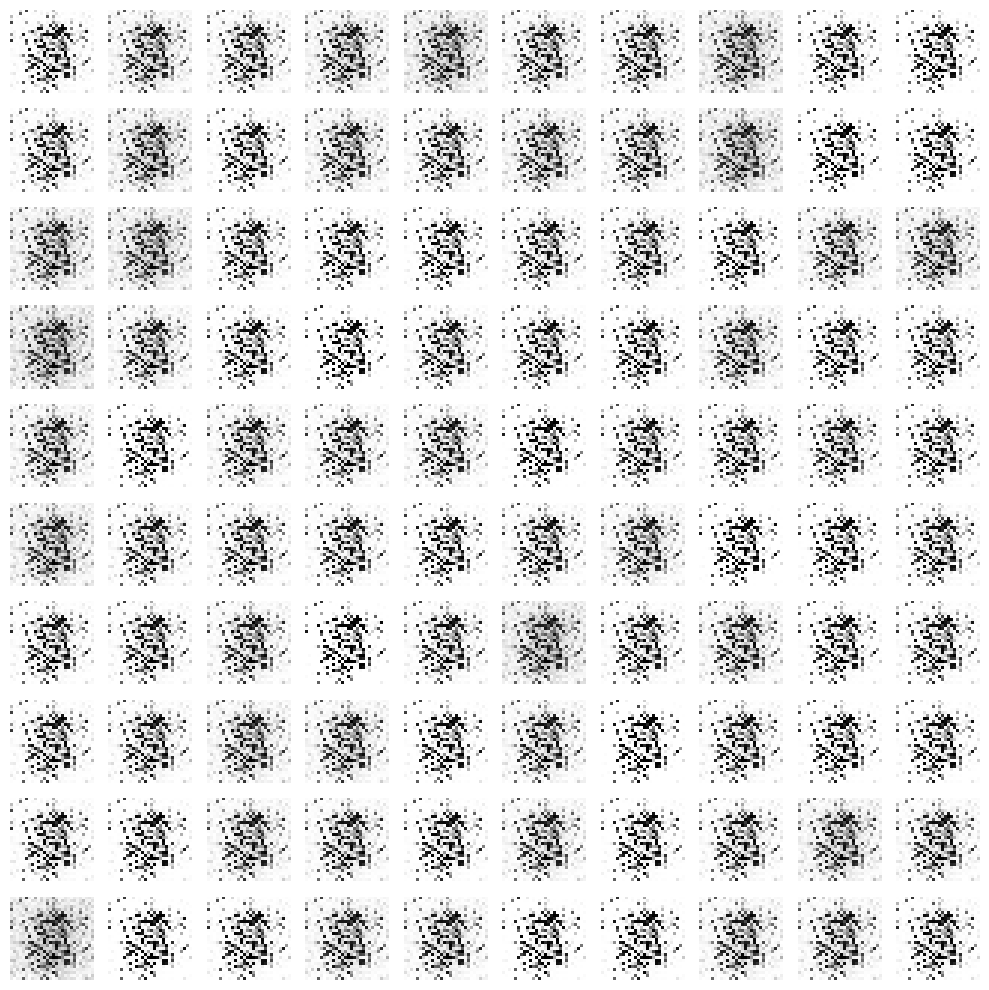

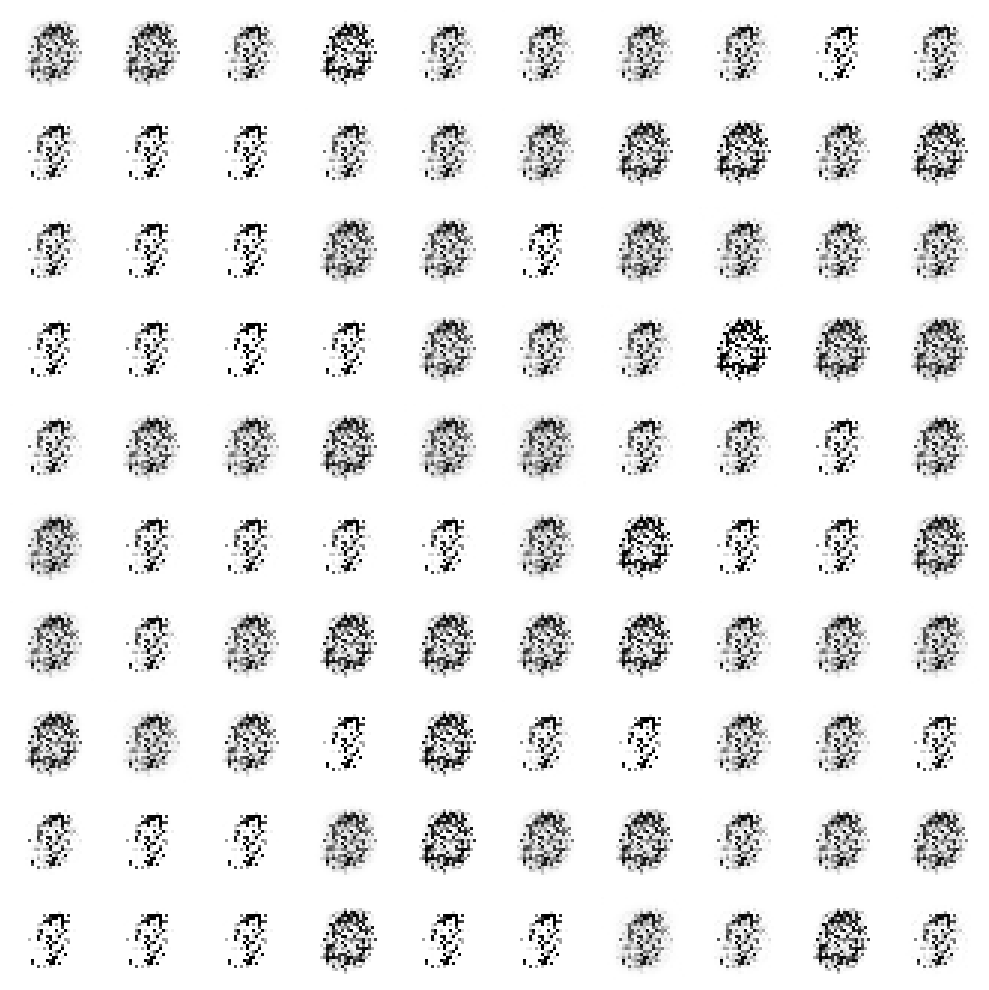

In [10]:
simple_train(30, 256)

## 4. Deep Convolutional Generative Adversarial Networks


Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Comparatively, unsupervised learning with CNNs has received less attention.  **Deep convolutional generative adversarial networks (DCGANs)**, demonstrate how unsupervised learning can be performed using CNNs.

### 4.1 Why DCGAN?

GANs are difficult to optimize and training is unstable. The network architectures must be carefully designed and the balance between the generator and discriminator must be carefully maintained for training to converge.


Many GAN models suffer the following major problems:

* Non-convergence: the model parameters oscillate, destabilize and never converge,
* Mode collapse: the generator collapses which produces limited varieties of samples,
* Diminished gradient: the discriminator gets too successful that the generator gradient vanishes and learns nothing,
* Unbalance between the generator and discriminator causing overfitting, and
* Highly sensitive to the hyperparameter selections.

### 4.2 What is DCGAN?

A DCGAN is a direct extension of the GAN, except that it explicitly uses convolutional and convolutional-transpose layers in the discriminator and generator, respectively.

* The discriminator is made up of strided convolution layers, batch norm layers, and LeakyReLU activations. The input is a 3x64x64 input image and the output is a scalar probability that the input is from the real data distribution.

* The generator is comprised of convolutional-transpose layers, batch norm layers, and ReLU activations. The input is a latent vector, z, that is drawn from a standard normal distribution and the output is a 3x64x64 RGB image. The strided conv-transpose layers allows the latent vector to be transformed into a volume with the same shape as an image.

Deep Convolutional Generative Adversarial Networks works in the opposite direction of the image classifier (CNN).
* CNN transforms an image to a class label (list of probabilities).
* DCGAN generates an image from random parameters.

<p align="center">
    <img src="https://github.com/anshupandey/Computer-Vision/blob/master/dcgan_ex1.png?raw=1" alt="neofetch" align="middle" >
</p>


The core to the DCGAN architecture uses a standard CNN architecture on the discriminative model.

<p align="center">
    <img src="https://github.com/anshupandey/Computer-Vision/blob/master/DCGAN.png?raw=1" alt="neofetch" align="middle" width="800px">
</p>

<p align="center">
    <img src="https://github.com/anshupandey/Computer-Vision/blob/master/dcgan_genflow.png?raw=1" alt="neofetch" align="middle" >
</p>



### 4.3 Hands-on with Deep Convolutional Generative Adversarial networks

In [20]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Modelling GANs

In [21]:
from tensorflow.keras import models,layers

In [22]:
# Generator
# generator will accept x arrays of size 100 where x = batchsize
gen_input = layers.Input(shape=100)
x = layers.Dense(128*7*7,activation="tanh")(gen_input)
x = layers.BatchNormalization()(x)
x = layers.Reshape((7,7,128))(x)
x = layers.UpSampling2D()(x)
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='tanh')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D()(x)
gen_output = layers.Conv2D(filters=1,kernel_size=(5,5),padding='same',activation='tanh')(x)

gen_model = models.Model(inputs=gen_input,outputs=gen_output)
gen_model.compile(loss="binary_crossentropy",optimizer='adam')
gen_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 6272)              633472    
                                                                 
 batch_normalization_6 (Bat  (None, 6272)              25088     
 chNormalization)                                                
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        2048

In [23]:
# Discriminator
dis_input = layers.Input(shape=(28,28,1))
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(dis_input)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
dis_output = layers.Dense(1,activation='sigmoid')(x)

dis_model = models.Model(inputs=dis_input,outputs=dis_output)
dis_model.compile(loss="binary_crossentropy",optimizer='adam')
dis_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 6273

In [24]:
# creating GAN model using both generator and discriminators
# create input for GAN
dis_model.trainable = False
gan_input = layers.Input(shape=(100,))
x = gen_model(gan_input)
gan_output = dis_model(x)
gan = models.Model(inputs=gan_input,outputs=gan_output)
gan.compile(loss="binary_crossentropy",optimizer='adam')
gan.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         865281    
                                                                 
 model_2 (Functional)        (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


In [25]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
xtrain = xtrain.astype('float32')
# scale the images
xtrain = (xtrain - 127.5) / 127.5


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# training the model
epochs = 30
batch_size=100
batch_count = xtrain.shape[0]//batch_size

for i in range(epochs):
  loss= []
  for j in range(batch_count):
    # random input for generator
    noise_input = np.random.rand(batch_size,100)
    # preparing input training for discriminator
    gen_prediction = gen_model.predict(noise_input,batch_size=batch_size)
    real_images = xtrain[np.random.randint(0,xtrain.shape[0],batch_size)]
    X_dis = np.concatenate([gen_prediction,real_images])
    Y_dis = np.array([0]*batch_size + [1]*batch_size).reshape(-1,1)

    ######################################################
    ##### Train the model ##################
    dis_model.trainable = True
    dis_model.train_on_batch(X_dis,Y_dis)

    ##### Train the generator #####
    noise_input = np.random.rand(batch_size,100)
    y_generator = np.array([[1]*batch_size]).reshape(-1,1)
    dis_model.trainable = False
    model_loss = gan.train_on_batch(noise_input,y_generator)
    loss.append(model_loss)
  print("Epoch ",i," completed")
  print("Loss of GAN is ",sum(loss)/len(loss))


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step
Epoch  2  completed
Loss of GAN is  1.2760965823133787
1/1 [==============================] - 0s 20ms/step
Epoch  3  completed
Loss of GAN is  1.5126544407010079
1/1 [==============================] - 0s 24ms/step
Epoch  4  completed
Loss of GAN is  1.7101778612534204
1/1 [==============================] - 0s 30ms/step
Epoch  5  completed
Loss of GAN is  1.9051628279685975
1/1 [==============================] - 0s 16ms/step
Epoch  6  completed
Loss of GAN is  1.9468509197235107
1/1 [==============================] - 0s 19ms/step
Epoch  7  completed
Loss of GAN is  2.0431814235448837
1/1 [==============================] - 0s 18ms/step
Epoch  8  completed
Loss of GAN is  2.1218764632940292
1/1 [==============================] - 0s 17ms/step
Epoch  9  completed
Loss of GAN is  2.2211398615439735
1/1 [==============================] - 0s 16ms/step


KeyboardInterrupt: 

2/2 [==============================] - 0s 143ms/step
(50, 28, 28, 1)


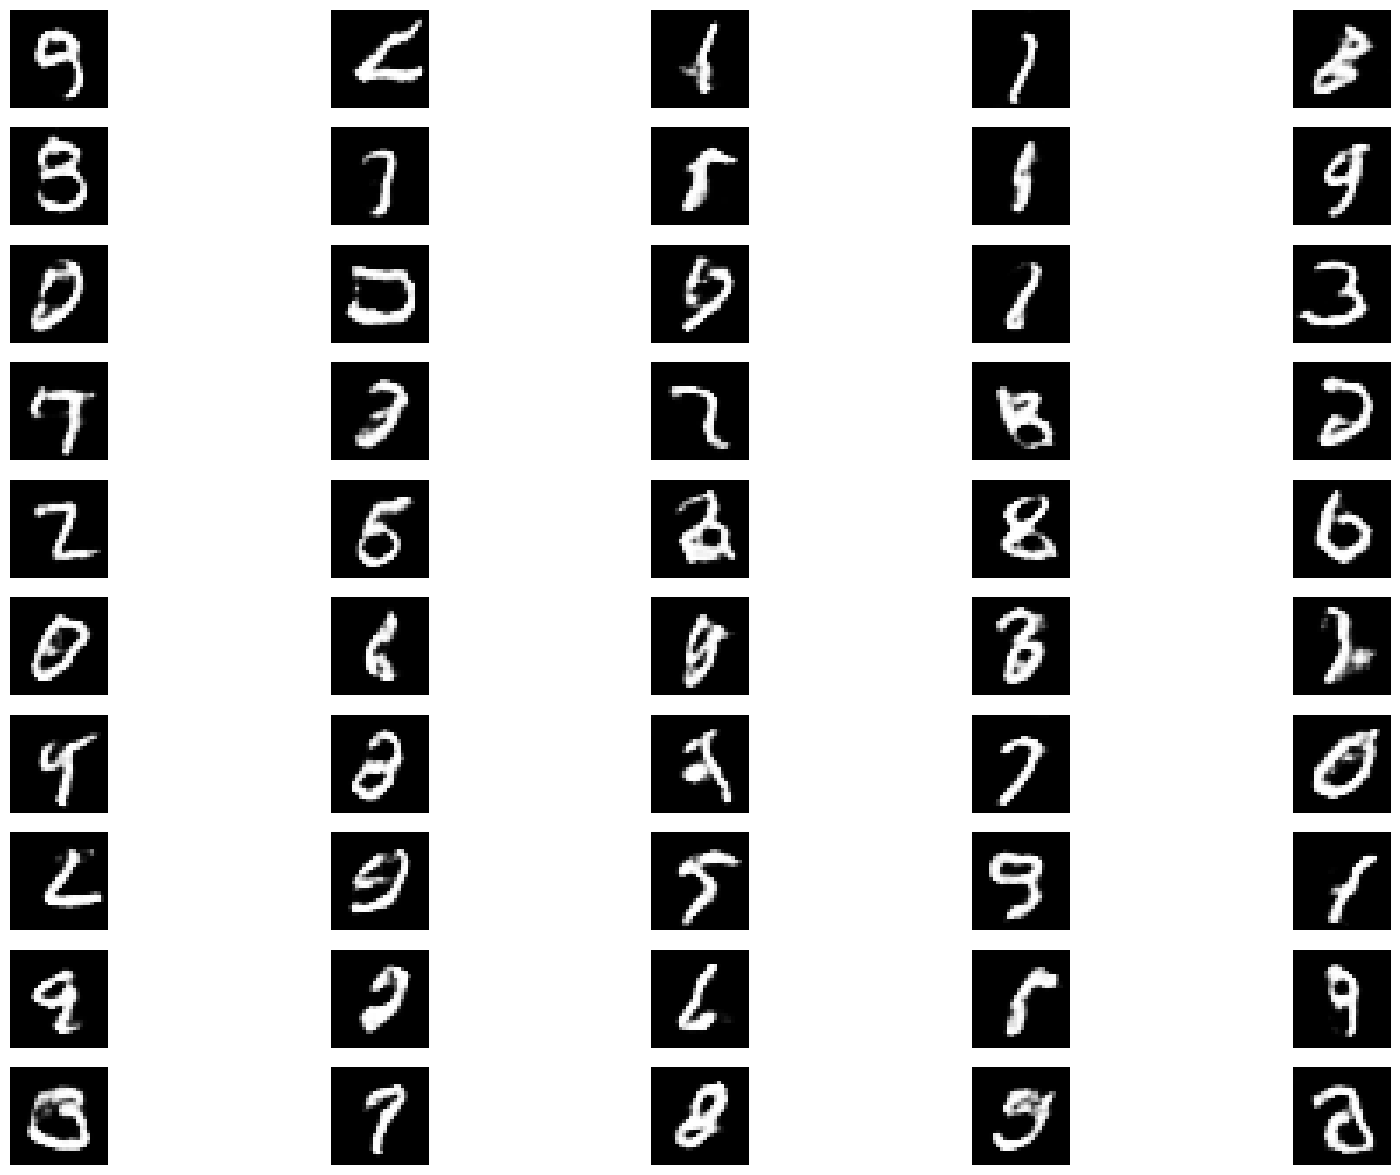

In [28]:
noise_input = np.random.rand(50,100)
prediction = gen_model.predict(noise_input)
print(prediction.shape)
plt.figure(figsize=(20,15))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.imshow(prediction[i,:,:,0],cmap='gray')
  plt.axis('off')
plt.show()